# Котировки (Московской биржи) с Финама

In [1]:
# import os
# import sys
# from pyspark import SparkContext
# from pyspark.sql import SQLContext
# import pyspark.sql.types as sqlt
# import pyspark.sql.functions as sqlf
# from pyspark import SparkConf
# try:
#     sc.stop()
# except:
#     pass
# os.environ['PYSPARK_PYTHON'] = sys.executable
# os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

# #HDFS_MASTER = 'hadoop-master'
# conf = SparkConf()
# conf.setMaster('yarn')
# conf.setAppName('moex')
# sc = SparkContext(conf=conf)
# sqlContext = SQLContext(sc)
# spark = sqlContext
# sql = spark.sql

In [2]:
# Библиотеки
import pandas as pd
import numpy as np

import requests
import urllib.request
from urllib.parse import urlencode
from urllib.request import urlopen

import io
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from pylab import rcParams


import datetime
from datetime import datetime, date, timedelta

# import html5lib

import warnings
warnings.filterwarnings('ignore')

C:\Users\150ho\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
sns.set()

In [4]:
if __name__ == '__main__':
     print("успешно выполнено")

успешно выполнено


In [5]:
print('Hello world!')

Hello world!


In [6]:
# # Период анализа
# data_start = input('Введите начальную дату в формате YYYY-MM-DD: ')
# d_end = input('Введите конечную дату (0 - текущая дата, 1 - пользовательская дата): ')
# if d_end == "0":
#     data_end = str(date.today())
# else:
#     data_end = input('Введите дату в формате YYYY-MM-DD: ')
# print("Выбранный период: c", data_start, 'по', data_end)

In [7]:
# date_format = "%Y-%m-%d"

# isValidDate = True
# try:
#     datetime.strptime(data_start, date_format)
# except ValueError:
#     isValidDate = False

# if(isValidDate):
#     print("Input date is valid ..")
# else:
#     print("Input date is not valid..")

In [8]:
# date_format = "%Y-%m-%d"

# isValidDate = True
# try:
#     datetime.strptime(data_end, date_format)
# except ValueError:
#     isValidDate = False

# if(isValidDate):
#     print("Input date is valid ..")
# else:
#     print("Input date is not valid..")

# Парсим данные финама

In [9]:
data_start = '2018-01-01'
data_end = str(date.today())

In [10]:
# Начальная дата
t0 = '.'.join(reversed(data_start.split('-')))
t01 = t0.split('.')[2]
t02 = str(int(t0.split('.')[1])-1)
t03 = t0.split('.')[0]

In [11]:
# Конечная дата
t1 = '.'.join(reversed(data_end.split('-')))
t11 = t1.split('.')[2]
t12 = str(int(t1.split('.')[1])-1)
t13 = t1.split('.')[0]

In [12]:
p = 8 # период день
p1 = 7 # период час

In [13]:
# from urllib.parse import urlencode
# from urllib.request import urlopen
# #пользовательские переменные
# ticker="SBER" #задаём тикер
# period=7 # задаём период. Выбор из: 'tick': 1, 'min': 2, '5min': 3, '10min': 4, '15min': 5, '30min': 6, 'hour': 7, 'daily': 8, 'week': 9, 'month': 10
# start = "01.01.2017" #с какой даты начинать тянуть котировки
# end = "31.12.2017" #финальная дата, по которую тянуть котировки
# ########
# periods={'tick': 1, 'min': 2, '5min': 3, '10min': 4, '15min': 5, '30min': 6, 'hour': 7, 'daily': 8, 'week': 9, 'month': 10}
# print ("ticker="+ticker+"; period="+str(period)+"; start="+start+"; end="+end)
# #каждой акции Финам присвоил цифровой код:
# tickers={'ABRD':82460,'AESL':181867,'AFKS':19715,'AFLT':29,'AGRO':399716,'AKRN':17564,'ALBK':82616,'ALNU':81882,'ALRS':81820,'AMEZ':20702,'APTK':13855,'AQUA':35238,'ARMD':19676,'ARSA':19915,'ASSB':16452,'AVAN':82843,'AVAZ':39,'AVAZP':40,'BANE':81757,'BANEP':81758,'BGDE':175840,'BISV':35242,'BISVP':35243,'BLNG':21078,'BRZL':81901,'BSPB':20066,'CBOM':420694,'CHEP':20999,'CHGZ':81933,'CHKZ':21000,'CHMF':16136,'CHMK':21001,'CHZN':19960,'CLSB':16712,'CLSBP':16713,'CNTL':21002,'CNTLP':81575,'DASB':16825,'DGBZ':17919,'DIOD':35363,'DIXY':18564,'DVEC':19724,'DZRD':74744,'DZRDP':74745,'ELTZ':81934,'ENRU':16440,'EPLN':451471,'ERCO':81935,'FEES':20509,'FESH':20708,'FORTP':82164,'GAZA':81997,'GAZAP':81998,'GAZC':81398,'GAZP':16842,'GAZS':81399,'GAZT':82115,'GCHE':20125,'GMKN':795,'GRAZ':16610,'GRNT':449114,'GTLC':152876,'GTPR':175842,'GTSS':436120,'HALS':17698,'HIMC':81939,'HIMCP':81940,'HYDR':20266,'IDJT':388276,'IDVP':409486,'IGST':81885,'IGST03':81886,'IGSTP':81887,'IRAO':20516,'IRGZ':9,'IRKT':15547,'ISKJ':17137,'JNOS':15722,'JNOSP':15723,'KAZT':81941,'KAZTP':81942,'KBSB':19916,'KBTK':35285,'KCHE':20030,'KCHEP':20498,'KGKC':83261,'KGKCP':152350,'KLSB':16329,'KMAZ':15544,'KMEZ':22525,'KMTZ':81903,'KOGK':20710,'KRKN':81891,'KRKNP':81892,'KRKO':81905,'KRKOP':81906,'KROT':510,'KROTP':511,'KRSB':20912,'KRSBP':20913,'KRSG':15518,'KSGR':75094,'KTSB':16284,'KTSBP':16285,'KUBE':522,'KUNF':81943,'KUZB':83165,'KZMS':17359,'KZOS':81856,'KZOSP':81857,'LIFE':74584,'LKOH':8,'LNTA':385792,'LNZL':21004,'LNZLP':22094,'LPSB':16276,'LSNG':31,'LSNGP':542,'LSRG':19736,'LVHK':152517,'MAGE':74562,'MAGEP':74563,'MAGN':16782,'MERF':20947,'MFGS':30,'MFGSP':51,'MFON':152516,'MGNT':17086,'MGNZ':20892,'MGTS':12984,'MGTSP':12983,'MGVM':81829,'MISB':16330,'MISBP':16331,'MNFD':80390,'MOBB':82890,'MOEX':152798,'MORI':81944,'MOTZ':21116,'MRKC':20235,'MRKK':20412,'MRKP':20107,'MRKS':20346,'MRKU':20402,'MRKV':20286,'MRKY':20681,'MRKZ':20309,'MRSB':16359,'MSNG':6,'MSRS':16917,'MSST':152676,'MSTT':74549,'MTLR':21018,'MTLRP':80745,'MTSS':15523,'MUGS':81945,'MUGSP':81946,'MVID':19737,'NAUK':81992,'NFAZ':81287,'NKHP':450432,'NKNC':20100,'NKNCP':20101,'NKSH':81947,'NLMK':17046,'NMTP':19629,'NNSB':16615,'NNSBP':16616,'NPOF':81858,'NSVZ':81929,'NVTK':17370,'ODVA':20737,'OFCB':80728,'OGKB':18684,'OMSH':22891,'OMZZP':15844,'OPIN':20711,'OSMP':21006,'OTCP':407627,'PAZA':81896,'PHOR':81114,'PHST':19717,'PIKK':18654,'PLSM':81241,'PLZL':17123,'PMSB':16908,'PMSBP':16909,'POLY':175924,'PRFN':83121,'PRIM':17850,'PRIN':22806,'PRMB':80818,'PRTK':35247,'PSBR':152320,'QIWI':181610,'RASP':17713,'RBCM':74779,'RDRB':181755,'RGSS':181934,'RKKE':20321,'RLMN':152677,'RLMNP':388313,'RNAV':66644,'RODNP':66693,'ROLO':181316,'ROSB':16866,'ROSN':17273,'ROST':20637,'RSTI':20971,'RSTIP':20972,'RTGZ':152397,'RTKM':7,'RTKMP':15,'RTSB':16783,'RTSBP':16784,'RUAL':414279,'RUALR':74718,'RUGR':66893,'RUSI':81786,'RUSP':20712,'RZSB':16455,'SAGO':445,'SAGOP':70,'SARE':11,'SAREP':24,'SBER':3,'SBERP':23,'SELG':81360,'SELGP':82610,'SELL':21166,'SIBG':436091,'SIBN':2,'SKYC':83122,'SNGS':4,'SNGSP':13,'STSB':20087,'STSBP':20088,'SVAV':16080,'SYNG':19651,'SZPR':22401,'TAER':80593,'TANL':81914,'TANLP':81915,'TASB':16265,'TASBP':16266,'TATN':825,'TATNP':826,'TGKA':18382,'TGKB':17597,'TGKBP':18189,'TGKD':18310,'TGKDP':18391,'TGKN':18176,'TGKO':81899,'TNSE':420644,'TORS':16797,'TORSP':16798,'TRCN':74561,'TRMK':18441,'TRNFP':1012,'TTLK':18371,'TUCH':74746,'TUZA':20716,'UCSS':175781,'UKUZ':20717,'UNAC':22843,'UNKL':82493,'UPRO':18584,'URFD':75124,'URKA':19623,'URKZ':82611,'USBN':81953,'UTAR':15522,'UTII':81040,'UTSY':419504,'UWGN':414560,'VDSB':16352,'VGSB':16456,'VGSBP':16457,'VJGZ':81954,'VJGZP':81955,'VLHZ':17257,'VRAO':20958,'VRAOP':20959,'VRSB':16546,'VRSBP':16547,'VSMO':15965,'VSYD':83251,'VSYDP':83252,'VTBR':19043,'VTGK':19632,'VTRS':82886,'VZRZ':17068,'VZRZP':17067,'WTCM':19095,'WTCMP':19096,'YAKG':81917,'YKEN':81766,'YKENP':81769,'YNDX':388383,'YRSB':16342,'YRSBP':16343,'ZHIV':181674,'ZILL':81918,'ZMZN':556,'ZMZNP':603,'ZVEZ':82001}
# FINAM_URL = "http://export.finam.ru/"
# market = 0 #можно не задавать. Это рынок, на котором торгуется бумага. Для акций работает с любой цифрой.
# #Делаем преобразования дат:
# start_date = datetime.strptime(start, "%d.%m.%Y").date()
# start_date_rev=datetime.strptime(start, '%d.%m.%Y').strftime('%Y%m%d')
# end_date = datetime.strptime(end, "%d.%m.%Y").date()
# end_date_rev=datetime.strptime(end, '%d.%m.%Y').strftime('%Y%m%d')
# #Все параметры упаковываем в единую структуру:
# params = urlencode([
#                     ('market', market), #на каком рынке торгуется бумага
#                     ('em', tickers[ticker]), #вытягиваем цифровой символ, который соответствует бумаге.
#                     ('code', ticker), #тикер нашей акции
#                     ('apply',0), #не нашёл что это значит. 
#                     ('df', start_date.day), #Начальная дата, номер дня (1-31)
#                     ('mf', start_date.month - 1), #Начальная дата, номер месяца (0-11)
#                     ('yf', start_date.year), #Начальная дата, год
#                     ('from', start_date), #Начальная дата полностью
#                     ('dt', end_date.day), #Конечная дата, номер дня	
#                     ('mt', end_date.month - 1), #Конечная дата, номер месяца
#                     ('yt', end_date.year), #Конечная дата, год
#                     ('to', end_date), #Конечная дата
#                     ('p', period), #Таймфрейм
#                     ('f', ticker+"_" + start_date_rev + "_" + end_date_rev), #Имя сформированного файла
#                     ('e', ".csv"), #Расширение сформированного файла
#                     ('cn', ticker), #ещё раз тикер акции	
#                     ('dtf', 1), #В каком формате брать даты. Выбор из 5 возможных. См. страницу https://www.finam.ru/profile/moex-akcii/sberbank/export/
#                     ('tmf', 1), #В каком формате брать время. Выбор из 4 возможных.
#                     ('MSOR', 0), #Время свечи (0 - open; 1 - close)	
#                     ('mstime', "on"), #Московское время	
#                     ('mstimever', 1), #Коррекция часового пояса	
#                     ('sep', 1), #Разделитель полей	(1 - запятая, 2 - точка, 3 - точка с запятой, 4 - табуляция, 5 - пробел)
#                     ('sep2', 1), #Разделитель разрядов
#                     ('datf', 1), #Формат записи в файл. Выбор из 6 возможных.
#                     ('at', 1)]) #Нужны ли заголовки столбцов
# url = FINAM_URL + ticker+"_" + start_date_rev + "_" + end_date_rev + ".csv?" + params

In [14]:
# Коды коировок анализа Московской биржи
cod0 = 'USDCB' # курс ЦБ оллар США / Российский рубль (moex)
cod1 = 'USD000UTSTOM' # Биржевой курс доллара США к рублю на завтра на торгах Московской валютной бирже (moex)
cod2 = 'USD000000TOD' # Биржевой курс доллара США к рублю на сегодня на торгах Московской валютной бирже (moex)
cod3 = 'GAZP' # Биржевой курс акций Газпром (moex)
cod4 = 'ROSN' # Биржевой курс акций Роснефть  (moex)
cod5 = 'SBERP' # Биржевой курс акций Сбербанк-П  (moex)
cod6 = 'MOEX' #  Биржевой курс индекса МосБиржи (moex)

In [15]:
# загружаем on-line датасет - курс ЦБ оллар США / Российский рубль (moex)
url =f'https://export.finam.ru/export9.out?market=41&em=82485&token=03ADUVZwAxoOmFB1holx1j7hdBQduYJCZePbwEfzif9XxJ0mK6qto2VTgDtu2LH8zzIrD-KXyUjykFt42zi_dPnNiIMGiO1EwfIo8SSb5YABWZ__NUsHF-rzVtZjRVgmboYwIosJr4i7HE7U7dlS1l8rsbsGIBLJmy6k3g2G2__fyHJDIzQnEAxaw_L1Nfh8kAWxwsLOF9y2mf3p1L4RjZA8_Co2ut20TgQ0HvHghzr3s_cSulAab87KD-Jwupzfh0Khwb9JELg_TS97F2S8JiiTajLKp7zs8e_UCfWt0hCZKm6LWkhikEanIUq35Y8OE5vLbbQr6L8cTU-aQZO3xNpIaT1n-kfj6aHdtRON2yZ2eHQpvVIZj0wAuZfgtWOdU6WCGsuZ_U3Y0TNdThvcGsWAGihdQTjY-Hzc1KlLM32ls969SXBXmVidnKB3UBgyy6u2FPuxggSDycPmZf3mCJdOa0KGm27wgx8b8Wsv50IUBt8_C9e6xgOh6ZCUpAIg5fIKNqYXcwhV1d7Z97ladB3MJ8N-AosVDJ1w&code={cod0}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod0}_200101_230821&e=.csv&cn={cod0}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df0 = pd.read_csv(s)
df0.columns = ['TICKER0','PER0', 'DATE', 'TIME0', 'OPEN0', 'HIGH0', 'LOW0', 'CLOSE0', 'VOL0']
df0['DATE'] = pd.to_datetime(df0['DATE'], format='%Y%m%d')
df0.set_index('DATE', inplace=True)
df0

TICKER0 PER0  TIME0    OPEN0    HIGH0     LOW0   CLOSE0  VOL0
DATE                                                                    
2018-01-10   USDCB    D      0  57.0463  57.0463  57.0463  57.0463     0
2018-01-11   USDCB    D      0  56.8734  56.8734  56.8734  56.8734     0
2018-01-12   USDCB    D      0  56.9957  56.9957  56.9957  56.9957     0
2018-01-13   USDCB    D      0  56.6019  56.6019  56.6019  56.6019     0
2018-01-16   USDCB    D      0  56.3569  56.3569  56.3569  56.3569     0
...            ...  ...    ...      ...      ...      ...      ...   ...
2023-09-19   USDCB    D      0  96.6472  96.6472  96.6472  96.6472     0
2023-09-20   USDCB    D      0  96.2236  96.2236  96.2236  96.2236     0
2023-09-21   USDCB    D      0  96.6172  96.6172  96.6172  96.6172     0
2023-09-22   USDCB    D      0  96.0762  96.0762  96.0762  96.0762     0
2023-09-23   USDCB    D      0  96.0419  96.0419  96.0419  96.0419     0

[1409 rows x 8 columns]

In [16]:
# загружаем on-line датасет - Биржевой курс доллара США к рублю на завтра на торгах Московской валютной бирже (moex)
url =f'https://export.finam.ru/export9.out?market=45&em=182400&token=03ADUVZwCCsPimQlNq5yQ7Jbw8nQ0W7adwXXq4kvi1HZ7qBrjcqglr2W9bK7H8NfnuWFzI_HN970OmYsuJHh5UxKqpIHAuvvjLQfA32tV_Sv5ZXJHjE5hkPy3wvTJ7WaUd2kLeP8lHIPQNOvr8GYPD7QEWNyn0hqSKFAsp7T0k4wYKe6-QIyZ20ie7bfNAj_VHyQjzBv9FGw2AE-GgS7LEpmv4kpv3LSEUHW3uXQs0R_WkL8ejT8TJoeLebHYTxrHl5xK9DA0EkkVacQZyLN7XPzUt6ShLcHhMw4IS6lMvYPQTzTyd3gYOnEGHobjPq5ImRVahHRpJ1qENmZd_9ZA8kg1rK6Delc7DfLVZZAdrSOY3Pw0ZE0otuRAAAUEn6HNhx-Yf8ec5NzNr9o6VsyqguME8k8v953FD1ficcwAqhN_Vz2HbCVhjsHg8fKhJzAiiMVV_9tbtrnSZ66ltvZzTs3l6Syhn4t0iaB-ylG_tKkXgWeSjv174pQAUqiwwfdhB2SLq75XXNVucJ93pYtbpxInaYqXgbOnSvQ&code={cod1}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod1}_200101_230821&e=.csv&cn={cod1}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df1 = pd.read_csv(s)
df1.columns = ['TICKER1','PER1', 'DATE', 'TIME1', 'OPEN1', 'HIGH1', 'LOW1', 'CLOSE1', 'VOL1']
df1['DATE'] = pd.to_datetime(df1['DATE'], format='%Y%m%d')
df1.set_index('DATE', inplace=True)
df1

TICKER1 PER1  TIME1    OPEN1    HIGH1     LOW1   CLOSE1  \
DATE                                                                       
2018-01-03  USD000UTSTOM    D      0  57.6575  57.8900  57.1225  57.2200   
2018-01-04  USD000UTSTOM    D      0  57.2000  57.2900  56.8000  56.8400   
2018-01-05  USD000UTSTOM    D      0  56.9550  57.1350  56.9050  56.9825   
2018-01-09  USD000UTSTOM    D      0  57.0875  57.1850  56.8150  56.9950   
2018-01-10  USD000UTSTOM    D      0  56.8875  57.1000  56.7625  57.0325   
...                  ...  ...    ...      ...      ...      ...      ...   
2023-09-19  USD000UTSTOM    D      0  96.5525  97.0000  95.8600  96.8400   
2023-09-20  USD000UTSTOM    D      0  96.5875  96.9325  96.1500  96.1500   
2023-09-21  USD000UTSTOM    D      0  96.1575  96.6300  95.3625  95.9100   
2023-09-22  USD000UTSTOM    D      0  96.0000  96.2650  95.7775  96.2500   
2023-09-25  USD000UTSTOM    D      0  96.3150  96.5500  95.9200  96.1925   

                  VOL1  
DATE                    
2018-01-03   615632000  
2018-01-04   710635000  
2018-01-05   539338000  
2018-01-09  2719489000  
2018-01-10  3018949000  
...                ...  
2023-09-19  1013603000  
2023-09-20  1269892000  
2023-09-21  1181645000  
2023-09-22   933947000  
2023-09-25   535508000  

[1448 rows x 8 columns]

In [17]:
# загружаем on-line датасет - Биржевой курс доллара США к рублю на сегодня на торгах Московской валютной бирже (moex)
url =f'https://export.finam.ru/export9.out?market=45&em=182456&token=03ADUVZwBA-UZz0OAll8l0uQ1bgzhc4UUHUw5pwbpwkP8tCb0a9UonEqEmsRLHTGD80t3kPeC8QbNuFH4PYhgXrbJ5nwWwWGXsFrUUBJol3FDPW_YmzQJ_gil2b0PxTqxbtlhlMvt15Y0en5fNqng5PjnNVDE2AuHjNLLDhXncapE7Z5wlPR2Fgqk6EfgqaakogLYepbStAj-g1VRZuJ7wwE6FJ8-YR9S_yTSC2Unm2D7IHqGQH8l0yx-4C3U0WZ-vkBm1qohuWa8OeytvAT3ltkK4-jI_SIjBO5KNMBRm1jHL4fub4at3Ya-dKlsAqAmwpfEgWvArv-ojxNyONZHgEQBpB5Spa8ZXgS9-fba8uw5ekXhfNLfGLN7s2NGAgL-H4lQEzhcI-01KvH5Rv68tqlixO6raT3PyN6KWEtIaXLlY9k0yoZoyDbwnBhhU6hh45WbDTWqgWNuvFARunON5P_uSX3aETByCBpa2QmezCSUKO_1z39QQc_2e4dZrY4rOuNLfkAX07l6yvdE3omwDS68VWylDlkj2Ag&code={cod2}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod2}_200101_230820&e=.csv&cn={cod2}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df2 = pd.read_csv(s)
df2.columns = ['TICKER2','PER2', 'DATE', 'TIME2', 'OPEN2', 'HIGH2', 'LOW2', 'CLOSE2', 'VOL2']
df2['DATE'] = pd.to_datetime(df2['DATE'], format='%Y%m%d')
df2.set_index('DATE', inplace=True)
df2

TICKER2 PER2  TIME2    OPEN2    HIGH2     LOW2   CLOSE2  \
DATE                                                                       
2018-01-09  USD000000TOD    D      0  57.0225  57.1775  56.8125  57.0300   
2018-01-10  USD000000TOD    D      0  56.8700  57.0875  56.7600  56.9825   
2018-01-11  USD000000TOD    D      0  57.0325  57.0725  56.8150  56.8400   
2018-01-12  USD000000TOD    D      0  56.5200  56.7275  56.4300  56.5600   
2018-01-16  USD000000TOD    D      0  56.5000  56.5525  56.3000  56.4575   
...                  ...  ...    ...      ...      ...      ...      ...   
2023-09-19  USD000000TOD    D      0  96.6225  96.7825  95.8425  96.2425   
2023-09-20  USD000000TOD    D      0  96.2825  97.0000  96.2825  96.3925   
2023-09-21  USD000000TOD    D      0  96.4875  96.6050  95.3450  95.9450   
2023-09-22  USD000000TOD    D      0  96.0000  96.2475  95.3000  95.9100   
2023-09-25  USD000000TOD    D      0  96.4500  96.5050  95.9000  96.1775   

                  VOL2  
DATE                    
2018-01-09  1064501000  
2018-01-10  1272245000  
2018-01-11  1121621000  
2018-01-12  1026452000  
2018-01-16   904640000  
...                ...  
2023-09-19   256394000  
2023-09-20   386469000  
2023-09-21   361844000  
2023-09-22   322564000  
2023-09-25   318767000  

[1356 rows x 8 columns]

In [18]:
# загружаем on-line датасет - Биржевой курс акций Газпром (moex)
url = f'https://export.finam.ru/export9.out?market=1&em=16842&token=03ADUVZwAaEX-28uqv1PgQ01h1r8ljaS4YWjTB4dO2D-FxUrgHcb5qWe_weqAGgWW5USZUuPQTL5mfrxHGSPVjpr9Q3hWo-0eLwjsvBS5ckxABfiOrp5F1dB2ZNviVfkkVbe1LfmMOQVQuIevCc4rt_ju1MtVoWJNluR3DAlRhsG5oBrodIAMgEh_KyFQ3uCvogyZVujrE0iZoAmpEzlyVF4Mu2imulqS-zyXkeKi83XUgSYRYWxNoyLBO68HnDpLuXAeKxMyQdm-Ow_9MUGzJWjXr715jGwc5WYZWhfCFFFLE4WvLDQ_YUXJTNDeDEJ4GHp7jW3qNtKo1audY9zWwcI-1AuIJu_WbB8-Uy5GKLE95EZ3wAQCA7qXr1rmLzTszC34TWTHTbGuRsWYdGXYs2oGp9ndFU54grt_P4h-LwDuuXEaez-oGIBHyeXImdte3uZ7mZPO8Y2YPNqTXnvG3lR-UMVm5xuSHiav4w9qD8DgL0mS0PuAlakiLRUaEgpHoOuSvl1B0z3h7MT2sb4RS-XTDNBWqc6oAaw&code={cod3}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod3}_200101_230820&e=.csv&cn={cod3}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df3 = pd.read_csv(s)
df3.columns = ['TICKER3','PER3', 'DATE', 'TIME3', 'OPEN3', 'HIGH3', 'LOW3', 'CLOSE3', 'VOL3']
df3['DATE'] = pd.to_datetime(df3['DATE'], format='%Y%m%d')
df3.set_index('DATE', inplace=True)
df3

TICKER3 PER3  TIME3   OPEN3   HIGH3    LOW3  CLOSE3      VOL3
DATE                                                                    
2018-01-03    GAZP    D      0  131.03  132.20  130.63  132.20  10522070
2018-01-04    GAZP    D      0  132.50  136.20  132.30  135.89  32092300
2018-01-05    GAZP    D      0  135.80  137.12  135.08  137.12  19965100
2018-01-09    GAZP    D      0  138.00  141.35  137.60  140.00  52204990
2018-01-10    GAZP    D      0  140.49  143.43  139.58  143.43  51756440
...            ...  ...    ...     ...     ...     ...     ...       ...
2023-09-19    GAZP    D      0  172.99  173.94  168.60  168.93  43194470
2023-09-20    GAZP    D      0  169.30  170.25  167.10  169.11  34206030
2023-09-21    GAZP    D      0  168.55  169.38  165.72  165.85  30316740
2023-09-22    GAZP    D      0  166.15  167.00  165.10  166.70  22531980
2023-09-25    GAZP    D      0  166.71  168.05  165.54  165.64  12541520

[1430 rows x 8 columns]

In [19]:
# загружаем on-line датасет - Биржевой курс акций Газпром (moex)
url = f'https://export.finam.ru/export9.out?market=1&em=16842&token=03ADUVZwAaEX-28uqv1PgQ01h1r8ljaS4YWjTB4dO2D-FxUrgHcb5qWe_weqAGgWW5USZUuPQTL5mfrxHGSPVjpr9Q3hWo-0eLwjsvBS5ckxABfiOrp5F1dB2ZNviVfkkVbe1LfmMOQVQuIevCc4rt_ju1MtVoWJNluR3DAlRhsG5oBrodIAMgEh_KyFQ3uCvogyZVujrE0iZoAmpEzlyVF4Mu2imulqS-zyXkeKi83XUgSYRYWxNoyLBO68HnDpLuXAeKxMyQdm-Ow_9MUGzJWjXr715jGwc5WYZWhfCFFFLE4WvLDQ_YUXJTNDeDEJ4GHp7jW3qNtKo1audY9zWwcI-1AuIJu_WbB8-Uy5GKLE95EZ3wAQCA7qXr1rmLzTszC34TWTHTbGuRsWYdGXYs2oGp9ndFU54grt_P4h-LwDuuXEaez-oGIBHyeXImdte3uZ7mZPO8Y2YPNqTXnvG3lR-UMVm5xuSHiav4w9qD8DgL0mS0PuAlakiLRUaEgpHoOuSvl1B0z3h7MT2sb4RS-XTDNBWqc6oAaw&code={cod3}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p1}&f={cod3}_200101_230820&e=.csv&cn={cod3}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df31 = pd.read_csv(s)
df31.columns = ['TICKER3','PER3', 'DATE', 'TIME3', 'OPEN3', 'HIGH3', 'LOW3', 'CLOSE3', 'VOL3']
df31['DATE'] = pd.to_datetime(df31['DATE'], format='%Y%m%d')
df31.set_index('DATE', inplace=True)
df31

TICKER3  PER3   TIME3   OPEN3   HIGH3    LOW3  CLOSE3     VOL3
DATE                                                                     
2018-01-03    GAZP    60  110000  131.03  131.75  130.63  131.40  1340340
2018-01-03    GAZP    60  120000  131.35  131.87  131.20  131.21  2506980
2018-01-03    GAZP    60  130000  131.27  131.66  131.05  131.46   640520
2018-01-03    GAZP    60  140000  131.45  131.58  131.19  131.32   719870
2018-01-03    GAZP    60  150000  131.32  131.60  130.92  131.01   658470
...            ...   ...     ...     ...     ...     ...     ...      ...
2023-09-25    GAZP    60  110000  166.71  168.05  166.10  166.95  4567870
2023-09-25    GAZP    60  120000  166.96  167.45  166.42  167.00  2087960
2023-09-25    GAZP    60  130000  166.99  167.26  166.00  166.12  2722180
2023-09-25    GAZP    60  140000  166.13  166.32  165.56  165.81  2882510
2023-09-25    GAZP    60  150000  165.88  165.92  165.54  165.64   281000

[16463 rows x 8 columns]

In [20]:
# загружаем on-line датасет - Биржевой курс акций Роснефть  (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=17273&token=03ADUVZwDJqxvXTowTVmxH02smtkfrBNoVFoqNR18RXp5V0bf5QFjpN7x2OSutVWcCjV9mXwUNqXcx39gQh-UDfgUb0JpVd-EDioj5Eb854fIA7hTJ-7EFrjyCFyrZZfkcgwGayqutSlysgDh5puh0SUZZagyn9h75r3bk1JIlUlbgfErWrVI0m6InkdeAj9Lna2wpadceA7NBuxg6BXqB1cVAvOT5Ab2wlS5pn48-wHYbxBwDpjoWy07zrLOwvLGSRdZwAC0NYBtC14VmHEziSG6D_gYsiJbDMGmsO9_VJvyVmg_bO5jleutdopP3tMg_bKd0lP1GndYfoVg0G-X8UJJeDgekH8MxyhW63MBp96g7PRxSSvHhZB2wBQREldZMp3wnYMWwC5n5eaKXo9BY6mUt_5ab2cMMVuT-a3WTv7yneGzPqVK4r60zqEyNs8vJwn2j7U9Gxb8dVE3eBS0NneI5ExgsgoCtaoN7vGsdGZeyd1VQryEVYugPFUYiFX5rCv8yc29xMvTWYZaV01ioc4hf6YNbFTWgMQ&code={cod4}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod4}_200101_230820&e=.csv&cn={cod4}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df4 = pd.read_csv(s)
df4.columns = ['TICKER4','PER4', 'DATE', 'TIME4', 'OPEN4', 'HIGH4', 'LOW4', 'CLOSE4', 'VOL4']
df4['DATE'] = pd.to_datetime(df4['DATE'], format='%Y%m%d')
df4.set_index('DATE', inplace=True)
df4

TICKER4 PER4  TIME4   OPEN4   HIGH4    LOW4  CLOSE4      VOL4
DATE                                                                    
2018-01-03    ROSN    D      0  292.15  297.95  292.15  297.95   2231440
2018-01-04    ROSN    D      0  299.00  308.25  297.60  307.00   5754500
2018-01-05    ROSN    D      0  307.00  313.65  304.65  311.95   4236460
2018-01-09    ROSN    D      0  312.55  316.25  311.15  315.10   4572510
2018-01-10    ROSN    D      0  316.10  319.85  312.00  317.75   5560000
...            ...  ...    ...     ...     ...     ...     ...       ...
2023-09-19    ROSN    D      0  558.25  559.95  542.95  544.00   3683245
2023-09-20    ROSN    D      0  544.00  549.70  527.35  529.35   9812683
2023-09-21    ROSN    D      0  527.95  528.00  504.20  508.00  15081435
2023-09-22    ROSN    D      0  510.25  515.80  497.75  513.90  11587463
2023-09-25    ROSN    D      0  513.90  521.75  510.00  519.10   3630344

[1430 rows x 8 columns]

In [21]:
# загружаем on-line датасет - Биржевой курс акций Роснефть  (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=17273&token=03ADUVZwDJqxvXTowTVmxH02smtkfrBNoVFoqNR18RXp5V0bf5QFjpN7x2OSutVWcCjV9mXwUNqXcx39gQh-UDfgUb0JpVd-EDioj5Eb854fIA7hTJ-7EFrjyCFyrZZfkcgwGayqutSlysgDh5puh0SUZZagyn9h75r3bk1JIlUlbgfErWrVI0m6InkdeAj9Lna2wpadceA7NBuxg6BXqB1cVAvOT5Ab2wlS5pn48-wHYbxBwDpjoWy07zrLOwvLGSRdZwAC0NYBtC14VmHEziSG6D_gYsiJbDMGmsO9_VJvyVmg_bO5jleutdopP3tMg_bKd0lP1GndYfoVg0G-X8UJJeDgekH8MxyhW63MBp96g7PRxSSvHhZB2wBQREldZMp3wnYMWwC5n5eaKXo9BY6mUt_5ab2cMMVuT-a3WTv7yneGzPqVK4r60zqEyNs8vJwn2j7U9Gxb8dVE3eBS0NneI5ExgsgoCtaoN7vGsdGZeyd1VQryEVYugPFUYiFX5rCv8yc29xMvTWYZaV01ioc4hf6YNbFTWgMQ&code={cod4}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p1}&f={cod4}_200101_230820&e=.csv&cn={cod4}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df41 = pd.read_csv(s)
df41.columns = ['TICKER4','PER4', 'DATE', 'TIME4', 'OPEN4', 'HIGH4', 'LOW4', 'CLOSE4', 'VOL4']
df41['DATE'] = pd.to_datetime(df41['DATE'], format='%Y%m%d')
df41.set_index('DATE', inplace=True)
df41

TICKER4  PER4   TIME4   OPEN4   HIGH4    LOW4  CLOSE4     VOL4
DATE                                                                     
2018-01-03    ROSN    60  110000  292.15  294.15  292.15  293.40   172070
2018-01-03    ROSN    60  120000  293.40  294.40  293.05  293.65   234950
2018-01-03    ROSN    60  130000  293.85  294.75  292.55  294.40   208770
2018-01-03    ROSN    60  140000  294.60  295.35  294.20  295.10   206440
2018-01-03    ROSN    60  150000  295.00  295.40  294.70  294.85   138410
...            ...   ...     ...     ...     ...     ...     ...      ...
2023-09-25    ROSN    60  110000  513.90  518.85  510.00  513.40  1407954
2023-09-25    ROSN    60  120000  513.40  518.50  512.65  517.95   583103
2023-09-25    ROSN    60  130000  517.90  521.75  517.10  519.15  1037716
2023-09-25    ROSN    60  140000  519.00  520.85  516.30  519.05   585133
2023-09-25    ROSN    60  150000  519.00  519.40  519.00  519.10    16438

[16463 rows x 8 columns]

In [22]:
# загружаем on-line датасет - Биржевой курс акций Сбербанк-П  (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=23&token=03ADUVZwA9gRNHBgCOuXyphBx7YgdmsSQYVO4KJYqu1HIwjMsNG1XJO5gdMZWjZ5XRq_FY8Ev2QEnQUHnBWFl91ZlAExJav4c39F82glIPI2xIsRHl1lgKedIbUiZBWe5TRZcWTClPBvALDMV8aZMcw64wRAeSgVrg5_p3r3zoVvHnJ5D8PDKNxrMgAhdBcBjeTu8lLA5LLPcpXpb3ZSUFfPZc54ehulaZ4zCngw_ZjB5uz82i_3EMb8zOb49woCsrQmqzj40Qe-o37KklI-VEdVOHp9gZ2jTSwcm_a4veyfj91O4xJmiPg6XeSQdmn8ESulDijDy9BHEhPMUt18dM_4TYztqgGwg-EEsv9h6O_jdAQsPe1mEZ-7CnkRG45ExoszJDe2XnYM9xHMqUwkrEBTZ--IuYNw680_zpp7poUk86I-am6PxhNaRa1NRCcUZM2Gcgr6AvshhOB73R68aFjswX29Kg28sLS8X0uAUJVLPNE2uDyc2Ni64HiDlOnp3CBJNfa1Y8aCfpd9KuNvuz8zBqBalYCf5f_w&code={cod5}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod5}_200101_230820&e=.csv&cn={cod5}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df5 = pd.read_csv(s)
df5.columns = ['TICKER5','PER5', 'DATE', 'TIME5', 'OPEN5', 'HIGH5', 'LOW5', 'CLOSE5', 'VOL5']
df5['DATE'] = pd.to_datetime(df5['DATE'], format='%Y%m%d')
df5.set_index('DATE', inplace=True)
df5

TICKER5 PER5  TIME5   OPEN5   HIGH5    LOW5  CLOSE5     VOL5
DATE                                                                   
2018-01-03   SBERP    D      0  190.66  197.40  190.47  197.30  3231300
2018-01-04   SBERP    D      0  197.99  204.40  197.01  203.03  4334900
2018-01-05   SBERP    D      0  204.02  205.88  203.03  203.50  4082400
2018-01-09   SBERP    D      0  203.91  205.93  200.37  201.30  3860100
2018-01-10   SBERP    D      0  201.99  202.42  196.16  197.52  4842300
...            ...  ...    ...     ...     ...     ...     ...      ...
2023-09-19   SBERP    D      0  258.45  259.26  251.22  252.59  6433510
2023-09-20   SBERP    D      0  252.97  255.49  249.59  253.59  5724690
2023-09-21   SBERP    D      0  253.31  254.19  249.70  249.86  4193700
2023-09-22   SBERP    D      0  250.43  252.89  248.84  251.82  2741810
2023-09-25   SBERP    D      0  252.03  252.43  249.73  250.25  1467750

[1430 rows x 8 columns]

In [23]:
# загружаем on-line датасет - Биржевой курс акций Сбербанк-П  (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=23&token=03ADUVZwA9gRNHBgCOuXyphBx7YgdmsSQYVO4KJYqu1HIwjMsNG1XJO5gdMZWjZ5XRq_FY8Ev2QEnQUHnBWFl91ZlAExJav4c39F82glIPI2xIsRHl1lgKedIbUiZBWe5TRZcWTClPBvALDMV8aZMcw64wRAeSgVrg5_p3r3zoVvHnJ5D8PDKNxrMgAhdBcBjeTu8lLA5LLPcpXpb3ZSUFfPZc54ehulaZ4zCngw_ZjB5uz82i_3EMb8zOb49woCsrQmqzj40Qe-o37KklI-VEdVOHp9gZ2jTSwcm_a4veyfj91O4xJmiPg6XeSQdmn8ESulDijDy9BHEhPMUt18dM_4TYztqgGwg-EEsv9h6O_jdAQsPe1mEZ-7CnkRG45ExoszJDe2XnYM9xHMqUwkrEBTZ--IuYNw680_zpp7poUk86I-am6PxhNaRa1NRCcUZM2Gcgr6AvshhOB73R68aFjswX29Kg28sLS8X0uAUJVLPNE2uDyc2Ni64HiDlOnp3CBJNfa1Y8aCfpd9KuNvuz8zBqBalYCf5f_w&code={cod5}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p1}&f={cod5}_200101_230820&e=.csv&cn={cod5}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df51 = pd.read_csv(s)
df51.columns = ['TICKER5','PER5', 'DATE', 'TIME5', 'OPEN5', 'HIGH5', 'LOW5', 'CLOSE5', 'VOL5']
df51['DATE'] = pd.to_datetime(df51['DATE'], format='%Y%m%d')
df51.set_index('DATE', inplace=True)
df51

TICKER5  PER5   TIME5   OPEN5   HIGH5    LOW5  CLOSE5    VOL5
DATE                                                                    
2018-01-03   SBERP    60  110000  190.66  192.75  190.47  192.33  261100
2018-01-03   SBERP    60  120000  192.33  193.99  192.33  193.31  430000
2018-01-03   SBERP    60  130000  193.35  193.91  192.53  193.85  351900
2018-01-03   SBERP    60  140000  193.85  195.05  193.62  194.69  412000
2018-01-03   SBERP    60  150000  194.84  196.00  194.84  195.88  336400
...            ...   ...     ...     ...     ...     ...     ...     ...
2023-09-25   SBERP    60  110000  252.03  252.43  250.40  250.64  379890
2023-09-25   SBERP    60  120000  250.63  252.03  250.52  250.94  471440
2023-09-25   SBERP    60  130000  250.93  251.79  250.16  250.61  317370
2023-09-25   SBERP    60  140000  250.61  250.95  249.73  250.19  287000
2023-09-25   SBERP    60  150000  250.08  250.33  250.03  250.25   12070

[16463 rows x 8 columns]

In [24]:
# загружаем on-line датасет - Биржевой курс индекса МосБиржи (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=152798&token=03ADUVZwBDcazpe6CaMw74OA3dpU-kxqxJE10XmU1imxDFVNirnMqPtuD_aUwc4EvFpO_4w0cO_OUlhMIbm5mGlALfRDQYJEKDBP-GlsUG5zIL0lg-uzqNFEi2XWMVCDrJAvnK_q5gxlCHCohhX4V0eCsp4lbjPtXPWoSq5MK3-Goqx5nDxcbdHNBLC7-gcW9MJzLH4tGaLVNjitfzjQmq5nMCtNIDxtItFRPNXpp3hJFEisEBLqDGt34oPTpCPNTUiK4TjEHNqJ84C4Xaa_EgBZ-zHpY1x3ic3t4_YuF8wNWn9LakarrvpT_DekWXmgMl3QIJ5JzIE_aNNHTSvDObowzZRp9P1EIdPRBPycKuNcmqBjmCibBva0SeqZLiaRzxFSAFcj4oZ2Uym3XdJ_JazHMX8-3ldxM03H23cRmuVP97SHMe_g2wSXNn7WpkLDCY1MDs51cT5pqKVNPPsULJV3GxxkKL0iA7pESdMNfXIcCd7_16V6FudFXiOYaZ3BfuhagVBuZJStnu-btZiLmIn21cSHsPxaNbvA&code={cod6}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod6}_200101_230820&e=.csv&cn={cod6}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df6 = pd.read_csv(s)
df6.columns = ['TICKER6','PER6', 'DATE', 'TIME6', 'OPEN6', 'HIGH6', 'LOW6', 'CLOSE6', 'VOL6']
df6['DATE'] = pd.to_datetime(df6['DATE'], format='%Y%m%d')
df6.set_index('DATE', inplace=True)
df6

TICKER6 PER6  TIME6   OPEN6   HIGH6    LOW6  CLOSE6      VOL6
DATE                                                                    
2018-01-03    MOEX    D      0  109.25  110.42  108.30  109.18   8602720
2018-01-04    MOEX    D      0  109.13  109.80  108.50  109.12   9840610
2018-01-05    MOEX    D      0  109.17  109.36  108.00  108.25   7163440
2018-01-09    MOEX    D      0  108.35  109.88  108.25  109.06  13478570
2018-01-10    MOEX    D      0  109.25  113.55  109.21  113.40  17333780
...            ...  ...    ...     ...     ...     ...     ...       ...
2023-09-19    MOEX    D      0  175.05  175.18  171.75  172.50  10140850
2023-09-20    MOEX    D      0  172.24  174.98  169.90  171.69  10517120
2023-09-21    MOEX    D      0  171.70  173.98  170.05  173.06   9138690
2023-09-22    MOEX    D      0  173.60  183.15  172.53  182.07  19584870
2023-09-25    MOEX    D      0  182.76  183.49  179.06  179.42   5723500

[1430 rows x 8 columns]

In [25]:
# загружаем on-line датасет - Биржевой курс индекса МосБиржи (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=152798&token=03ADUVZwBDcazpe6CaMw74OA3dpU-kxqxJE10XmU1imxDFVNirnMqPtuD_aUwc4EvFpO_4w0cO_OUlhMIbm5mGlALfRDQYJEKDBP-GlsUG5zIL0lg-uzqNFEi2XWMVCDrJAvnK_q5gxlCHCohhX4V0eCsp4lbjPtXPWoSq5MK3-Goqx5nDxcbdHNBLC7-gcW9MJzLH4tGaLVNjitfzjQmq5nMCtNIDxtItFRPNXpp3hJFEisEBLqDGt34oPTpCPNTUiK4TjEHNqJ84C4Xaa_EgBZ-zHpY1x3ic3t4_YuF8wNWn9LakarrvpT_DekWXmgMl3QIJ5JzIE_aNNHTSvDObowzZRp9P1EIdPRBPycKuNcmqBjmCibBva0SeqZLiaRzxFSAFcj4oZ2Uym3XdJ_JazHMX8-3ldxM03H23cRmuVP97SHMe_g2wSXNn7WpkLDCY1MDs51cT5pqKVNPPsULJV3GxxkKL0iA7pESdMNfXIcCd7_16V6FudFXiOYaZ3BfuhagVBuZJStnu-btZiLmIn21cSHsPxaNbvA&code={cod6}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p1}&f={cod6}_200101_230820&e=.csv&cn={cod6}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df61 = pd.read_csv(s)
df61.columns = ['TICKER6','PER6', 'DATE', 'TIME6', 'OPEN6', 'HIGH6', 'LOW6', 'CLOSE6', 'VOL6']
df61['DATE'] = pd.to_datetime(df61['DATE'], format='%Y%m%d')
df61.set_index('DATE', inplace=True)
df61

TICKER6  PER6   TIME6   OPEN6   HIGH6    LOW6  CLOSE6     VOL6
DATE                                                                     
2018-01-03    MOEX    60  110000  109.25  109.60  108.81  109.50   352010
2018-01-03    MOEX    60  120000  109.54  110.42  109.16  109.16  1072610
2018-01-03    MOEX    60  130000  109.16  109.70  109.11  109.30  1869520
2018-01-03    MOEX    60  140000  109.36  109.85  109.17  109.50  1098610
2018-01-03    MOEX    60  150000  109.50  109.68  109.12  109.16   916480
...            ...   ...     ...     ...     ...     ...     ...      ...
2023-09-25    MOEX    60  110000  182.76  183.49  179.70  179.74  2957890
2023-09-25    MOEX    60  120000  179.70  180.73  179.50  180.30   787000
2023-09-25    MOEX    60  130000  180.24  181.49  179.60  180.73  1035370
2023-09-25    MOEX    60  140000  180.75  180.90  179.06  179.30   893780
2023-09-25    MOEX    60  150000  179.29  179.44  179.21  179.42    49460

[16463 rows x 8 columns]

# Создаем датафреймы

In [25]:
result0 = pd.concat([df31[['CLOSE3']], df41[['CLOSE4']], df51[['CLOSE5',]], df61[['CLOSE6']]], axis=1)
result0.columns = ['GAZP', 'ROSN', 'SBERP', 'MOEX']
# result = df1[['CLOSE']].join(result)
# result.columns = ['USDRUB','MOEX','GAZP', 'ROSN', 'SBERP']
result0.dropna(inplace = True) 
result0

GAZP    ROSN   SBERP    MOEX
DATE                                      
2018-01-03  131.40  293.40  192.33  109.50
2018-01-03  131.21  293.65  193.31  109.16
2018-01-03  131.46  294.40  193.85  109.30
2018-01-03  131.32  295.10  194.69  109.50
2018-01-03  131.01  294.85  195.88  109.16
...            ...     ...     ...     ...
2023-09-15  174.01  562.30  260.33  176.82
2023-09-15  174.02  562.25  260.40  176.32
2023-09-15  173.85  561.50  260.41  176.30
2023-09-15  173.98  562.60  260.32  176.94
2023-09-16  173.79  562.80  260.39  177.05

[16388 rows x 4 columns]

In [26]:
result10 = pd.concat([df31[['CLOSE3', 'TIME3']], df41[['CLOSE4']], df51[['CLOSE5',]], df61[['CLOSE6']]], axis=1)
result10.columns = ['GAZP', 'TIME3', 'ROSN', 'SBERP', 'MOEX']
# result = df1[['CLOSE']].join(result)
# result.columns = ['USDRUB','MOEX','GAZP', 'ROSN', 'SBERP']
result10.dropna(inplace = True)
result10['TIME3'] = result10['TIME3'].map(lambda x: '00:00:00' if x == 0 else (datetime.strptime(str(x),"%H%M%S")).strftime("%H:%M:%S"))
result10 = result10.reset_index()
result10['DATE'] = result10['DATE'].dt.strftime("%Y-%m-%d")
result10['DATE'] = result10['DATE'] + ' ' + result10['TIME3']
result10['DATE'] = pd.to_datetime(result10['DATE'], format='%Y%m%d %H:%M:%S')
result10.set_index('DATE', inplace=True)
result10 = result10[['GAZP', 'ROSN', 'SBERP', 'MOEX']]
result10

GAZP    ROSN   SBERP    MOEX
DATE                                               
2018-01-03 11:00:00  131.40  293.40  192.33  109.50
2018-01-03 12:00:00  131.21  293.65  193.31  109.16
2018-01-03 13:00:00  131.46  294.40  193.85  109.30
2018-01-03 14:00:00  131.32  295.10  194.69  109.50
2018-01-03 15:00:00  131.01  294.85  195.88  109.16
...                     ...     ...     ...     ...
2023-09-15 20:00:00  174.01  562.30  260.33  176.82
2023-09-15 21:00:00  174.02  562.25  260.40  176.32
2023-09-15 22:00:00  173.85  561.50  260.41  176.30
2023-09-15 23:00:00  173.98  562.60  260.32  176.94
2023-09-16 00:00:00  173.79  562.80  260.39  177.05

[16388 rows x 4 columns]

In [27]:
result1 = pd.concat([df0[['CLOSE0']], df1[['CLOSE1']], df2[['CLOSE2']]], axis=1)
result1.columns = ['USDCB','USD000UTSTOM', 'USD000000TOD']
# result1 = df0[['CLOSE0']].join(df1[['CLOSE1']])
# result1.columns = ['USDRUB','MOEX','GAZP', 'ROSN', 'SBERP']
result1.dropna(inplace = True) 
result1

USDCB  USD000UTSTOM  USD000000TOD
DATE                                           
2018-01-10  57.0463       57.0325       56.9825
2018-01-11  56.8734       56.4275       56.8400
2018-01-12  56.9957       56.6500       56.5600
2018-01-16  56.3569       56.5300       56.4575
2018-01-17  56.3878       56.7575       56.7800
...             ...           ...           ...
2023-09-08  98.1961       97.7825       97.8150
2023-09-12  96.5083       94.9425       95.0425
2023-09-13  94.7035       96.2250       96.2000
2023-09-14  95.9794       97.3400       96.5425
2023-09-15  96.1609       96.8100       96.5675

[1084 rows x 3 columns]

In [28]:
res1 = result1.copy()
res1['USDCB_delta'] = res1['USDCB'] - res1['USDCB'].shift(1)
res1['USD000UTSTOM_delta'] = res1['USD000UTSTOM'] - res1['USD000UTSTOM'].shift(1)
res1['USD000000TOD_delta'] = res1['USD000000TOD'] - res1['USD000000TOD'].shift(1)
res1.dropna(inplace = True) 
res1 = res1[['USDCB', 'USDCB_delta', 'USD000UTSTOM', 'USD000UTSTOM_delta', 'USD000000TOD', 'USD000000TOD_delta']]
print(res1)

              USDCB  USDCB_delta  USD000UTSTOM  USD000UTSTOM_delta  \
DATE                                                                 
2018-01-11  56.8734      -0.1729       56.4275             -0.6050   
2018-01-12  56.9957       0.1223       56.6500              0.2225   
2018-01-16  56.3569      -0.6388       56.5300             -0.1200   
2018-01-17  56.3878       0.0309       56.7575              0.2275   
2018-01-18  56.5925       0.2047       56.5250             -0.2325   
...             ...          ...           ...                 ...   
2023-09-08  98.1961       0.3522       97.7825             -0.4650   
2023-09-12  96.5083      -1.6878       94.9425             -2.8400   
2023-09-13  94.7035      -1.8048       96.2250              1.2825   
2023-09-14  95.9794       1.2759       97.3400              1.1150   
2023-09-15  96.1609       0.1815       96.8100             -0.5300   

            USD000000TOD  USD000000TOD_delta  
DATE                                      

In [29]:
result2 = pd.concat([df3[['CLOSE3']], df4[['CLOSE4']], df5[['CLOSE5',]], df6[['CLOSE6']]], axis=1)
result2.columns = ['GAZP', 'ROSN', 'SBERP', 'MOEX']
# result = df1[['CLOSE']].join(result)
# result.columns = ['USDRUB','MOEX','GAZP', 'ROSN', 'SBERP']
result2.dropna(inplace = True) 
result2

GAZP    ROSN   SBERP    MOEX
DATE                                      
2018-01-03  132.20  297.95  197.30  109.18
2018-01-04  135.89  307.00  203.03  109.12
2018-01-05  137.12  311.95  203.50  108.25
2018-01-09  140.00  315.10  201.30  109.06
2018-01-10  143.43  317.75  197.52  113.40
...            ...     ...     ...     ...
2023-09-11  174.64  549.10  256.03  167.65
2023-09-12  177.62  562.00  261.78  171.35
2023-09-13  174.94  555.15  257.95  169.72
2023-09-14  173.52  556.30  259.43  169.89
2023-09-15  173.79  562.80  260.39  177.05

[1424 rows x 4 columns]

In [30]:
res2 = result2.copy()
res2['GAZP_delta'] = res2['GAZP'] - res2['GAZP'].shift(1)
res2['ROSN_delta'] = res2['ROSN'] - res2['ROSN'].shift(1)
res2['SBERP_delta'] = res2['SBERP'] - res2['SBERP'].shift(1)
res2['MOEX_delta'] = res2['MOEX'] - res2['MOEX'].shift(1)
res2.dropna(inplace = True) 
res2 = res2[['GAZP', 'GAZP_delta', 'ROSN', 'ROSN_delta', 'SBERP', 'SBERP_delta', 'MOEX', 'MOEX_delta']]
print(res2)

              GAZP  GAZP_delta    ROSN  ROSN_delta   SBERP  SBERP_delta  \
DATE                                                                      
2018-01-04  135.89        3.69  307.00        9.05  203.03         5.73   
2018-01-05  137.12        1.23  311.95        4.95  203.50         0.47   
2018-01-09  140.00        2.88  315.10        3.15  201.30        -2.20   
2018-01-10  143.43        3.43  317.75        2.65  197.52        -3.78   
2018-01-11  144.58        1.15  325.00        7.25  199.78         2.26   
...            ...         ...     ...         ...     ...          ...   
2023-09-11  174.64       -1.31  549.10       -8.85  256.03         0.48   
2023-09-12  177.62        2.98  562.00       12.90  261.78         5.75   
2023-09-13  174.94       -2.68  555.15       -6.85  257.95        -3.83   
2023-09-14  173.52       -1.42  556.30        1.15  259.43         1.48   
2023-09-15  173.79        0.27  562.80        6.50  260.39         0.96   

              MOEX  MOEX

In [31]:
result3 = pd.concat([df3[['CLOSE3']], df4[['CLOSE4']], df5[['CLOSE5',]], df6[['CLOSE6']]], axis=1)
result3.columns = ['GAZP', 'ROSN', 'SBERP', 'MOEX']
result3 = df2[['CLOSE2']].join(result3)
result3.columns = ['USDRUB','GAZP', 'ROSN', 'SBERP', 'MOEX']
result3.dropna(inplace = True) 
result3

USDRUB    GAZP    ROSN   SBERP    MOEX
DATE                                               
2018-01-09  57.0300  140.00  315.10  201.30  109.06
2018-01-10  56.9825  143.43  317.75  197.52  113.40
2018-01-11  56.8400  144.58  325.00  199.78  115.30
2018-01-12  56.5600  143.99  324.35  199.49  113.49
2018-01-16  56.4575  145.29  317.50  200.82  112.97
...             ...     ...     ...     ...     ...
2023-09-11  95.5550  174.64  549.10  256.03  167.65
2023-09-12  95.0425  177.62  562.00  261.78  171.35
2023-09-13  96.2000  174.94  555.15  257.95  169.72
2023-09-14  96.5425  173.52  556.30  259.43  169.89
2023-09-15  96.5675  173.79  562.80  260.39  177.05

[1334 rows x 5 columns]

# Financial Data and Summary Statistics

In [32]:
import cufflinks as cf
cf.set_config_file(offline=True)

In [33]:
quotes = df0[['OPEN0', 'HIGH0', 'LOW0', 'CLOSE0']].iloc[-60:]

In [34]:
qf = cf.QuantFig(
         quotes,
         title='USD/RUB Exchange Rate',
         legend='top',
         name='USD/RUB'
)

In [35]:
qf.iplot()

In [36]:
qf.add_bollinger_bands(periods=15,
                       boll_std=2)

In [37]:
qf.iplot()

In [38]:
qf.add_rsi(periods=14,
          showbands=False)

In [39]:
qf.iplot()

In [40]:
result3.diff().tail(10)

USDRUB  GAZP   ROSN  SBERP  MOEX
DATE                                        
2023-09-01  0.1900  0.23   3.00  -0.14 -1.83
2023-09-05  1.7400  4.26  15.25   0.02 -0.39
2023-09-06  0.2525 -1.52   4.40  -1.69  1.27
2023-09-07  0.3325 -3.32 -14.20  -4.68 -2.08
2023-09-08 -0.5100 -1.69  -6.65  -2.71 -1.24
2023-09-11 -2.2600 -1.31  -8.85   0.48 -0.33
2023-09-12 -0.5125  2.98  12.90   5.75  3.70
2023-09-13  1.1575 -2.68  -6.85  -3.83 -1.63
2023-09-14  0.3425 -1.42   1.15   1.48  0.17
2023-09-15  0.0250  0.27   6.50   0.96  7.16

In [41]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1334 entries, 2018-01-09 to 2023-09-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USDRUB  1334 non-null   float64
 1   GAZP    1334 non-null   float64
 2   ROSN    1334 non-null   float64
 3   SBERP   1334 non-null   float64
 4   MOEX    1334 non-null   float64
dtypes: float64(5)
memory usage: 62.5 KB


In [42]:
result3.describe().round(2)  

USDRUB     GAZP     ROSN    SBERP     MOEX
count  1334.00  1334.00  1334.00  1334.00  1334.00
mean     69.76   206.61   430.26   206.80   118.96
std       8.43    57.65    83.77    52.62    30.74
min      52.00   134.40   234.00    99.33    73.19
25%      63.60   162.12   370.91   172.44    92.53
50%      68.81   186.86   414.88   203.31   111.55
75%      74.55   234.80   479.59   240.20   143.08
max      98.92   389.82   655.25   346.61   191.02

In [43]:
result3.mean()  

USDRUB     69.763692
GAZP      206.605367
ROSN      430.264205
SBERP     206.803936
MOEX      118.964783
dtype: float64

In [44]:
result3.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

USDRUB    GAZP    ROSN   SBERP    MOEX
min      52.00  134.40  234.00   99.33   73.19
mean     69.76  206.61  430.26  206.80  118.96
std       8.43   57.65   83.77   52.62   30.74
median   68.81  186.86  414.88  203.31  111.55
max      98.92  389.82  655.25  346.61  191.02

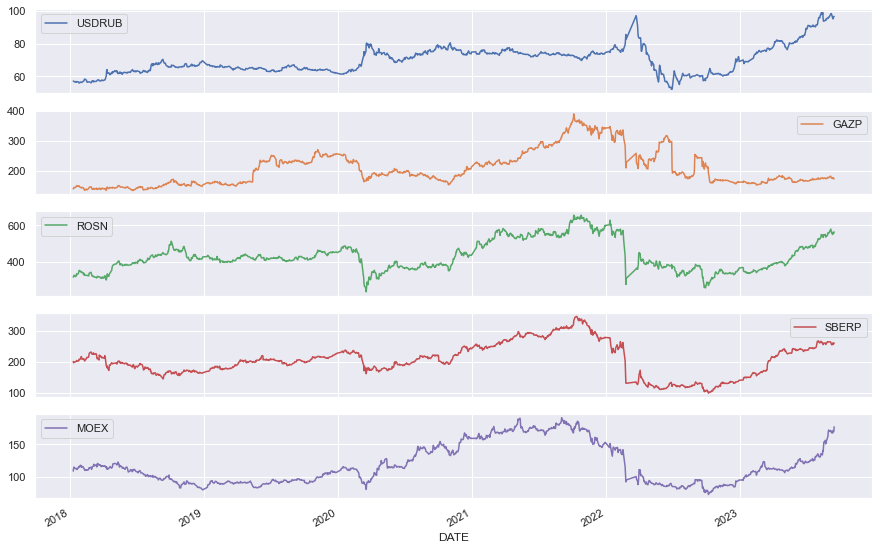

In [45]:
result3.plot(figsize=(15, 10), subplots=True);  

In [46]:
# !pip3 install cufflinks

In [47]:
result3.iplot()

In [48]:
result3.iplot(kind='hist',
             subplots=True,
             bins=15,
        )

In [49]:
result3.diff().mean()

USDRUB    0.029661
GAZP      0.025349
ROSN      0.185821
SBERP     0.044329
MOEX      0.051005
dtype: float64

In [50]:
result3.pct_change().round(3).tail(7)

USDRUB   GAZP   ROSN  SBERP   MOEX
DATE                                          
2023-09-07   0.003 -0.018 -0.025 -0.018 -0.012
2023-09-08  -0.005 -0.010 -0.012 -0.010 -0.007
2023-09-11  -0.023 -0.007 -0.016  0.002 -0.002
2023-09-12  -0.005  0.017  0.023  0.022  0.022
2023-09-13   0.012 -0.015 -0.012 -0.015 -0.010
2023-09-14   0.004 -0.008  0.002  0.006  0.001
2023-09-15   0.000  0.002  0.012  0.004  0.042

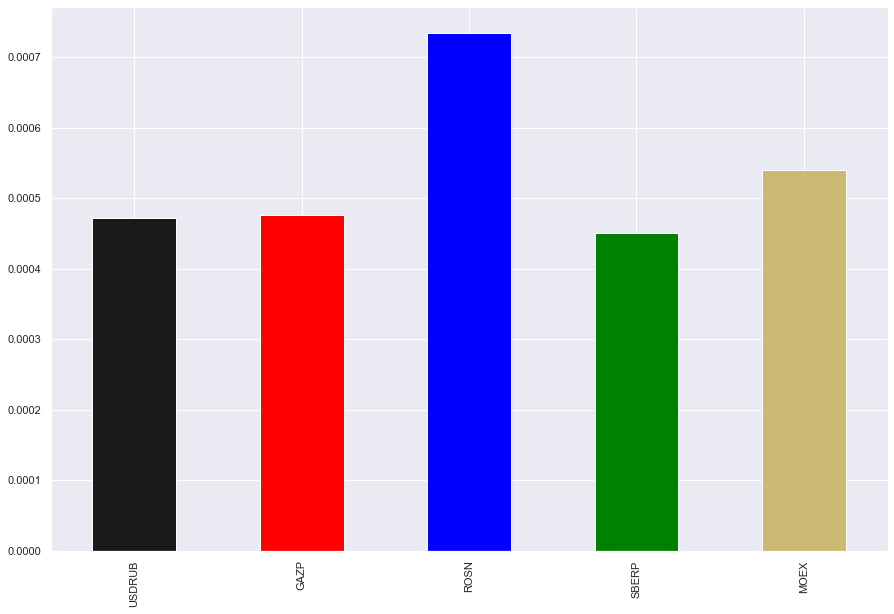

In [51]:
result3.pct_change().mean().plot(kind='bar', color=['k', 'red', 'blue', 'green', 'y'], figsize=(15, 10));

In [52]:
rets = np.log(result3 / result3.shift(1))  

In [53]:
rets.tail().round(3)

USDRUB   GAZP   ROSN  SBERP   MOEX
DATE                                          
2023-09-11  -0.023 -0.007 -0.016  0.002 -0.002
2023-09-12  -0.005  0.017  0.023  0.022  0.022
2023-09-13   0.012 -0.015 -0.012 -0.015 -0.010
2023-09-14   0.004 -0.008  0.002  0.006  0.001
2023-09-15   0.000  0.002  0.012  0.004  0.041

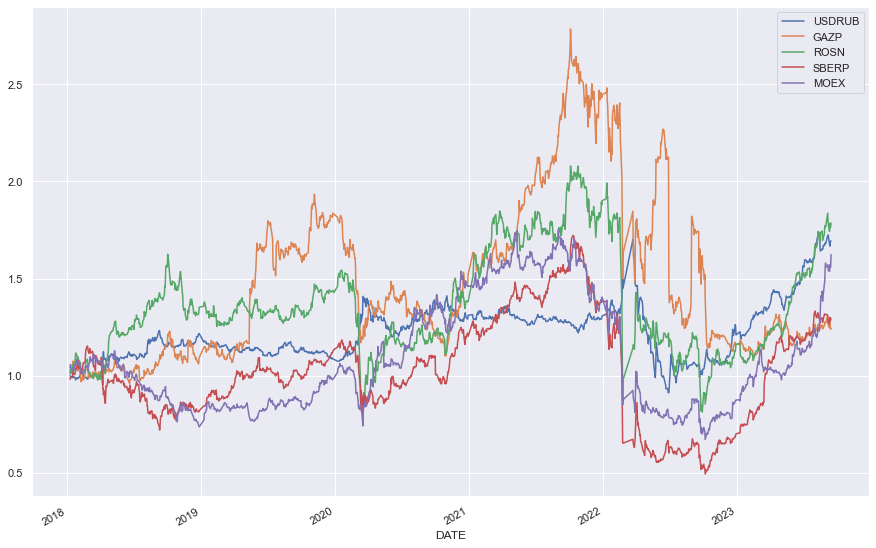

In [54]:
rets.cumsum().apply(np.exp).plot(figsize=(15, 10));  
# plt.savefig('../../images/ch08/fts_03.png');

In [55]:
result3.resample('1w', label='right').last()

USDRUB    GAZP    ROSN   SBERP    MOEX
DATE                                               
2018-01-14  56.5600  143.99  324.35  199.49  113.49
2018-01-21  56.5525  149.13  328.00  203.97  111.50
2018-01-28  56.0625  147.19  351.80  208.00  115.75
2018-02-04  56.3125  144.00  339.90  208.80  115.80
2018-02-11  58.2825  135.56  324.55  203.18  110.50
...             ...     ...     ...     ...     ...
2023-08-20  93.7525  175.48  548.20  260.51  153.81
2023-08-27  95.3075  174.70  538.85  259.88  155.20
2023-09-03  96.0000  178.22  559.15  264.61  170.42
2023-09-10  97.8150  175.95  557.95  255.55  167.98
2023-09-17  96.5675  173.79  562.80  260.39  177.05

[297 rows x 5 columns]

In [56]:
result3.resample('1m', label='right').last()

USDRUB    GAZP    ROSN   SBERP    MOEX
DATE                                               
2018-01-31  56.3075  143.36  343.20  217.49  115.00
2018-02-28  56.1200  143.16  330.50  227.00  111.85
2018-03-31  57.3000  142.33  313.90  214.14  117.00
2018-04-30  62.2075  144.50  380.00  194.91  120.05
2018-05-31  62.1700  145.00  385.30  196.00  112.59
...             ...     ...     ...     ...     ...
2023-05-31  81.0750  162.94  450.10  241.13  116.32
2023-06-30  89.2500  166.86  482.35  236.96  123.06
2023-07-31  91.3550  174.33  508.75  265.29  134.00
2023-08-31  95.8100  177.99  556.15  264.75  172.25
2023-09-30  96.5675  173.79  562.80  260.39  177.05

[69 rows x 5 columns]

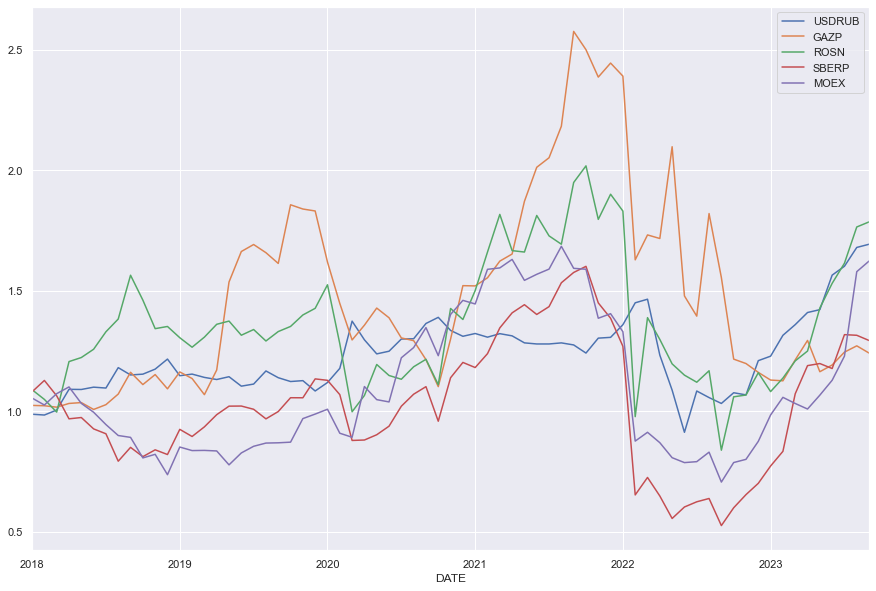

In [57]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last(
                          ).plot(figsize=(15, 10));  
# plt.savefig('../../images/ch08/fts_04.png');

In [58]:
sym = 'SBERP'

In [59]:
data = pd.DataFrame(result3[sym]).dropna()

In [60]:
data.tail()

SBERP
DATE              
2023-09-11  256.03
2023-09-12  261.78
2023-09-13  257.95
2023-09-14  259.43
2023-09-15  260.39

In [61]:
window = 20  
data['min'] = data[sym].rolling(window=window).min()  
data['mean'] = data[sym].rolling(window=window).mean()  
data['std'] = data[sym].rolling(window=window).std()  
data['median'] = data[sym].rolling(window=window).median()  
data['max'] = data[sym].rolling(window=window).max()  
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  
data.dropna()

SBERP     min      mean       std   median     max        ewma
DATE                                                                       
2018-02-06  210.60  197.52  205.9460  5.494296  204.415  217.49  210.415307
2018-02-07  210.22  197.52  206.3920  5.459236  206.315  217.49  210.268827
2018-02-08  206.60  199.49  206.8460  5.044384  207.300  217.49  207.517207
2018-02-09  203.18  199.49  207.0160  4.847157  207.300  217.49  204.264302
2018-02-12  207.69  200.82  207.4260  4.512295  207.845  217.49  206.833575
...            ...     ...       ...       ...      ...     ...         ...
2023-09-11  256.03  255.55  260.7055  3.350845  260.700  265.20  256.159094
2023-09-12  261.78  255.55  260.7890  3.356028  260.915  265.20  260.374774
2023-09-13  257.95  255.55  260.6420  3.415238  260.725  265.20  258.556193
2023-09-14  259.43  255.55  260.8275  3.229533  260.725  265.20  259.211548
2023-09-15  260.39  255.55  260.9425  3.167273  260.725  265.20  260.095387

[1315 rows x 7 columns]

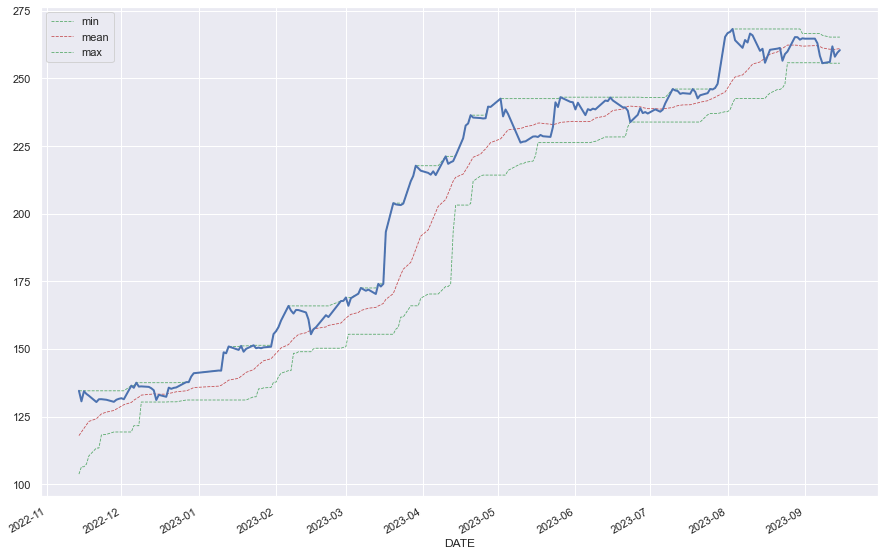

In [62]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(15, 10), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);  
# plt.savefig('../../images/ch08/fts_05.png');

# A Technical Analysis Example

In [63]:
data['SMA1'] = data[sym].rolling(window=42).mean()  
data['SMA2'] = data[sym].rolling(window=252).mean()  
data[[sym, 'SMA1', 'SMA2']].tail()

SBERP        SMA1        SMA2
DATE                                      
2023-09-11  256.03  257.315714  184.956667
2023-09-12  261.78  257.733810  185.513770
2023-09-13  257.95  258.054048  186.039802
2023-09-14  259.43  258.415476  186.580516
2023-09-15  260.39  258.758333  187.124127

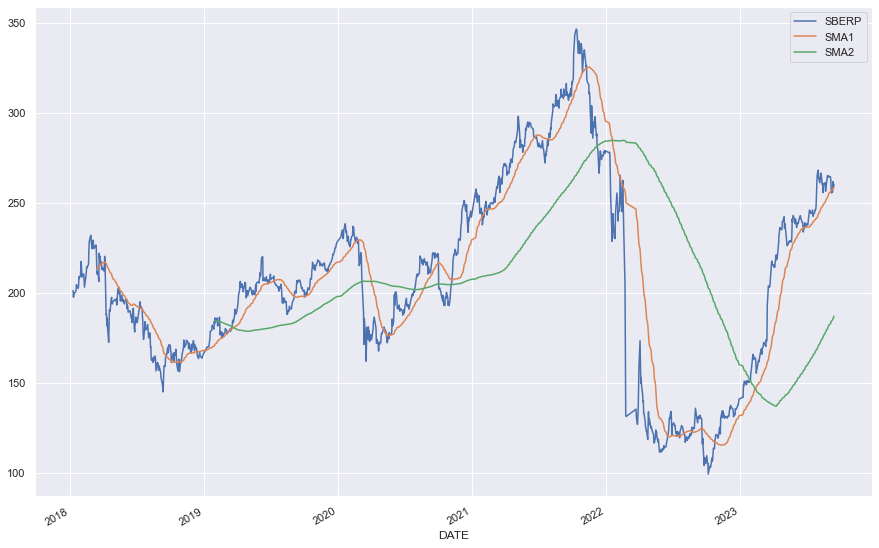

In [64]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(15, 10));  
# plt.savefig('../../images/ch08/fts_06.png');

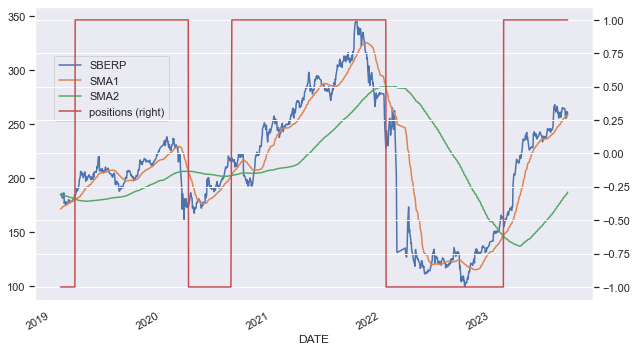

In [65]:
data.dropna(inplace=True)
data['positions'] = np.where(data['SMA1'] > data['SMA2'],  
                             1,  
                             -1)  
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
                                              secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch08/fts_07.png');

In [66]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1) 
d = data[[sym, 'SMA1', 'SMA2', 'Position']]
d

SBERP        SMA1        SMA2  Position
DATE                                                
2019-02-01  185.00  171.653095  184.555913        -1
2019-02-04  184.10  171.957857  184.487659        -1
2019-02-05  186.00  172.422143  184.441944        -1
2019-02-06  185.77  172.862143  184.386349        -1
2019-02-07  181.60  173.200238  184.315357        -1
...            ...         ...         ...       ...
2023-09-11  256.03  257.315714  184.956667         1
2023-09-12  261.78  257.733810  185.513770         1
2023-09-13  257.95  258.054048  186.039802         1
2023-09-14  259.43  258.415476  186.580516         1
2023-09-15  260.39  258.758333  187.124127         1

[1083 rows x 4 columns]

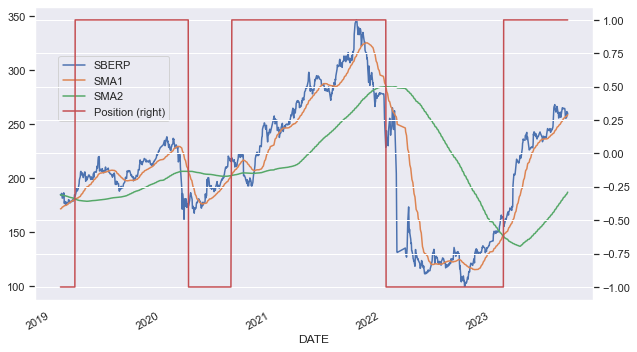

In [67]:
ax = d.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_02.png')

In [68]:
d['Returns'] = np.log(d[sym] / d[sym].shift(1)) 
d['Strategy'] = d['Position'].shift(1) * d['Returns']  
d.round(4)

SBERP      SMA1      SMA2  Position  Returns  Strategy
DATE                                                               
2019-02-01  185.00  171.6531  184.5559        -1      NaN       NaN
2019-02-04  184.10  171.9579  184.4877        -1  -0.0049    0.0049
2019-02-05  186.00  172.4221  184.4419        -1   0.0103   -0.0103
2019-02-06  185.77  172.8621  184.3863        -1  -0.0012    0.0012
2019-02-07  181.60  173.2002  184.3154        -1  -0.0227    0.0227
...            ...       ...       ...       ...      ...       ...
2023-09-11  256.03  257.3157  184.9567         1   0.0019    0.0019
2023-09-12  261.78  257.7338  185.5138         1   0.0222    0.0222
2023-09-13  257.95  258.0540  186.0398         1  -0.0147   -0.0147
2023-09-14  259.43  258.4155  186.5805         1   0.0057    0.0057
2023-09-15  260.39  258.7583  187.1241         1   0.0037    0.0037

[1083 rows x 6 columns]

In [69]:
d.dropna(inplace=True)

In [70]:
np.exp(d[['Returns', 'Strategy']].sum())

Returns     1.407514
Strategy    1.993925
dtype: float64

In [71]:
d[['Returns', 'Strategy']].std() * 252 ** 0.5  

Returns     0.377558
Strategy    0.377455
dtype: float64

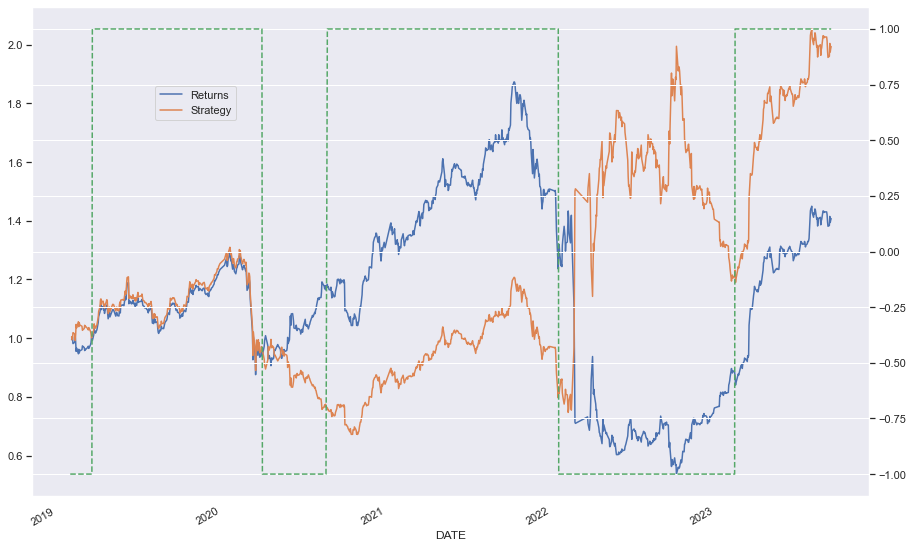

In [72]:
ax = d[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(15, 10))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');
plt.savefig('strat_plot_03.png');

# Regression Analysis

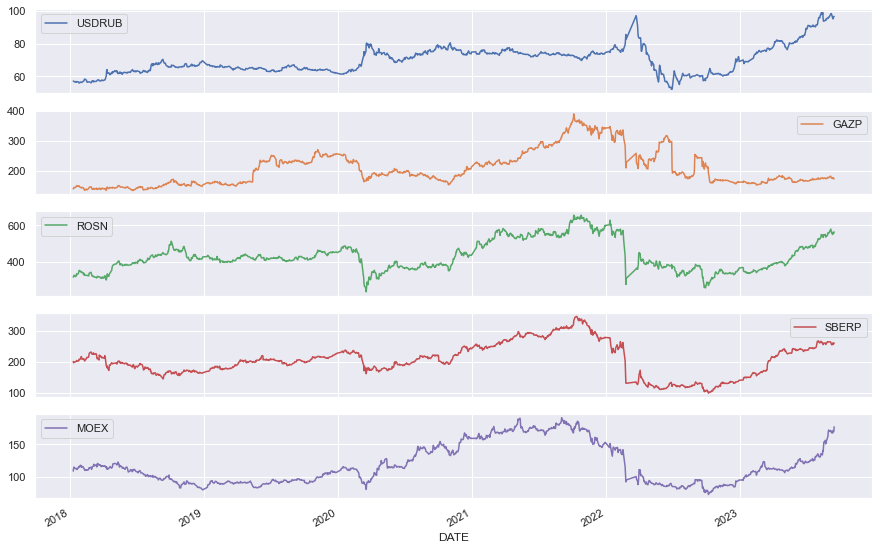

In [73]:
result3.plot(subplots=True, figsize=(15, 10));
# plt.savefig('../../images/ch08/fts_08.png');

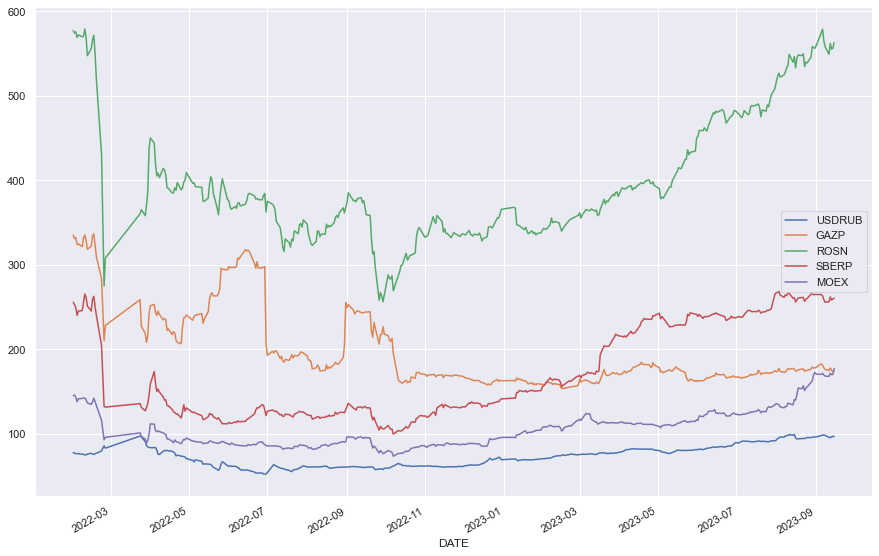

In [74]:
result3.loc['2022-01-31':].plot(figsize=(15, 10));  
# plt.savefig('../../images/ch08/fts_09.png');

In [75]:
rets = np.log(result3 / result3.shift(1)) 

In [76]:
rets.head()

USDRUB      GAZP      ROSN     SBERP      MOEX
DATE                                                        
2018-01-09       NaN       NaN       NaN       NaN       NaN
2018-01-10 -0.000833  0.024205  0.008375 -0.018956  0.039023
2018-01-11 -0.002504  0.007986  0.022560  0.011377  0.016616
2018-01-12 -0.004938 -0.004089 -0.002002 -0.001453 -0.015823
2018-01-16 -0.001814  0.008988 -0.021345  0.006645 -0.004592

In [77]:
rets.dropna(inplace=True)

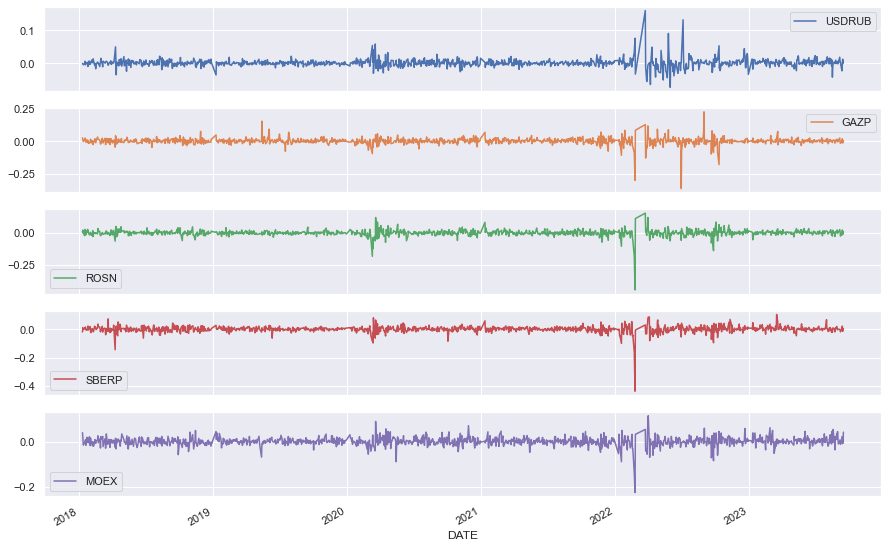

In [78]:
rets.plot(subplots=True, figsize=(15, 10));
# plt.savefig('../../images/ch08/fts_10.png');

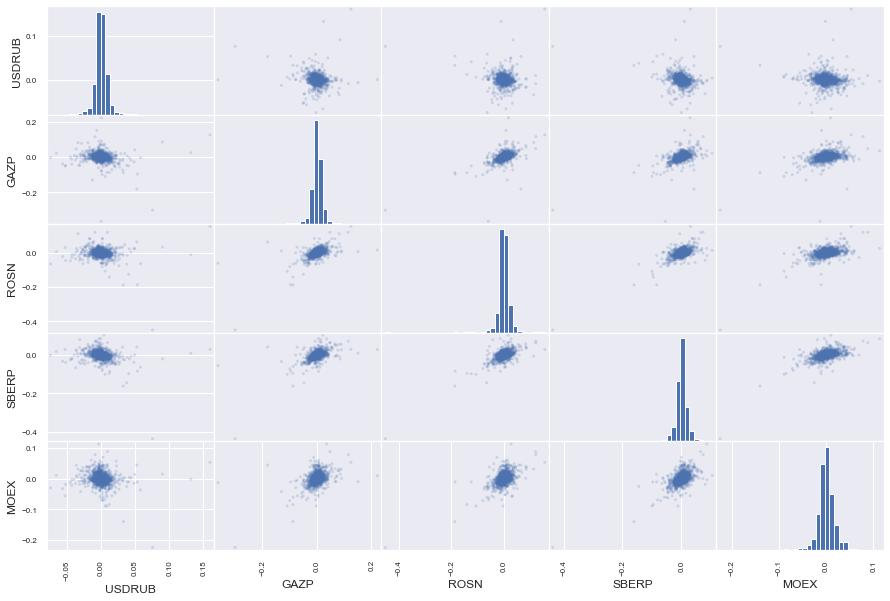

In [79]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(15, 10));
# plt.savefig('../../images/ch08/fts_11.png');

# Создаем файл xlsx / csv

In [80]:
# Создаем директорию и путь к файлу
prices_path = 'moex_prices'
for quotes in result3.columns:

        quotes_price_path = os.path.join(prices_path, f"{quotes.lower()}")
        if not os.path.exists(quotes_price_path ):
                os.makedirs(quotes_price_path)

        calculation_date = datetime.today().date().strftime(format="%d%m%Y")
        quotes_price_file_path = os.path.join(quotes_price_path, f'{quotes}_price_{calculation_date}.xlsx')
        
        with pd.ExcelWriter(quotes_price_file_path, engine='xlsxwriter') as writer:
                result3[f"{quotes}"].to_excel(writer, sheet_name='price')

                # Добавляем график с ценой
                plot_path = f'{quotes}_moex.png'
                plt.title('Цена', fontsize=16, fontweight='bold')
                plt.plot(result3[f"{quotes}"])
                plt.savefig(plot_path)
                plt.close()

                worksheet = writer.sheets['price']
                worksheet.insert_image('C2', plot_path)

#         print(f"{quotes} готов")

#         print("Удаляем ненужные файлы")
        for k in result3.columns:
            if os.path.exists(f"{k}_moex.png"):
                os.remove(f"{k}_moex.png")

In [81]:
# !pip install xlsxwriter

In [82]:
res3 = result3.copy()
res3['USDRUB_delta'] = res3['USDRUB'] - res3['USDRUB'].shift(1)
res3['GAZP_delta'] = res3['GAZP'] - res3['GAZP'].shift(1)
res3['ROSN_delta'] = res3['ROSN'] - res3['ROSN'].shift(1)
res3['SBERP_delta'] = res3['SBERP'] - res3['SBERP'].shift(1)
res3['MOEX_delta'] = res3['MOEX'] - res3['MOEX'].shift(1)
res3.dropna(inplace = True) 
res3 = res3[['USDRUB', 'USDRUB_delta','GAZP', 'GAZP_delta', 'ROSN', 'ROSN_delta', 'SBERP', 'SBERP_delta', 'MOEX', 'MOEX_delta']]
print(res3)

             USDRUB  USDRUB_delta    GAZP  GAZP_delta    ROSN  ROSN_delta  \
DATE                                                                        
2018-01-10  56.9825       -0.0475  143.43        3.43  317.75        2.65   
2018-01-11  56.8400       -0.1425  144.58        1.15  325.00        7.25   
2018-01-12  56.5600       -0.2800  143.99       -0.59  324.35       -0.65   
2018-01-16  56.4575       -0.1025  145.29        1.30  317.50       -6.85   
2018-01-17  56.7800        0.3225  148.70        3.41  326.50        9.00   
...             ...           ...     ...         ...     ...         ...   
2023-09-11  95.5550       -2.2600  174.64       -1.31  549.10       -8.85   
2023-09-12  95.0425       -0.5125  177.62        2.98  562.00       12.90   
2023-09-13  96.2000        1.1575  174.94       -2.68  555.15       -6.85   
2023-09-14  96.5425        0.3425  173.52       -1.42  556.30        1.15   
2023-09-15  96.5675        0.0250  173.79        0.27  562.80        6.50   

In [83]:
res = result10.copy()
res = res.reset_index()

In [84]:
res.to_csv('tablo.csv', index = False)

# Модуль PySpark

In [85]:
# os.system('hdfs dfs -put /home/std03/tablo.csv /user/std03')

In [86]:
# spark.read.csv('hdfs:///user/std03/tablo.csv', header = True).show()

In [87]:
# spark.sql('''CREATE TABLE IF NOT exists ivanov.logs (status varchar(32), times Timestamp)''').show(truncate=False)

In [88]:
# from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType, DateType
# employeesSchema = StructType([
#     StructField("DATE", StringType()),
#     StructField("GAZP", FloatType()),
#     StructField("ROSN", FloatType()),
#     StructField("SBERP", FloatType()),
#     StructField("MOEX", FloatType()),
#     ])

In [89]:
# dfram = spark.read.csv('hdfs:///user/std03/tablo.csv', header = True, schema = employeesSchema)

In [90]:
# df_fram = dfram.write.format('parquet').mode('overwrite').saveAsTable('ivanov.tablo_p')

In [91]:
# spark.table('ivanov.tablo_p').show(truncate=False)

In [92]:
# spark.sql('''INSERT INTO ivanov.logs 
#              VALUES ("создана таблица parquet", current_timestamp())''').show(truncate=False)

In [93]:
# spark.sql('''Drop table ivanov.logs ''').show(truncate=False)

In [94]:
# spark.table('ivanov.logs').show(truncate=False)

In [95]:
# spark.table('ivanov.tablo_p').groupBy("DATE").agg(sqlf.max("SBERP").alias("SBERP_max")).show(truncate=False) 

In [96]:
# spark.sql('''select DATE, max(SBERP) as SBERP_max
#                 from ivanov.tablo_p
#                 group by DATE''').show(truncate=False)

In [97]:
# spark.sql('''INSERT INTO ivanov.logs 
#              VALUES ("найдено max значение SBERP", current_timestamp())''').show(truncate=False)

In [98]:
result = pd.read_csv('tablo.csv')
print(result)

                      DATE    GAZP    ROSN   SBERP    MOEX
0      2018-01-03 11:00:00  131.40  293.40  192.33  109.50
1      2018-01-03 12:00:00  131.21  293.65  193.31  109.16
2      2018-01-03 13:00:00  131.46  294.40  193.85  109.30
3      2018-01-03 14:00:00  131.32  295.10  194.69  109.50
4      2018-01-03 15:00:00  131.01  294.85  195.88  109.16
...                    ...     ...     ...     ...     ...
16383  2023-09-15 20:00:00  174.01  562.30  260.33  176.82
16384  2023-09-15 21:00:00  174.02  562.25  260.40  176.32
16385  2023-09-15 22:00:00  173.85  561.50  260.41  176.30
16386  2023-09-15 23:00:00  173.98  562.60  260.32  176.94
16387  2023-09-16 00:00:00  173.79  562.80  260.39  177.05

[16388 rows x 5 columns]


In [99]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16388 entries, 0 to 16387
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16388 non-null  object 
 1   GAZP    16388 non-null  float64
 2   ROSN    16388 non-null  float64
 3   SBERP   16388 non-null  float64
 4   MOEX    16388 non-null  float64
dtypes: float64(4), object(1)
memory usage: 640.3+ KB


# SQL

In [100]:
import sqlite3

con = sqlite3.connect(':memory:')

result.to_sql('tablo', con, index=False, if_exists='replace')

16388

In [101]:
pd.read_sql(
    '''
    SELECT * FROM tablo
    where date BETWEEN strftime(date('now','-1 months')) and strftime(date('now'))
    
    ''',
    con,
)

DATE    GAZP    ROSN   SBERP    MOEX
0    2023-08-16 00:00:00  176.16  546.30  260.89  140.20
1    2023-08-16 11:00:00  175.41  542.45  259.66  139.71
2    2023-08-16 12:00:00  174.39  539.80  257.61  138.09
3    2023-08-16 13:00:00  173.85  536.00  255.79  138.40
4    2023-08-16 14:00:00  173.64  538.30  256.73  139.23
..                   ...     ...     ...     ...     ...
317  2023-09-15 19:00:00  174.30  562.00  260.24  176.30
318  2023-09-15 20:00:00  174.01  562.30  260.33  176.82
319  2023-09-15 21:00:00  174.02  562.25  260.40  176.32
320  2023-09-15 22:00:00  173.85  561.50  260.41  176.30
321  2023-09-15 23:00:00  173.98  562.60  260.32  176.94

[322 rows x 5 columns]

In [102]:
# три года
period1 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where date BETWEEN strftime(date('now','-3 years')) and strftime(date('now'))
    ''',
    con,
)
period1.set_index('DATE', inplace=True)
period1

GAZP    ROSN   SBERP    MOEX
DATE                                               
2020-09-16 00:00:00  182.22  385.30  221.87  139.84
2020-09-16 11:00:00  182.74  387.95  222.24  142.85
2020-09-16 12:00:00  182.13  388.00  221.94  143.34
2020-09-16 13:00:00  181.54  387.35  221.44  143.11
2020-09-16 14:00:00  181.81  387.30  221.00  143.22
...                     ...     ...     ...     ...
2023-09-15 19:00:00  174.30  562.00  260.24  176.30
2023-09-15 20:00:00  174.01  562.30  260.33  176.82
2023-09-15 21:00:00  174.02  562.25  260.40  176.32
2023-09-15 22:00:00  173.85  561.50  260.41  176.30
2023-09-15 23:00:00  173.98  562.60  260.32  176.94

[9960 rows x 4 columns]

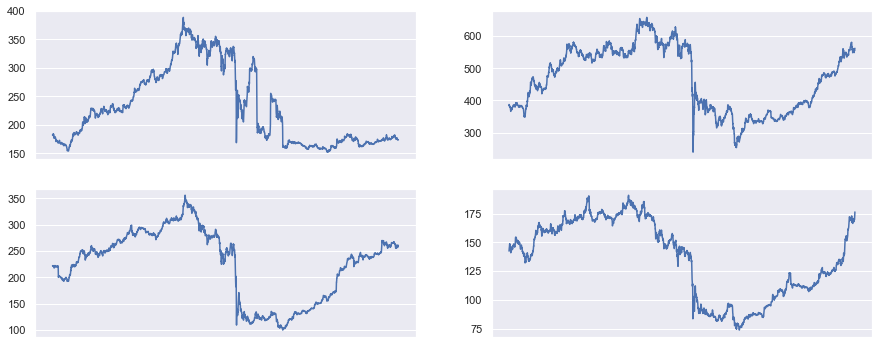

In [103]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(period1['GAZP'].rolling(5).mean())
ax2.plot(period1['ROSN'].rolling(5).mean())
ax3.plot(period1['SBERP'].rolling(5).mean())
ax4.plot(period1['MOEX'].rolling(5).mean())
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])
# ax1.set_yticks([])
fig.set_size_inches(15,6)

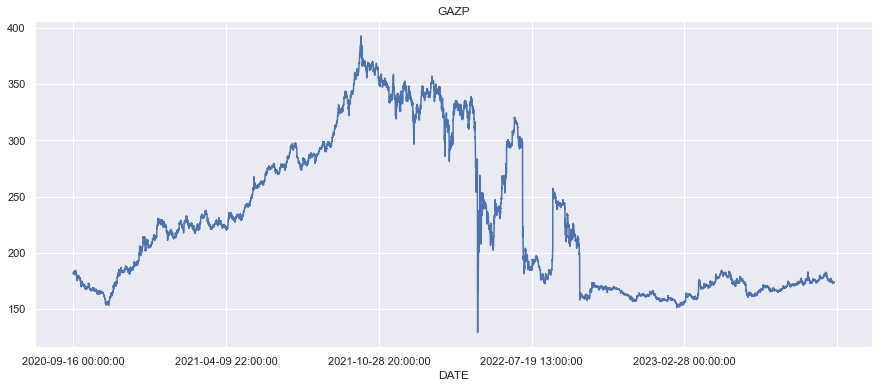

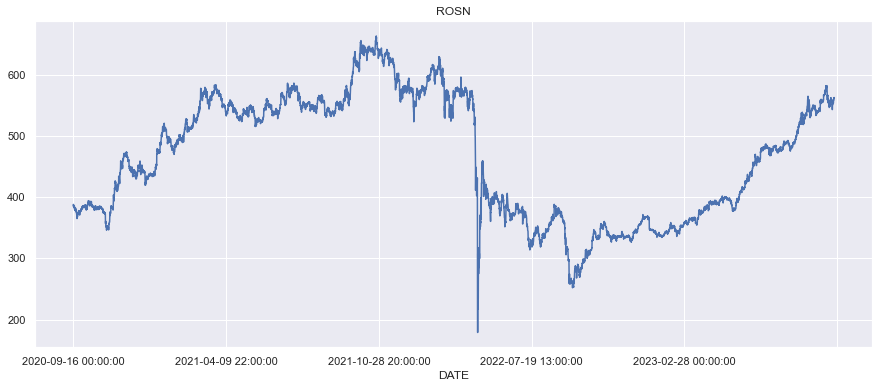

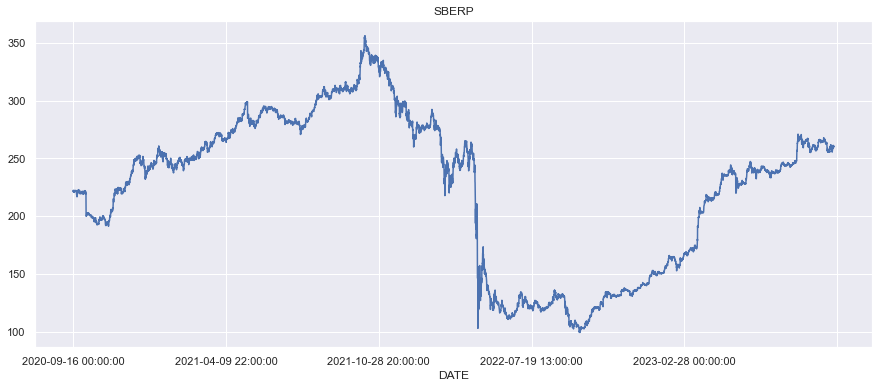

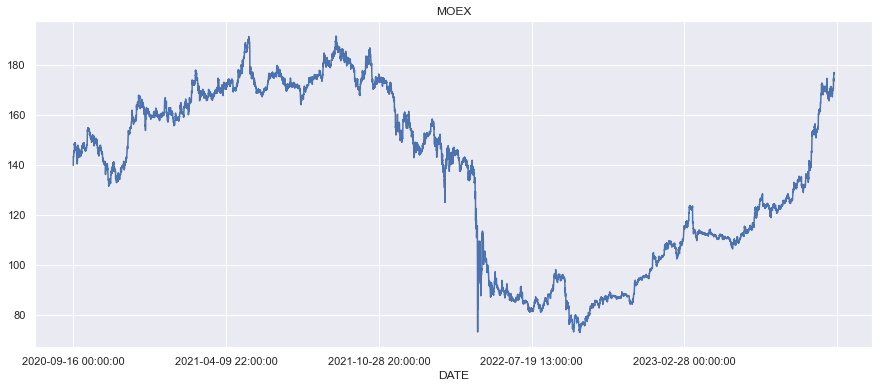

In [104]:
for i in period1.columns:
    period1[i].plot(figsize=(15,6))
    plt.title(i)
    plt.show()

In [105]:
# год
period2 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where date BETWEEN strftime(date('now','-1 years')) and strftime(date('now'))
    ''',
    con,
)
period2.set_index('DATE', inplace=True)
period2

GAZP    ROSN   SBERP    MOEX
DATE                                               
2022-09-16 00:00:00  243.68  367.30  132.09   95.54
2022-09-16 11:00:00  243.30  363.00  131.43   96.01
2022-09-16 12:00:00  246.40  362.00  132.16   95.96
2022-09-16 13:00:00  247.45  362.55  132.66   96.35
2022-09-16 14:00:00  244.65  360.45  131.47   95.69
...                     ...     ...     ...     ...
2023-09-15 19:00:00  174.30  562.00  260.24  176.30
2023-09-15 20:00:00  174.01  562.30  260.33  176.82
2023-09-15 21:00:00  174.02  562.25  260.40  176.32
2023-09-15 22:00:00  173.85  561.50  260.41  176.30
2023-09-15 23:00:00  173.98  562.60  260.32  176.94

[3556 rows x 4 columns]

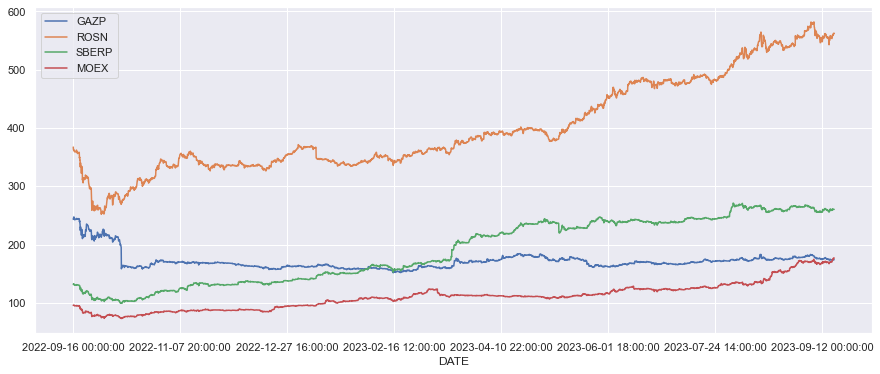

In [106]:
period2.plot(figsize=(15,6))
plt.show()

In [107]:
# месяц
period3 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where date BETWEEN strftime(date('now','-1 months')) and strftime(date('now'))
    ''',
    con,
)
period3.set_index('DATE', inplace=True)
period3

GAZP    ROSN   SBERP    MOEX
DATE                                               
2023-08-16 00:00:00  176.16  546.30  260.89  140.20
2023-08-16 11:00:00  175.41  542.45  259.66  139.71
2023-08-16 12:00:00  174.39  539.80  257.61  138.09
2023-08-16 13:00:00  173.85  536.00  255.79  138.40
2023-08-16 14:00:00  173.64  538.30  256.73  139.23
...                     ...     ...     ...     ...
2023-09-15 19:00:00  174.30  562.00  260.24  176.30
2023-09-15 20:00:00  174.01  562.30  260.33  176.82
2023-09-15 21:00:00  174.02  562.25  260.40  176.32
2023-09-15 22:00:00  173.85  561.50  260.41  176.30
2023-09-15 23:00:00  173.98  562.60  260.32  176.94

[322 rows x 4 columns]

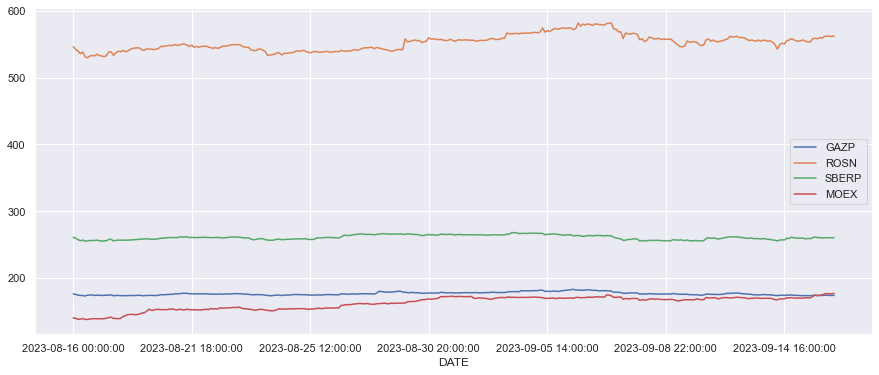

In [108]:
period3.plot(figsize=(15,6))
plt.show()

In [109]:
# неделя
period4 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where date BETWEEN strftime(date('now','-7 day')) and strftime(date('now'))
    ''',
    con,
)
period4.set_index('DATE', inplace=True)
period4

GAZP    ROSN   SBERP    MOEX
DATE                                               
2023-09-09 00:00:00  175.95  557.95  255.55  167.98
2023-09-11 11:00:00  176.80  555.20  257.44  167.85
2023-09-11 12:00:00  176.19  552.00  256.97  166.77
2023-09-11 13:00:00  175.98  549.35  256.70  165.61
2023-09-11 14:00:00  175.51  546.35  257.00  165.99
...                     ...     ...     ...     ...
2023-09-15 19:00:00  174.30  562.00  260.24  176.30
2023-09-15 20:00:00  174.01  562.30  260.33  176.82
2023-09-15 21:00:00  174.02  562.25  260.40  176.32
2023-09-15 22:00:00  173.85  561.50  260.41  176.30
2023-09-15 23:00:00  173.98  562.60  260.32  176.94

[70 rows x 4 columns]

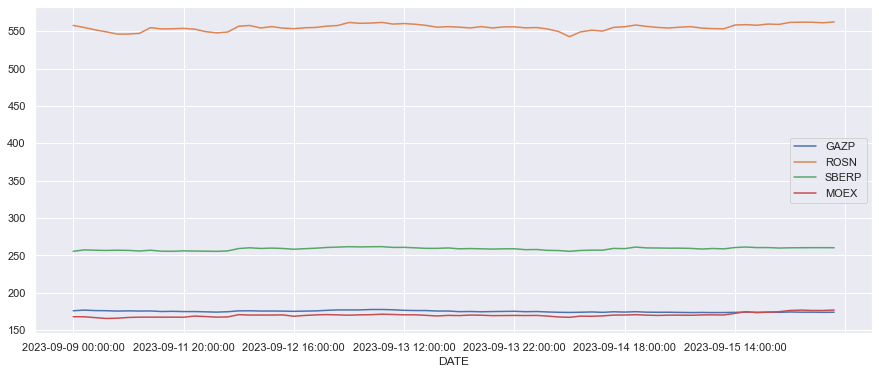

In [110]:
period4.plot(figsize=(15,6))
plt.show()

In [111]:
# # день
# period5 = pd.read_sql(
#     '''
#     SELECT * FROM tablo
#     where date = strftime(date('now'))
#     ''',
#     con,
# )
# period5.set_index('DATE', inplace=True)
# period5

In [112]:
# день
period51 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where SUBSTRING(cast(date AS VARCHAR), 0 , 11) = strftime(date('now'))
    ''',
    con,
)
period51.set_index('DATE', inplace=True)
period51

GAZP   ROSN   SBERP    MOEX
DATE                                              
2023-09-16 00:00:00  173.79  562.8  260.39  177.05

In [113]:
# день
period5 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where SUBSTRING(cast(date AS VARCHAR), 0 , 11) = strftime(date('now', '-1 day'))
    ''',
    con,
)
period5.set_index('DATE', inplace=True)
period5

GAZP    ROSN   SBERP    MOEX
DATE                                               
2023-09-15 00:00:00  173.52  556.30  259.43  169.89
2023-09-15 11:00:00  173.67  554.35  258.58  170.33
2023-09-15 12:00:00  173.49  553.70  259.32  170.44
2023-09-15 13:00:00  173.59  553.45  258.79  170.30
2023-09-15 14:00:00  173.78  558.50  260.60  172.47
2023-09-15 15:00:00  174.16  559.00  261.28  174.61
2023-09-15 16:00:00  173.87  558.20  260.50  173.40
2023-09-15 17:00:00  174.05  559.80  260.56  174.07
2023-09-15 18:00:00  173.82  559.35  259.92  174.69
2023-09-15 19:00:00  174.30  562.00  260.24  176.30
2023-09-15 20:00:00  174.01  562.30  260.33  176.82
2023-09-15 21:00:00  174.02  562.25  260.40  176.32
2023-09-15 22:00:00  173.85  561.50  260.41  176.30
2023-09-15 23:00:00  173.98  562.60  260.32  176.94

In [114]:
period5.describe().round(2)  

GAZP    ROSN   SBERP    MOEX
count   14.00   14.00   14.00   14.00
mean   173.86  558.81  260.05  173.78
std      0.24    3.27    0.75    2.66
min    173.49  553.45  258.58  169.89
25%    173.70  556.78  259.55  170.95
50%    173.86  559.17  260.32  174.34
75%    174.02  561.88  260.48  176.30
max    174.30  562.60  261.28  176.94

In [115]:
period5.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

GAZP    ROSN   SBERP    MOEX
min     173.49  553.45  258.58  169.89
mean    173.86  558.81  260.05  173.78
std       0.24    3.27    0.75    2.66
median  173.86  559.17  260.32  174.34
max     174.30  562.60  261.28  176.94

In [116]:
period5.diff()

GAZP  ROSN  SBERP  MOEX
DATE                                        
2023-09-15 00:00:00   NaN   NaN    NaN   NaN
2023-09-15 11:00:00  0.15 -1.95  -0.85  0.44
2023-09-15 12:00:00 -0.18 -0.65   0.74  0.11
2023-09-15 13:00:00  0.10 -0.25  -0.53 -0.14
2023-09-15 14:00:00  0.19  5.05   1.81  2.17
2023-09-15 15:00:00  0.38  0.50   0.68  2.14
2023-09-15 16:00:00 -0.29 -0.80  -0.78 -1.21
2023-09-15 17:00:00  0.18  1.60   0.06  0.67
2023-09-15 18:00:00 -0.23 -0.45  -0.64  0.62
2023-09-15 19:00:00  0.48  2.65   0.32  1.61
2023-09-15 20:00:00 -0.29  0.30   0.09  0.52
2023-09-15 21:00:00  0.01 -0.05   0.07 -0.50
2023-09-15 22:00:00 -0.17 -0.75   0.01 -0.02
2023-09-15 23:00:00  0.13  1.10  -0.09  0.64

In [117]:
period5.diff().mean()  

GAZP     0.035385
ROSN     0.484615
SBERP    0.068462
MOEX     0.542308
dtype: float64

In [118]:
period5.pct_change().round(3)

GAZP   ROSN  SBERP   MOEX
DATE                                           
2023-09-15 00:00:00    NaN    NaN    NaN    NaN
2023-09-15 11:00:00  0.001 -0.004 -0.003  0.003
2023-09-15 12:00:00 -0.001 -0.001  0.003  0.001
2023-09-15 13:00:00  0.001 -0.000 -0.002 -0.001
2023-09-15 14:00:00  0.001  0.009  0.007  0.013
2023-09-15 15:00:00  0.002  0.001  0.003  0.012
2023-09-15 16:00:00 -0.002 -0.001 -0.003 -0.007
2023-09-15 17:00:00  0.001  0.003  0.000  0.004
2023-09-15 18:00:00 -0.001 -0.001 -0.002  0.004
2023-09-15 19:00:00  0.003  0.005  0.001  0.009
2023-09-15 20:00:00 -0.002  0.001  0.000  0.003
2023-09-15 21:00:00  0.000 -0.000  0.000 -0.003
2023-09-15 22:00:00 -0.001 -0.001  0.000 -0.000
2023-09-15 23:00:00  0.001  0.002 -0.000  0.004

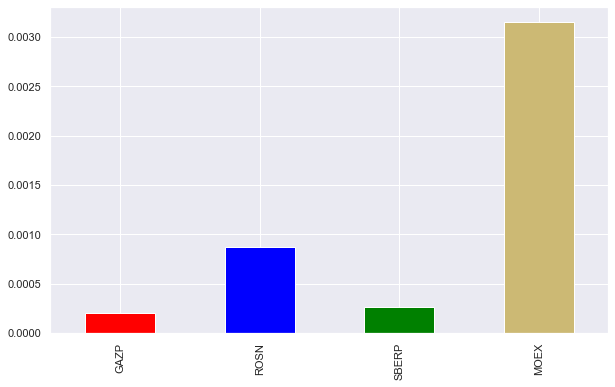

In [119]:
period5.pct_change().mean().plot(kind='bar', color=['red', 'blue', 'green', 'y'], figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_02.png');

In [120]:
rets1 = np.log(period5 / period5.shift(1))  

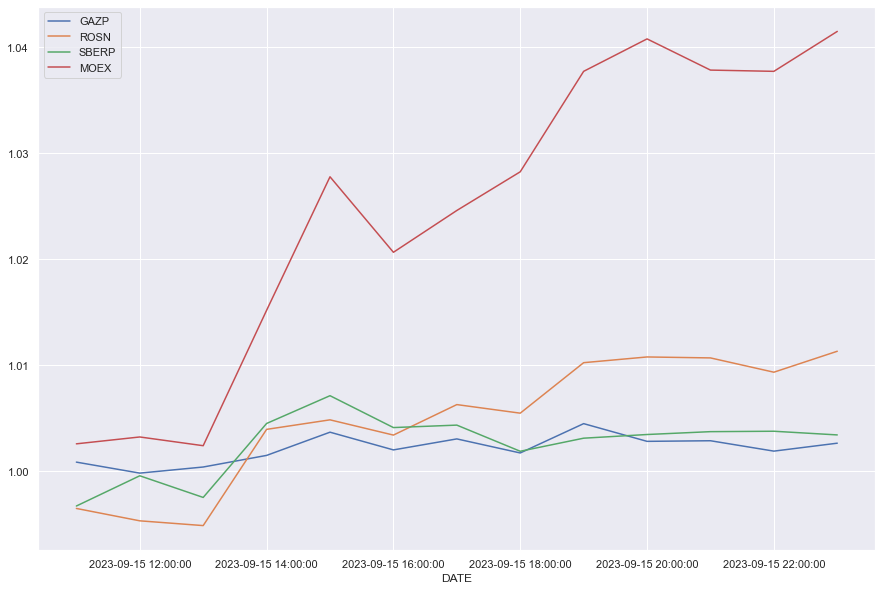

In [121]:
rets1.cumsum().apply(np.exp).plot(figsize=(15, 10));  
# plt.savefig('../../images/ch08/fts_03.png');

In [122]:
sym1 = 'GAZP'

In [123]:
data1 = pd.DataFrame(period5[sym1]).dropna()

In [124]:
window1 = 2
data1['min'] = data1[sym1].rolling(window=window1).min()  
data1['mean'] = data1[sym1].rolling(window=window1).mean()  
data1['std'] = data1[sym1].rolling(window=window1).std()  
data1['median'] = data1[sym1].rolling(window=window1).median()  
data1['max'] = data1[sym1].rolling(window=window1).max()  
data1['ewma'] = data1[sym1].ewm(halflife=0.5, min_periods=window1).mean()  
data1.dropna()

GAZP     min     mean       std   median     max  \
DATE                                                                      
2023-09-15 11:00:00  173.67  173.52  173.595  0.106066  173.595  173.67   
2023-09-15 12:00:00  173.49  173.49  173.580  0.127279  173.580  173.67   
2023-09-15 13:00:00  173.59  173.49  173.540  0.070711  173.540  173.59   
2023-09-15 14:00:00  173.78  173.59  173.685  0.134350  173.685  173.78   
2023-09-15 15:00:00  174.16  173.78  173.970  0.268701  173.970  174.16   
2023-09-15 16:00:00  173.87  173.87  174.015  0.205061  174.015  174.16   
2023-09-15 17:00:00  174.05  173.87  173.960  0.127279  173.960  174.05   
2023-09-15 18:00:00  173.82  173.82  173.935  0.162635  173.935  174.05   
2023-09-15 19:00:00  174.30  173.82  174.060  0.339411  174.060  174.30   
2023-09-15 20:00:00  174.01  174.01  174.155  0.205061  174.155  174.30   
2023-09-15 21:00:00  174.02  174.01  174.015  0.007071  174.015  174.02   
2023-09-15 22:00:00  173.85  173.85  173.935  0.120208  173.935  174.02   
2023-09-15 23:00:00  173.98  173.85  173.915  0.091924  173.915  173.98   

                           ewma  
DATE                             
2023-09-15 11:00:00  173.640000  
2023-09-15 12:00:00  173.525714  
2023-09-15 13:00:00  173.574118  
2023-09-15 14:00:00  173.728680  
2023-09-15 15:00:00  174.052249  
2023-09-15 16:00:00  173.915554  
2023-09-15 17:00:00  174.016390  
2023-09-15 18:00:00  173.869097  
2023-09-15 19:00:00  174.192275  
2023-09-15 20:00:00  174.055569  
2023-09-15 21:00:00  174.028892  
2023-09-15 22:00:00  173.894723  
2023-09-15 23:00:00  173.958681

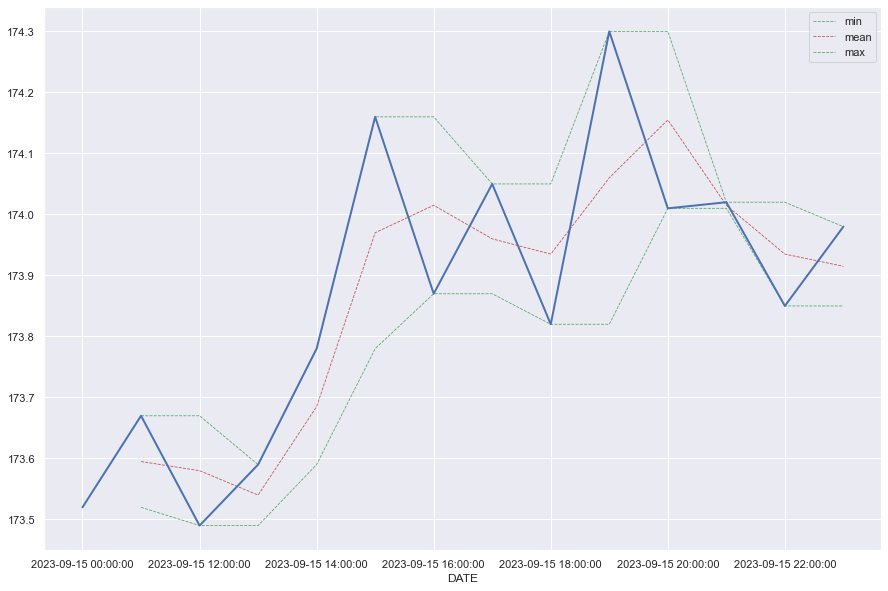

In [125]:
ax1 = data1[['min', 'mean', 'max']].iloc[:].plot(
    figsize=(15, 10), style=['g--', 'r--', 'g--'], lw=0.8)  
data1[sym1].iloc[-200:].plot(ax=ax1, lw=2.0);  
# plt.savefig('../../images/ch08/fts_05.png');

In [126]:
data1['SMA1'] = data1[sym1].rolling(window=2).mean()  
data1['SMA2'] = data1[sym1].rolling(window=4).mean()  
data1[[sym1, 'SMA1', 'SMA2']]

GAZP     SMA1      SMA2
DATE                                          
2023-09-15 00:00:00  173.52      NaN       NaN
2023-09-15 11:00:00  173.67  173.595       NaN
2023-09-15 12:00:00  173.49  173.580       NaN
2023-09-15 13:00:00  173.59  173.540  173.5675
2023-09-15 14:00:00  173.78  173.685  173.6325
2023-09-15 15:00:00  174.16  173.970  173.7550
2023-09-15 16:00:00  173.87  174.015  173.8500
2023-09-15 17:00:00  174.05  173.960  173.9650
2023-09-15 18:00:00  173.82  173.935  173.9750
2023-09-15 19:00:00  174.30  174.060  174.0100
2023-09-15 20:00:00  174.01  174.155  174.0450
2023-09-15 21:00:00  174.02  174.015  174.0375
2023-09-15 22:00:00  173.85  173.935  174.0450
2023-09-15 23:00:00  173.98  173.915  173.9650

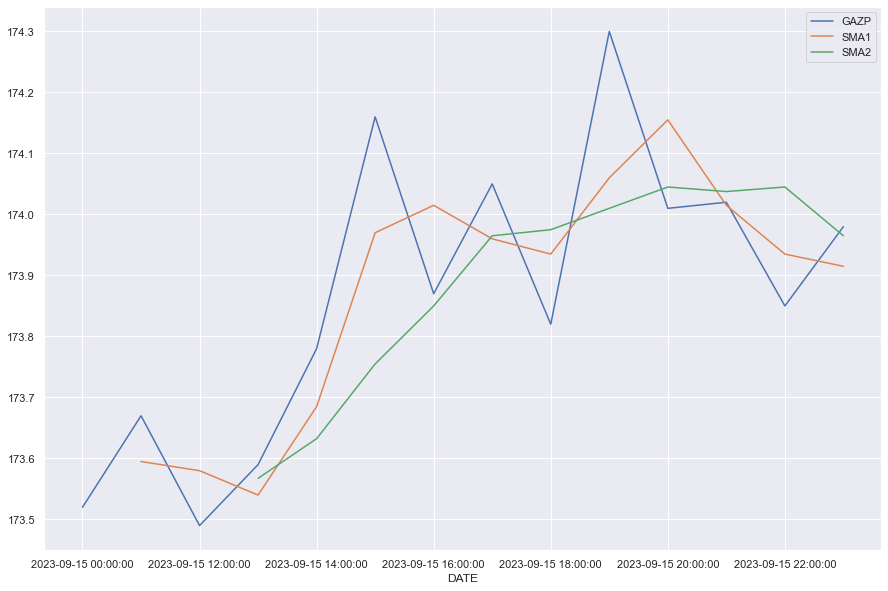

In [127]:
data1[[sym1, 'SMA1', 'SMA2']].plot(figsize=(15, 10));  
# plt.savefig('../../images/ch08/fts_06.png');

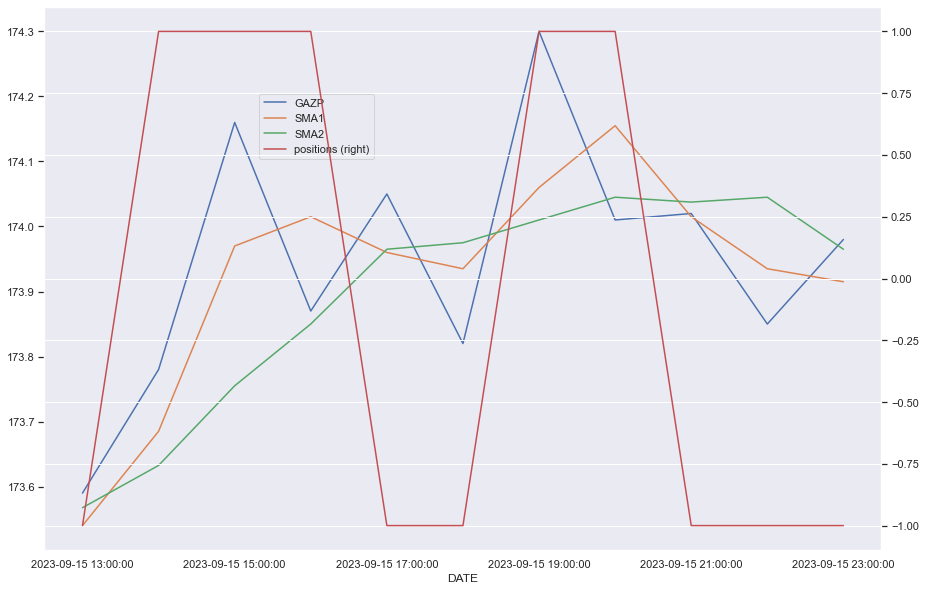

In [128]:
data1.dropna(inplace=True)
data1['positions'] = np.where(data1['SMA1'] > data1['SMA2'],  
                             1,  
                             -1)  
ax = data1[[sym1, 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 10),
                                              secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch08/fts_07.png');

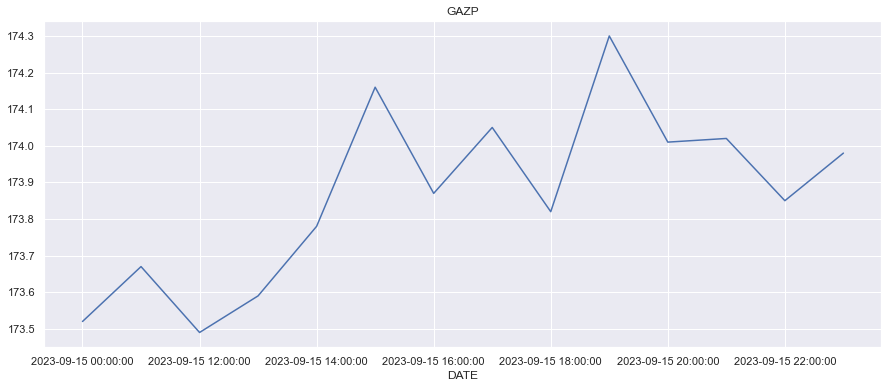

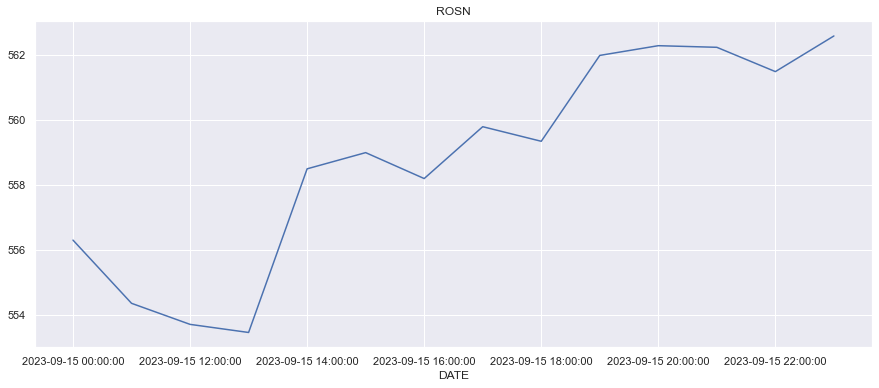

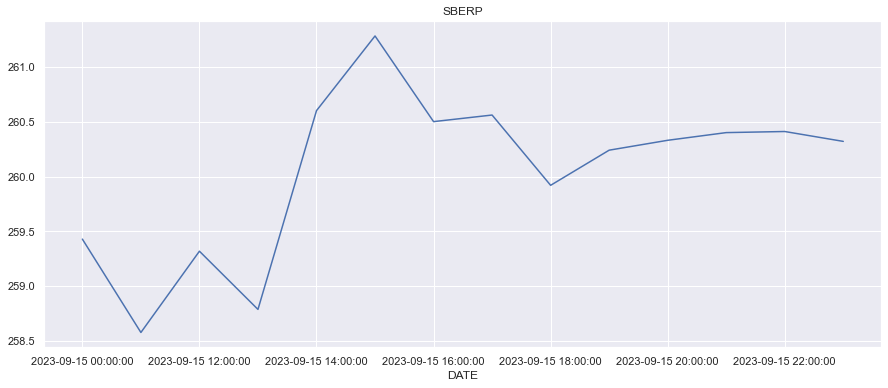

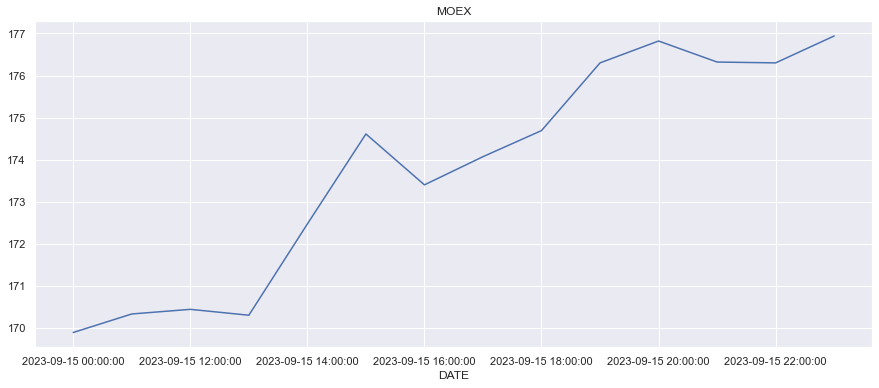

In [129]:
for i in period5.columns:
    period5[i].plot(figsize=(15,6))
    plt.title(i)
    plt.show()

In [130]:
# Создаем директорию и путь к файлу
prices_path = 'moex_prices_day'
for quotes in period5.columns:

        quotes_price_path = os.path.join(prices_path, f"{quotes.lower()}")
        if not os.path.exists(quotes_price_path ):
                os.makedirs(quotes_price_path)

        calculation_date = datetime.today().date().strftime(format="%d%m%Y")
        quotes_price_file_path = os.path.join(quotes_price_path, f'{quotes}_price_{calculation_date}.xlsx')
        
        with pd.ExcelWriter(quotes_price_file_path, engine='xlsxwriter') as writer:
                period5[f"{quotes}"].to_excel(writer, sheet_name='price')

                # Добавляем график с ценой
                plot_path = f'{quotes}_moex.png'
                plt.title('Цена', fontsize=16, fontweight='bold')
                plt.plot(period5[f"{quotes}"])
                plt.savefig(plot_path)
                plt.close()

                worksheet = writer.sheets['price']
                worksheet.insert_image('C2', plot_path)

#         print(f"{quotes} готов")

#         print("Удаляем ненужные файлы")
        for k in period5.columns:
            if os.path.exists(f"{k}_moex.png"):
                os.remove(f"{k}_moex.png")

In [131]:
result.set_index('DATE', inplace=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16388 entries, 2018-01-03 11:00:00 to 2023-09-16 00:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GAZP    16388 non-null  float64
 1   ROSN    16388 non-null  float64
 2   SBERP   16388 non-null  float64
 3   MOEX    16388 non-null  float64
dtypes: float64(4)
memory usage: 640.2+ KB


# Ковариация и корреляция

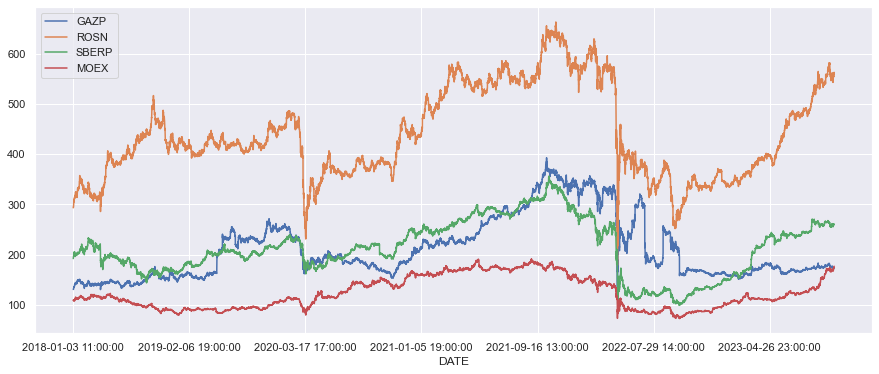

In [132]:
result.plot(figsize=(15,6))
plt.show()

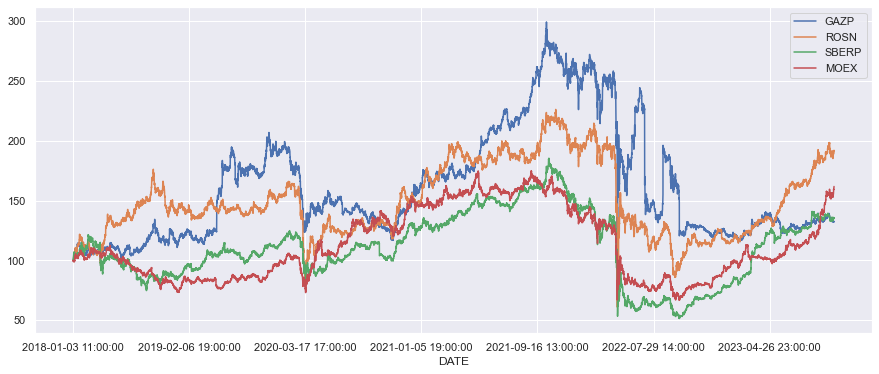

In [133]:
(result / result.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

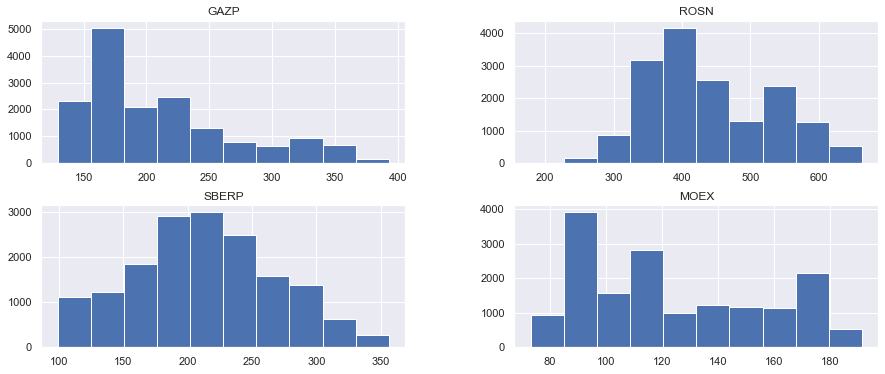

In [134]:
result.hist(figsize=(15,6))
plt.show()

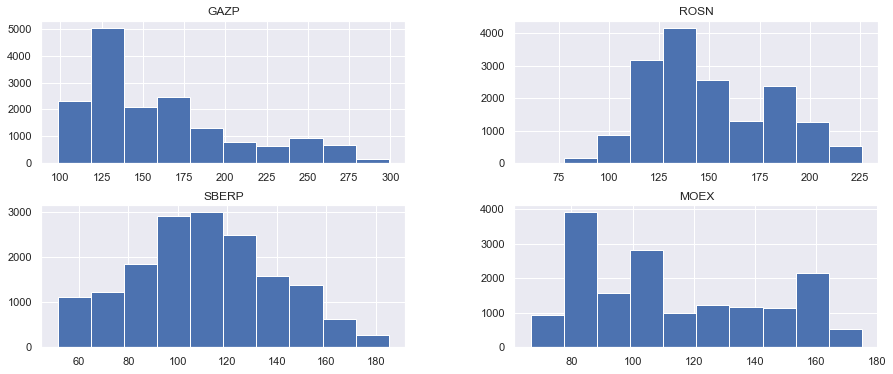

In [135]:
(result / result.iloc[0] * 100).hist(figsize = (15, 6));

In [136]:
#  создаем таблицу относительныхдоходностей
returns = (result / result.shift(1)) - 1  # 0+/-
returns.tail()

GAZP      ROSN     SBERP      MOEX
DATE                                                       
2023-09-15 20:00:00 -0.001664  0.000534  0.000346  0.002950
2023-09-15 21:00:00  0.000057 -0.000089  0.000269 -0.002828
2023-09-15 22:00:00 -0.000977 -0.001334  0.000038 -0.000113
2023-09-15 23:00:00  0.000748  0.001959 -0.000346  0.003630
2023-09-16 00:00:00 -0.001092  0.000355  0.000269  0.000622

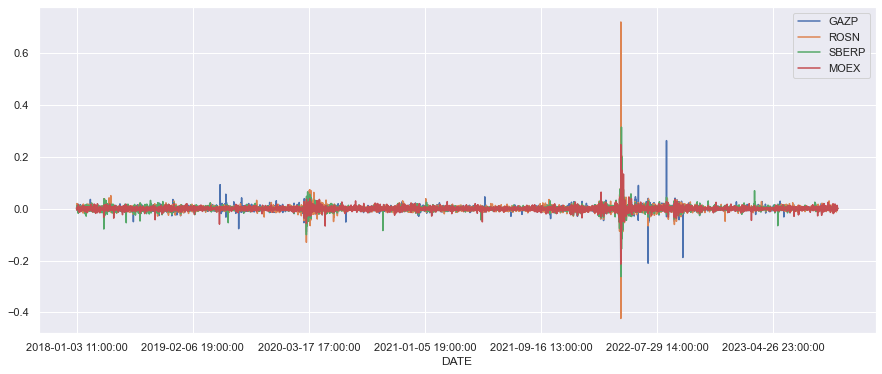

In [137]:
returns.plot(figsize = (15, 6));

In [138]:
result.dropna(inplace = True)

In [139]:
# Годовые доходности
annual_returns = returns.mean() * result.shape[0] # mean in period
annual_returns

GAZP     0.867487
ROSN     1.391717
SBERP    0.749016
MOEX     0.805949
dtype: float64

In [140]:
# Строим матрицу ковариаций
cov_matrix_a = returns.cov() * result.shape[0]
cov_matrix_a

GAZP      ROSN     SBERP      MOEX
GAZP   1.190614  0.980780  0.478895  0.496927
ROSN   0.980780  1.569744  0.437860  0.587549
SBERP  0.478895  0.437860  0.888091  0.379713
MOEX   0.496927  0.587549  0.379713  0.655643

In [141]:
# Логарифмируем для нормализации распределений и выравнпивания дисперсий
cov_matrix_LOG = np.log(result / result.shift(1)).cov() * result.shape[0]
cov_matrix_LOG

GAZP      ROSN     SBERP      MOEX
GAZP   1.177993  0.923272  0.483965  0.485999
ROSN   0.923272  1.468978  0.431984  0.543773
SBERP  0.483965  0.431984  0.897342  0.380059
MOEX   0.485999  0.543773  0.380059  0.649723

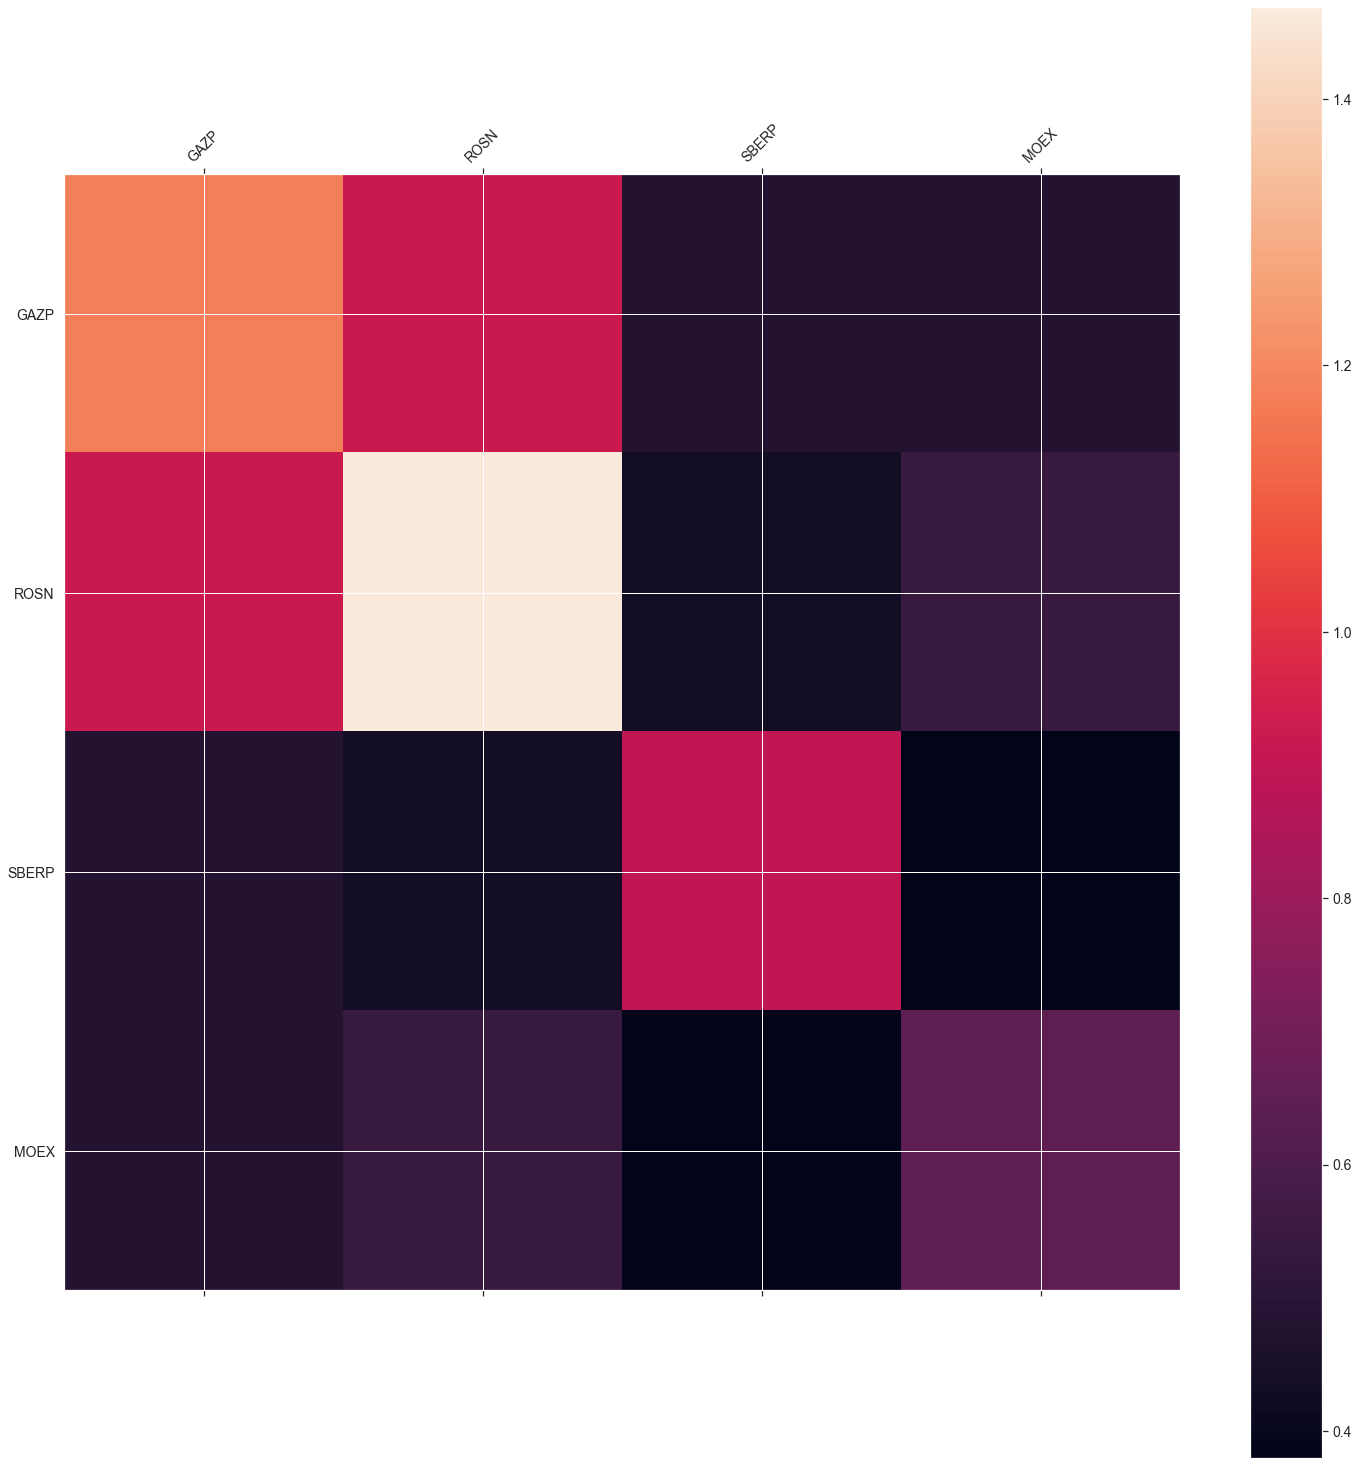

In [142]:
plt.figure(figsize=(25, 26))
plt.matshow(cov_matrix_LOG, fignum=1) #annot=True
plt.xticks(range(cov_matrix_LOG.shape[1]), cov_matrix_LOG.columns, fontsize=14, rotation=45)
plt.yticks(range(cov_matrix_LOG.shape[1]), cov_matrix_LOG.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

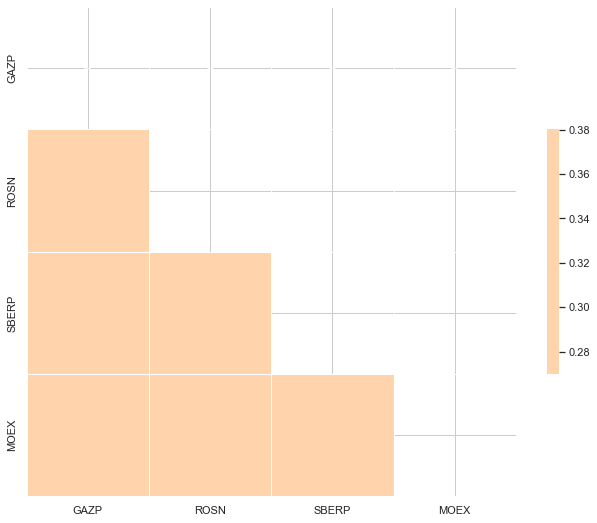

In [143]:
sns.set(style="whitegrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_matrix_LOG, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cov_matrix_LOG, mask=mask,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,);

Обратите внимание, как доходности акций из разных отраслей ковариирую между собой и как меняется ковариация в разные исторические периоды

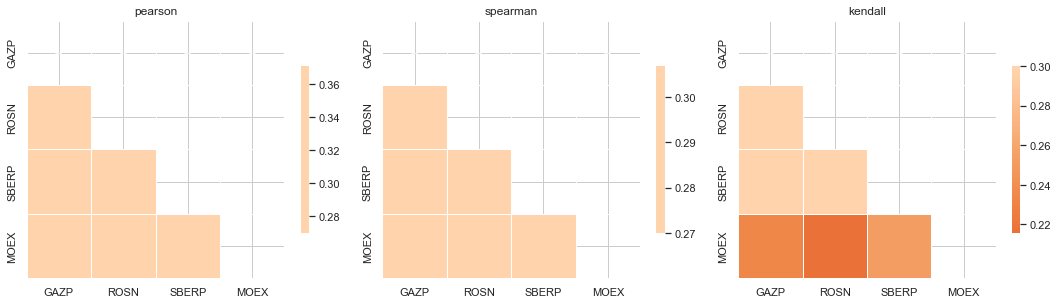

In [144]:
# А что показывает корреляция? 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.set(style="whitegrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_matrix_a, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

for corr_type, ax in zip(('pearson', "spearman", 'kendall'),(ax1, ax2, ax3)):

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(returns.corr(method=corr_type), mask=mask,  vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, ax=ax)
    ax.set_title(corr_type)

plt.tight_layout()
plt.show();

In [145]:
tickers = ["SBERP", "MOEX","GAZP", "ROSN"]

In [146]:
# Корреляции с помощью numpy
## For Dimensionality Reduction
correlations = np.abs([np.corrcoef(result["SBERP"],result[col_name])[0,1] for col_name in tickers[1:]])
print (list(zip(tickers[1:],correlations)))

[('MOEX', 0.8676143481828689), ('GAZP', 0.6023174447416509), ('ROSN', 0.8425664410168363)]


In [147]:
# Не сильно связаны!
correlations[correlations < .8]

array([0.60231744])

In [148]:
returns.isna().count()

GAZP     16388
ROSN     16388
SBERP    16388
MOEX     16388
dtype: int64

In [149]:
returns.dropna(inplace = True) 
returns

GAZP      ROSN     SBERP      MOEX
DATE                                                       
2018-01-03 12:00:00 -0.001446  0.000852  0.005095 -0.003105
2018-01-03 13:00:00  0.001905  0.002554  0.002793  0.001283
2018-01-03 14:00:00 -0.001065  0.002378  0.004333  0.001830
2018-01-03 15:00:00 -0.002361 -0.000847  0.006112 -0.003105
2018-01-03 16:00:00 -0.000153  0.000170  0.005207 -0.005130
...                       ...       ...       ...       ...
2023-09-15 20:00:00 -0.001664  0.000534  0.000346  0.002950
2023-09-15 21:00:00  0.000057 -0.000089  0.000269 -0.002828
2023-09-15 22:00:00 -0.000977 -0.001334  0.000038 -0.000113
2023-09-15 23:00:00  0.000748  0.001959 -0.000346  0.003630
2023-09-16 00:00:00 -0.001092  0.000355  0.000269  0.000622

[16387 rows x 4 columns]

In [150]:
# Выборка из 2х акций с разными типами корреляций

sem = pd.DataFrame(columns = ('pearson', "spearman", 'kendall'))
for corr_type in sem.columns:
#     print (corr_type)
    sem[corr_type] = [returns['SBERP'].corr(other=returns["MOEX"], method=corr_type)] #.sem()
sem

pearson  spearman   kendall
0  0.497614  0.356777  0.252187

In [151]:
# простой способ
[returns['SBERP'].corr(other=returns["MOEX"])]

[0.497614090968166]

In [152]:
# доверительный интервал
returns['SBERP'].sem() 

5.750637301021901e-05

In [153]:
# средняя доходность
returns['SBERP'].mean() 

4.5705171377771705e-05

<Axes: >

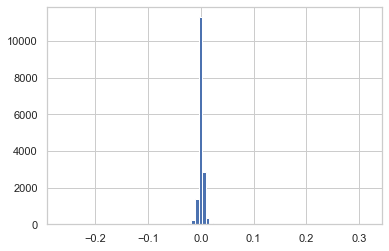

In [154]:
# доходность SBERP на графике
returns['SBERP'].hist(bins=85)

In [155]:
# os.system('hdfs dfs -rm tablo.csv')

In [156]:
# spark.table('ivanov.logs').repartition(1).write.mode('overwrite').csv("/user/std03/logs")

In [157]:
# os.system('hdfs dfs -get /user/std03/logs /home/std03')

In [158]:
# sc.stop()

# News RBC

In [1]:
import requests as rq
from bs4 import BeautifulSoup as bs
import datetime as dt
import json
import re
import os
import pandas as pd

In [2]:
RBC_FINANCE_URL = 'https://rbc.ru/v10/ajax/get-news-by-filters/?category=finances&limit=20&offset='
CLEANR = re.compile('<.*?>') 

In [3]:
def parse_rbc_news(days=1):
    offset = 0
    ress = []
    while (True):
        response = rq.get(RBC_FINANCE_URL + str(offset))
        offset += 20
        if (response.status_code == 200):
            news_urls = re.findall('https://www.rbc.ru/finances/\d+/\d+/\d+/\w+', response.text)
            for url in news_urls:
                try:
                    res = {}
                    res['url']= url
                    news = rq.get(url).text
                    soup = bs(news, 'html.parser')
                    res['site'] = 'rbc_finances'
                    res['title'] = soup.body.find(class_="article__header__title-in js-slide-title").text.replace("\xa0", " ").replace("\t", " ").strip()
                    
                    def cleanhtml(raw_html):
                        return re.sub(CLEANR, '', raw_html)

                    raw = soup.body.find('div', class_="article__text article__text_free").find_all('p')
                    res['text'] = ''
                    for i in raw:
                        if (str(i).find('span') == -1):
                            res['text'] += cleanhtml(str(i))
                    try:
                        res['description'] = soup.body.find(class_="article__text__overview").text.replace("\xa0", " ").replace("\t", " ")
                    except:
                        if (len(res['text']) > 100):
                            res['description'] = res['text'][:100] + '...'
                        else:
                            res['description'] = res['text']
                    date_raw =re.findall('\d{4}-\d+-\d+T\d+:\d+:\d+' ,str(soup.body.find(class_="article__header__date")))[0]
                    date, time = date_raw.split('T')
                    date = date.split('-')
                    time = time.split(':')
                    res['timestamp'] = dt.datetime(int(date[0]), int(date[1]), int(date[2]), int(time[0]), int(time[1]), int(time[2])).timestamp()
                    if (days * 86400 + res['timestamp'] < dt.datetime.now().timestamp()):
                        return ress
                    ress.append(res)
                except Exception as e:
                    print(e, url)
        else:
            return ress

In [4]:
res = parse_rbc_news(7)

In [5]:
with open('rbc_finances_news.json', 'w+', encoding='utf8') as outfile:
        json.dump(res, outfile)

In [6]:
df1 = pd.json_normalize(res)

In [7]:
df1['text'] = df1['text'].replace(r'\s+|\\n', ' ', regex=True)
df1['description'] = df1['description'].replace(r'\s+|\\n', ' ', regex=True)
df1[df1['text'].str.contains("Газпром|Роснефт|Сбербанк|Мосбиржа")]

url          site  \
0   https://www.rbc.ru/finances/26/09/2023/65118fe...  rbc_finances   
8   https://www.rbc.ru/finances/22/09/2023/650c7e3...  rbc_finances   
10  https://www.rbc.ru/finances/21/09/2023/650c20d...  rbc_finances   
11  https://www.rbc.ru/finances/20/09/2023/650abe0...  rbc_finances   
14  https://www.rbc.ru/finances/20/09/2023/6509dba...  rbc_finances   
16  https://www.rbc.ru/finances/19/09/2023/6509b57...  rbc_finances   

                                                title  \
0   Коллекторы «Сбера» начали продавать «зарубежны...   
8   ВТБ повысил минимальную ставку по ипотеке без ...   
10       В «Сбере» описали портрет типичного должника   
11   Сбербанк запустит переводы на карты банков Китая   
14  Сбербанк перестанет давать скидки к ставкам ль...   
16  Сбербанк увеличил минимальный первый взнос по ...   

                                                 text  \
0   Коллекторское агентство «АктивБизнесКонсалт» (...   
8   ВТБ с 22 сентября повысил ставки по ипотечным ...   
10  В России чаще всего просрочивают платежи заемщ...   
11  Сбербанк осенью планирует вновь запустить дене...   
14  Сбербанк устанавливает единую ставку на все це...   
16  Сбербанк изменил требования к размеру минималь...   

                                          description     timestamp  
0    Коллекторы из группы «Сбера» стали уступать п...  1.695704e+09  
8    Минимальная ставка по ипотеке для зарплатных ...  1.695330e+09  
10   Заемщики в возрасте от 18 до 29 лет, а также ...  1.695297e+09  
11   Сбербанк планирует восстановить денежные пере...  1.695208e+09  
14   Сбербанк установил единую ставку на все цели ...  1.695157e+09  
16   «Сбер» изменил пороговый уровень первоначальн...  1.695143e+09

# Формирование отчета

In [166]:
# 1. Set up multiple variables to store the titles, text within the report
# Настройте несколько переменных для хранения заголовков и текста в отчете.
page_title_text='My report'
title_text = 'Daily MOEX Sber prices report'
text = 'Hello, welcome to your report!'
prices_text = 'Historical prices of MOEX Sber'
stats_text = 'Historical prices summary statistics'
stats_text1 = 'News RBC Sber'


# 2. Combine them together using a long f-string
# Соедините их вместе, используя длинную f-строку.
html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
            <img src='strat_plot_03.png' width="700">
            <h2>{prices_text}</h2>
            {d.tail(3).to_html()}
            <h2>{stats_text}</h2>
            {data.tail().to_html()}
            <h2>{stats_text1}</h2>
            {df1[df1['text'].str.contains("Сбербанк")].to_html()}
        </body>
    </html>
    '''
# 3. Write the html string as an HTML file
# Запишите строку html как файл HTML.
with open('html_report.html', 'w', encoding="utf-8") as f:
    f.write(html)

In [167]:
# from weasyprint import HTML, CSS
# css = CSS(string='''
#     @page {size: A4; margin: 1cm;} 
#     th, td {border: 1px solid black;}
#     ''')
# HTML('html_report.html').write_pdf('weasyprint_pdf_report.pdf', stylesheets=[css])

In [168]:
def output_df_to_pdf(pdf, df):
    # A cell is a rectangular area, possibly framed, which contains some text
    # Set the width and height of cell
    table_cell_width = 25
    table_cell_height = 6
    # Select a font as Arial, bold, 8
    pdf.set_font('Arial', 'B', 8)
    
    # Loop over to print column names
    cols = df.columns
    for col in cols:
        pdf.cell(table_cell_width, table_cell_height, col, align='C', border=1)
    # Line break
    pdf.ln(table_cell_height)
    # Select a font as Arial, regular, 10
    pdf.set_font('Arial', '', 10)
    # Loop over to print each data in the table
    for row in df.itertuples():
        for col in cols:
            value = str(getattr(row, col))
            pdf.cell(table_cell_width, table_cell_height, value, align='C', border=1)
        pdf.ln(table_cell_height)

In [169]:
from fpdf import FPDF

# 1. Set up the PDF doc basics
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)

# 2. Layout the PDF doc contents
## Title
pdf.cell(40, 10, 'Daily MOEX SBER prices report')
## Line breaks
pdf.ln(20)
## Image
pdf.image('strat_plot_03.png')
## Line breaks
pdf.ln(20)
## Show table of historical data
### Transform the DataFrame to include index of Date
sp500_history_pdf = d.reset_index()
### Transform the Date column as str dtype
sp500_history_pdf['DATE'] = sp500_history_pdf['DATE'].astype(str)
### Round the numeric columns to 2 decimals
numeric_cols = sp500_history_pdf.select_dtypes(include='number').columns
sp500_history_pdf[numeric_cols] = sp500_history_pdf[numeric_cols].round(2)
### Use the function defined earlier to print the DataFrame as a table on the PDF 
output_df_to_pdf(pdf, sp500_history_pdf.tail(3))
## Line breaks
pdf.ln(20)
## Show table of historical summary data
sp500_history_summary_pdf = data.reset_index()
numeric_cols = sp500_history_summary_pdf.select_dtypes(include='number').columns
sp500_history_summary_pdf[numeric_cols] = sp500_history_summary_pdf[numeric_cols].round(2)

output_df_to_pdf(pdf, sp500_history_summary_pdf)
# 3. Output the PDF file
pdf.output('fpdf_pdf_report.pdf', 'F')

''

# Прогнозирование

In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [171]:
# загружаем on-line датасет - Биржевой курс акций Сбербанк-П  (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=23&token=03ADUVZwA9gRNHBgCOuXyphBx7YgdmsSQYVO4KJYqu1HIwjMsNG1XJO5gdMZWjZ5XRq_FY8Ev2QEnQUHnBWFl91ZlAExJav4c39F82glIPI2xIsRHl1lgKedIbUiZBWe5TRZcWTClPBvALDMV8aZMcw64wRAeSgVrg5_p3r3zoVvHnJ5D8PDKNxrMgAhdBcBjeTu8lLA5LLPcpXpb3ZSUFfPZc54ehulaZ4zCngw_ZjB5uz82i_3EMb8zOb49woCsrQmqzj40Qe-o37KklI-VEdVOHp9gZ2jTSwcm_a4veyfj91O4xJmiPg6XeSQdmn8ESulDijDy9BHEhPMUt18dM_4TYztqgGwg-EEsv9h6O_jdAQsPe1mEZ-7CnkRG45ExoszJDe2XnYM9xHMqUwkrEBTZ--IuYNw680_zpp7poUk86I-am6PxhNaRa1NRCcUZM2Gcgr6AvshhOB73R68aFjswX29Kg28sLS8X0uAUJVLPNE2uDyc2Ni64HiDlOnp3CBJNfa1Y8aCfpd9KuNvuz8zBqBalYCf5f_w&code={cod5}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod5}_200101_230820&e=.csv&cn={cod5}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
dfs = pd.read_csv(s)
# df5.columns = ['TICKER5','PER5', 'DATE', 'TIME5', 'OPEN5', 'HIGH5', 'LOW5', 'CLOSE5', 'VOL5']
# df5['DATE'] = pd.to_datetime(df5['DATE'], format='%Y%m%d')
# df5.set_index('DATE', inplace=True)
dfs

<TICKER> <PER>    <DATE>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  \
0       SBERP     D  20180103       0  190.66  197.40  190.47   197.30   
1       SBERP     D  20180104       0  197.99  204.40  197.01   203.03   
2       SBERP     D  20180105       0  204.02  205.88  203.03   203.50   
3       SBERP     D  20180109       0  203.91  205.93  200.37   201.30   
4       SBERP     D  20180110       0  201.99  202.42  196.16   197.52   
...       ...   ...       ...     ...     ...     ...     ...      ...   
1419    SBERP     D  20230911       0  256.44  257.99  255.01   256.03   
1420    SBERP     D  20230912       0  256.98  261.98  256.50   261.78   
1421    SBERP     D  20230913       0  262.00  262.29  257.49   257.95   
1422    SBERP     D  20230914       0  258.30  261.20  254.61   259.43   
1423    SBERP     D  20230915       0  259.43  261.98  258.13   260.39   

        <VOL>  
0     3231300  
1     4334900  
2     4082400  
3     3860100  
4     4842300  
...       ...  
1419  5729070  
1420  4038680  
1421  2498990  
1422  4562110  
1423  3223450  

[1424 rows x 9 columns]

In [172]:
dfs.columns = ['TICKER','PER', 'ds', 'TIME', 'OPEN', 'HIGH', 'LOW', 'y', 'VOL']
dfs['ds'] = pd.to_datetime(dfs['ds'], format='%Y%m%d')#,dayfirst=True)
dfs

TICKER PER         ds  TIME    OPEN    HIGH     LOW       y      VOL
0     SBERP   D 2018-01-03     0  190.66  197.40  190.47  197.30  3231300
1     SBERP   D 2018-01-04     0  197.99  204.40  197.01  203.03  4334900
2     SBERP   D 2018-01-05     0  204.02  205.88  203.03  203.50  4082400
3     SBERP   D 2018-01-09     0  203.91  205.93  200.37  201.30  3860100
4     SBERP   D 2018-01-10     0  201.99  202.42  196.16  197.52  4842300
...     ...  ..        ...   ...     ...     ...     ...     ...      ...
1419  SBERP   D 2023-09-11     0  256.44  257.99  255.01  256.03  5729070
1420  SBERP   D 2023-09-12     0  256.98  261.98  256.50  261.78  4038680
1421  SBERP   D 2023-09-13     0  262.00  262.29  257.49  257.95  2498990
1422  SBERP   D 2023-09-14     0  258.30  261.20  254.61  259.43  4562110
1423  SBERP   D 2023-09-15     0  259.43  261.98  258.13  260.39  3223450

[1424 rows x 9 columns]

In [173]:
dfs1 = dfs[['ds','y']]
dfs1.set_index('ds', inplace=True)
dfs1.sort_index(inplace=True)
print('Монотонность - ',dfs1.index.is_monotonic)

Монотонность -  True


In [174]:
dfs1

y
ds                
2018-01-03  197.30
2018-01-04  203.03
2018-01-05  203.50
2018-01-09  201.30
2018-01-10  197.52
...            ...
2023-09-11  256.03
2023-09-12  261.78
2023-09-13  257.95
2023-09-14  259.43
2023-09-15  260.39

[1424 rows x 1 columns]

<Axes: xlabel='ds'>

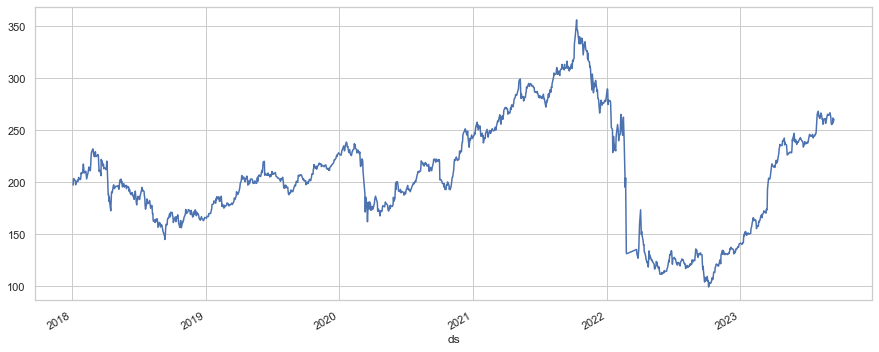

In [175]:
dfs1.y.plot(figsize=(15,6))

<Axes: xlabel='ds'>

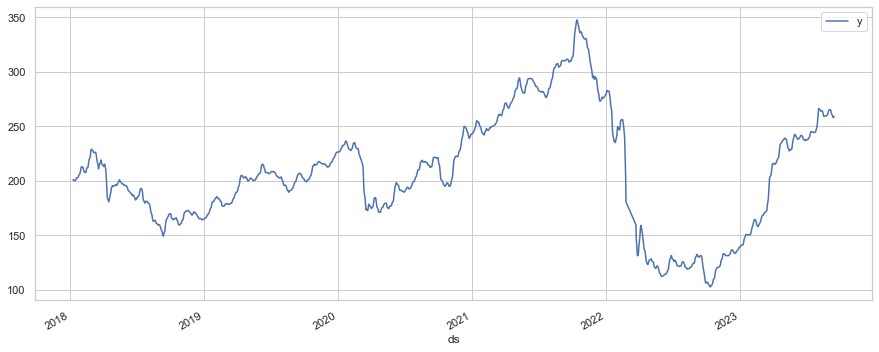

In [176]:
dfs1.rolling(5).mean().plot(figsize=(15,6))

In [177]:
# функция по созданию сгенерированных признаков
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['y'].shift(lag)

    data['y_mean'] = data['y'].shift().rolling(rolling_mean_size).mean().copy()

In [178]:
make_features(dfs1, 7, 3)
dfs1.dropna(inplace=True)
dfs1

y  year  month  day  dayofweek  is_weekend   lag_1   lag_2  \
ds                                                                            
2018-01-15  201.90  2018      1   15          0           0  199.49  199.78   
2018-01-16  200.82  2018      1   16          1           0  201.90  199.49   
2018-01-17  201.34  2018      1   17          2           0  200.82  201.90   
2018-01-18  204.63  2018      1   18          3           0  201.34  200.82   
2018-01-19  203.97  2018      1   19          4           0  204.63  201.34   
...            ...   ...    ...  ...        ...         ...     ...     ...   
2023-09-11  256.03  2023      9   11          0           0  255.55  258.26   
2023-09-12  261.78  2023      9   12          1           0  256.03  255.55   
2023-09-13  257.95  2023      9   13          2           0  261.78  256.03   
2023-09-14  259.43  2023      9   14          3           0  257.95  261.78   
2023-09-15  260.39  2023      9   15          4           0  259.43  257.95   

             lag_3   lag_4   lag_5   lag_6   lag_7      y_mean  
ds                                                              
2018-01-15  197.52  201.30  203.50  203.03  197.30  198.930000  
2018-01-16  199.78  197.52  201.30  203.50  203.03  200.390000  
2018-01-17  199.49  199.78  197.52  201.30  203.50  200.736667  
2018-01-18  201.90  199.49  199.78  197.52  201.30  201.353333  
2018-01-19  200.82  201.90  199.49  199.78  197.52  202.263333  
...            ...     ...     ...     ...     ...         ...  
2023-09-11  262.94  264.63  266.82  264.61  264.75  258.916667  
2023-09-12  258.26  262.94  264.63  266.82  264.61  256.613333  
2023-09-13  255.55  258.26  262.94  264.63  266.82  257.786667  
2023-09-14  256.03  255.55  258.26  262.94  264.63  258.586667  
2023-09-15  261.78  256.03  255.55  258.26  262.94  259.720000  

[1417 rows x 14 columns]

In [179]:
features = dfs1.drop(['y'],axis = 1)
target = dfs1['y']
X_train,X_test,y_train, y_test = train_test_split(features,target, shuffle=False, test_size=0.25)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (1062, 13)
X_test (355, 13)


In [180]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [181]:
y_predicted_lr = model_lr.predict(X_test)
y_predicted_lr

array([124.47781286, 122.81466968, 123.23117939, 118.98141129,
       124.73951879, 134.59410087, 127.35682992, 129.94292053,
       126.11133638, 123.999606  , 124.35101646, 120.98022714,
       116.0130755 , 116.72343151, 119.89492565, 124.05853932,
       122.98232205, 122.78958839, 120.79839955, 116.90761939,
       118.34595178, 116.12874621, 113.07203197, 111.9833577 ,
       111.80894979, 111.74672965, 113.2184973 , 112.38643566,
       112.5883453 , 114.18724566, 113.48244134, 115.06155789,
       114.31727408, 114.36105829, 114.81807491, 116.56933365,
       117.47774795, 119.13895524, 125.33234451, 124.44711247,
       127.56283746, 131.21116524, 130.99443715, 134.44100581,
       134.28160992, 127.85309838, 120.75933648, 126.07339585,
       127.64914512, 127.75996716, 127.67544208, 126.35122235,
       126.86731247, 122.51223421, 122.26064693, 120.61591645,
       119.89490987, 123.50627737, 123.17738768, 121.58329648,
       120.47806045, 119.26389705, 123.22888749, 125.75

In [182]:
df1_with_predict = X_test
df1_with_predict['y'] = y_test
df1_with_predict['y_predicted_lr'] = y_predicted_lr
df1_with_predict[['y','y_predicted_lr']]

y  y_predicted_lr
ds                                
2022-04-21  123.12      124.477813
2022-04-22  123.27      122.814670
2022-04-25  118.51      123.231179
2022-04-26  125.45      118.981411
2022-04-27  134.00      124.739519
...            ...             ...
2023-09-11  256.03      254.994808
2023-09-12  261.78      255.396316
2023-09-13  257.95      261.257968
2023-09-14  259.43      258.266740
2023-09-15  260.39      258.526863

[355 rows x 2 columns]

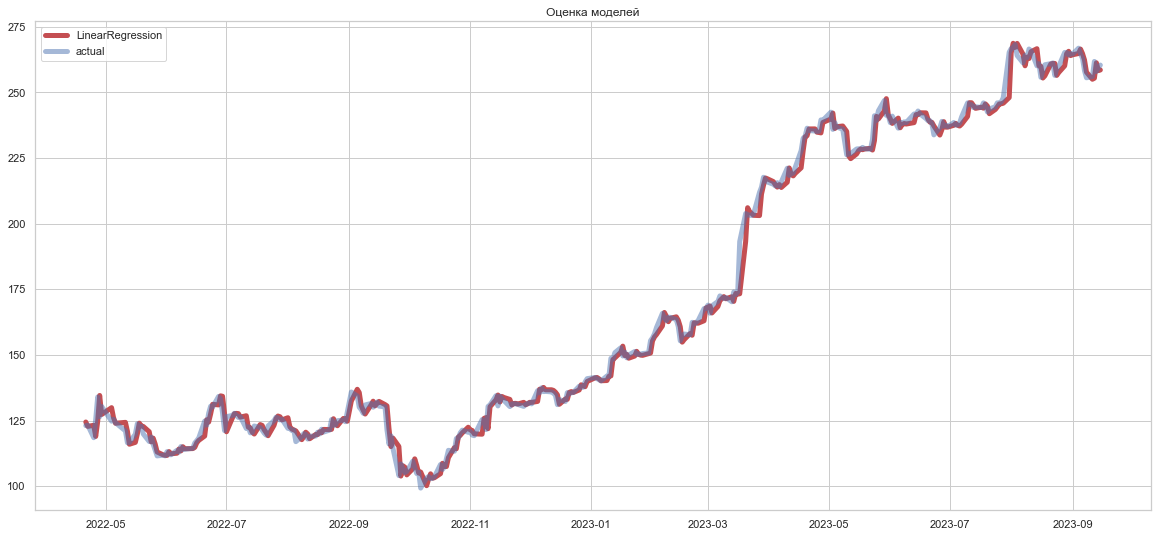

In [183]:
plt.figure(figsize=(20, 9))
plt.plot(df1_with_predict['y_predicted_lr'], "r",linewidth=5, label="LinearRegression")
plt.plot(df1_with_predict['y'],'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);

In [184]:
# Посчитаем ошибки модели
print('RMSE тестовой выборки LinearRegression: ', np.sqrt(mean_squared_error(y_test, y_predicted_lr)))
print('MAE тестовой выборки Linear Regression: ', mean_absolute_error(y_test, y_predicted_lr))

RMSE тестовой выборки LinearRegression:  3.1661564007801326
MAE тестовой выборки Linear Regression:  2.140202669380441


In [185]:
# Добавим в данные на завтра и предскажем курс акции в этот день
dfap = dfs1.tail(1).copy()
dfap['y'] = 0
dfap = dfap.reset_index()
dfap['ds'] = dfap['ds'] + timedelta(days=1)
dfap.set_index('ds', drop=True, inplace=True)

df_new = dfs1.append(dfap)
df_new

y  year  month  day  dayofweek  is_weekend   lag_1   lag_2  \
ds                                                                            
2018-01-15  201.90  2018      1   15          0           0  199.49  199.78   
2018-01-16  200.82  2018      1   16          1           0  201.90  199.49   
2018-01-17  201.34  2018      1   17          2           0  200.82  201.90   
2018-01-18  204.63  2018      1   18          3           0  201.34  200.82   
2018-01-19  203.97  2018      1   19          4           0  204.63  201.34   
...            ...   ...    ...  ...        ...         ...     ...     ...   
2023-09-12  261.78  2023      9   12          1           0  256.03  255.55   
2023-09-13  257.95  2023      9   13          2           0  261.78  256.03   
2023-09-14  259.43  2023      9   14          3           0  257.95  261.78   
2023-09-15  260.39  2023      9   15          4           0  259.43  257.95   
2023-09-16    0.00  2023      9   15          4           0  259.43  257.95   

             lag_3   lag_4   lag_5   lag_6   lag_7      y_mean  
ds                                                              
2018-01-15  197.52  201.30  203.50  203.03  197.30  198.930000  
2018-01-16  199.78  197.52  201.30  203.50  203.03  200.390000  
2018-01-17  199.49  199.78  197.52  201.30  203.50  200.736667  
2018-01-18  201.90  199.49  199.78  197.52  201.30  201.353333  
2018-01-19  200.82  201.90  199.49  199.78  197.52  202.263333  
...            ...     ...     ...     ...     ...         ...  
2023-09-12  258.26  262.94  264.63  266.82  264.61  256.613333  
2023-09-13  255.55  258.26  262.94  264.63  266.82  257.786667  
2023-09-14  256.03  255.55  258.26  262.94  264.63  258.586667  
2023-09-15  261.78  256.03  255.55  258.26  262.94  259.720000  
2023-09-16  261.78  256.03  255.55  258.26  262.94  259.720000  

[1418 rows x 14 columns]

In [186]:
make_features(df_new, 7, 3)
df_new.dropna(inplace=True)
df_new

y  year  month  day  dayofweek  is_weekend   lag_1   lag_2  \
ds                                                                            
2018-01-24  204.20  2018      1   24          2           0  202.71  202.50   
2018-01-25  209.00  2018      1   25          3           0  204.20  202.71   
2018-01-26  208.00  2018      1   26          4           0  209.00  204.20   
2018-01-29  209.90  2018      1   29          0           0  208.00  209.00   
2018-01-30  213.35  2018      1   30          1           0  209.90  208.00   
...            ...   ...    ...  ...        ...         ...     ...     ...   
2023-09-12  261.78  2023      9   12          1           0  256.03  255.55   
2023-09-13  257.95  2023      9   13          2           0  261.78  256.03   
2023-09-14  259.43  2023      9   14          3           0  257.95  261.78   
2023-09-15  260.39  2023      9   15          4           0  259.43  257.95   
2023-09-16    0.00  2023      9   16          5           0  260.39  259.43   

             lag_3   lag_4   lag_5   lag_6   lag_7      y_mean  
ds                                                              
2018-01-24  203.97  204.63  201.34  200.82  201.90  203.060000  
2018-01-25  202.50  203.97  204.63  201.34  200.82  203.136667  
2018-01-26  202.71  202.50  203.97  204.63  201.34  205.303333  
2018-01-29  204.20  202.71  202.50  203.97  204.63  207.066667  
2018-01-30  209.00  204.20  202.71  202.50  203.97  208.966667  
...            ...     ...     ...     ...     ...         ...  
2023-09-12  258.26  262.94  264.63  266.82  264.61  256.613333  
2023-09-13  255.55  258.26  262.94  264.63  266.82  257.786667  
2023-09-14  256.03  255.55  258.26  262.94  264.63  258.586667  
2023-09-15  261.78  256.03  255.55  258.26  262.94  259.720000  
2023-09-16  257.95  261.78  256.03  255.55  258.26  259.256667  

[1411 rows x 14 columns]

In [187]:
X_test1 = df_new.drop(['y'],axis = 1)
X_test1

year  month  day  dayofweek  is_weekend   lag_1   lag_2   lag_3  \
ds                                                                            
2018-01-24  2018      1   24          2           0  202.71  202.50  203.97   
2018-01-25  2018      1   25          3           0  204.20  202.71  202.50   
2018-01-26  2018      1   26          4           0  209.00  204.20  202.71   
2018-01-29  2018      1   29          0           0  208.00  209.00  204.20   
2018-01-30  2018      1   30          1           0  209.90  208.00  209.00   
...          ...    ...  ...        ...         ...     ...     ...     ...   
2023-09-12  2023      9   12          1           0  256.03  255.55  258.26   
2023-09-13  2023      9   13          2           0  261.78  256.03  255.55   
2023-09-14  2023      9   14          3           0  257.95  261.78  256.03   
2023-09-15  2023      9   15          4           0  259.43  257.95  261.78   
2023-09-16  2023      9   16          5           0  260.39  259.43  257.95   

             lag_4   lag_5   lag_6   lag_7      y_mean  
ds                                                      
2018-01-24  204.63  201.34  200.82  201.90  203.060000  
2018-01-25  203.97  204.63  201.34  200.82  203.136667  
2018-01-26  202.50  203.97  204.63  201.34  205.303333  
2018-01-29  202.71  202.50  203.97  204.63  207.066667  
2018-01-30  204.20  202.71  202.50  203.97  208.966667  
...            ...     ...     ...     ...         ...  
2023-09-12  262.94  264.63  266.82  264.61  256.613333  
2023-09-13  258.26  262.94  264.63  266.82  257.786667  
2023-09-14  255.55  258.26  262.94  264.63  258.586667  
2023-09-15  256.03  255.55  258.26  262.94  259.720000  
2023-09-16  261.78  256.03  255.55  258.26  259.256667  

[1411 rows x 13 columns]

In [188]:
yy = model_lr.predict(X_test1)
yy

array([202.53156196, 203.77170868, 208.3312965 , ..., 258.26674041,
       258.52686346, 260.21783402])

In [189]:
len(yy)

1411

## Используем Facebok

In [190]:
# https://facebook.github.io/prophet/
from prophet import Prophet

In [191]:
m = Prophet()
df_prophet = dfs[['ds', 'y']]
df_prophet

ds       y
0    2018-01-03  197.30
1    2018-01-04  203.03
2    2018-01-05  203.50
3    2018-01-09  201.30
4    2018-01-10  197.52
...         ...     ...
1419 2023-09-11  256.03
1420 2023-09-12  261.78
1421 2023-09-13  257.95
1422 2023-09-14  259.43
1423 2023-09-15  260.39

[1424 rows x 2 columns]

In [192]:
m.add_country_holidays(country_name='RU')
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [193]:
future = m.make_future_dataframe(periods=1)
future.tail(7)

ds
1418 2023-09-08
1419 2023-09-11
1420 2023-09-12
1421 2023-09-13
1422 2023-09-14
1423 2023-09-15
1424 2023-09-16

In [194]:
forecast = m.predict(future)
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2018-01-03  215.966082  199.677454  233.961256   215.966082   215.966082   
1    2018-01-04  215.758543  199.708330  231.009982   215.758543   215.758543   
2    2018-01-05  215.551004  199.270743  231.961030   215.551004   215.551004   
3    2018-01-09  214.720848  200.594014  231.422904   214.720848   214.720848   
4    2018-01-10  214.513309  199.332375  232.293126   214.513309   214.513309   
...         ...         ...         ...         ...          ...          ...   
1420 2023-09-12  263.211990  249.941022  283.695335   263.211990   263.211990   
1421 2023-09-13  263.625022  251.124273  283.058143   263.625022   263.625022   
1422 2023-09-14  264.038054  250.619525  284.108259   264.038054   264.038054   
1423 2023-09-15  264.451086  250.492420  284.043089   264.451086   264.451086   
1424 2023-09-16  264.864118  245.178224  279.060765   264.864118   264.864118   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
0               0.0                  0.0                  0.0   
1               0.0                  0.0                  0.0   
2               0.0                  0.0                  0.0   
3               0.0                  0.0                  0.0   
4               0.0                  0.0                  0.0   
...             ...                  ...                  ...   
1420            0.0                  0.0                  0.0   
1421            0.0                  0.0                  0.0   
1422            0.0                  0.0                  0.0   
1423            0.0                  0.0                  0.0   
1424            0.0                  0.0                  0.0   

      Defender of the Fatherland Day  ...    weekly  weekly_lower  \
0                                0.0  ...  3.230393      3.230393   
1                                0.0  ...  2.293383      2.293383   
2                                0.0  ...  2.268902      2.268902   
3                                0.0  ...  3.181194      3.181194   
4                                0.0  ...  3.230393      3.230393   
...                              ...  ...       ...           ...   
1420                             0.0  ...  3.181194      3.181194   
1421                             0.0  ...  3.230393      3.230393   
1422                             0.0  ...  2.293383      2.293383   
1423                             0.0  ...  2.268902      2.268902   
1424                             0.0  ... -3.169572     -3.169572   

      weekly_upper    yearly  yearly_lower  yearly_upper  \
0         3.230393 -2.513613     -2.513613     -2.513613   
1         2.293383 -2.364029     -2.364029     -2.364029   
2         2.268902 -2.235533     -2.235533     -2.235533   
3         3.181194 -1.932792     -1.932792     -1.932792   
4         3.230393 -1.903566     -1.903566     -1.903566   
...            ...       ...           ...           ...   
1420      3.181194 -0.125731     -0.125731     -0.125731   
1421      3.230393 -0.099975     -0.099975     -0.099975   
1422      2.293383 -0.089143     -0.089143     -0.089143   
1423      2.268902 -0.097974     -0.097974     -0.097974   
1424     -3.169572 -0.130892     -0.130892     -0.130892   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1420                   0.0                         0.0   
1421                   0.0                         0.0   
1422                   0.0                         0.0   
1423                   0.0                         0.0   
1424                   0.0                         0.0   

      multip

In [195]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]#.tail(15)

ds        yhat  yhat_lower  yhat_upper
0    2018-01-03  216.682862  199.677454  233.961256
1    2018-01-04  215.687897  199.708330  231.009982
2    2018-01-05  215.584372  199.270743  231.961030
3    2018-01-09  215.969250  200.594014  231.422904
4    2018-01-10  215.840136  199.332375  232.293126
...         ...         ...         ...         ...
1420 2023-09-12  266.267453  249.941022  283.695335
1421 2023-09-13  266.755440  251.124273  283.058143
1422 2023-09-14  266.242294  250.619525  284.108259
1423 2023-09-15  266.622014  250.492420  284.043089
1424 2023-09-16  261.563653  245.178224  279.060765

[1425 rows x 4 columns]

In [196]:
forecast.set_index('ds', inplace=True)

<Axes: xlabel='ds'>

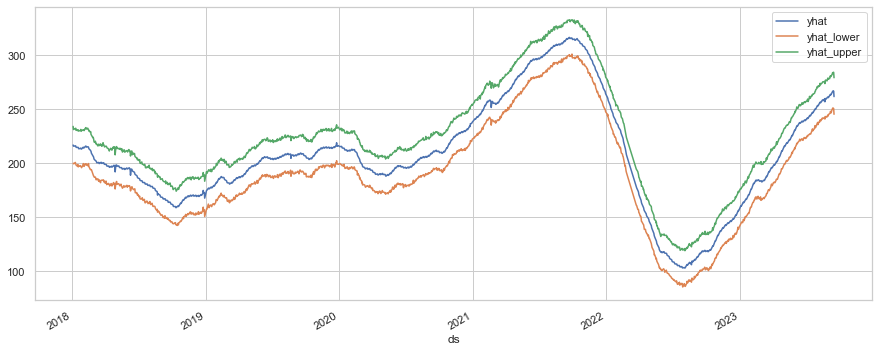

In [197]:
forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']].plot(figsize=(15,6))

In [198]:
print("RMSE on Prophet: ",np.sqrt(mean_squared_error(dfs['y'], forecast.yhat[:-1])))

RMSE on Prophet:  12.900831830090661


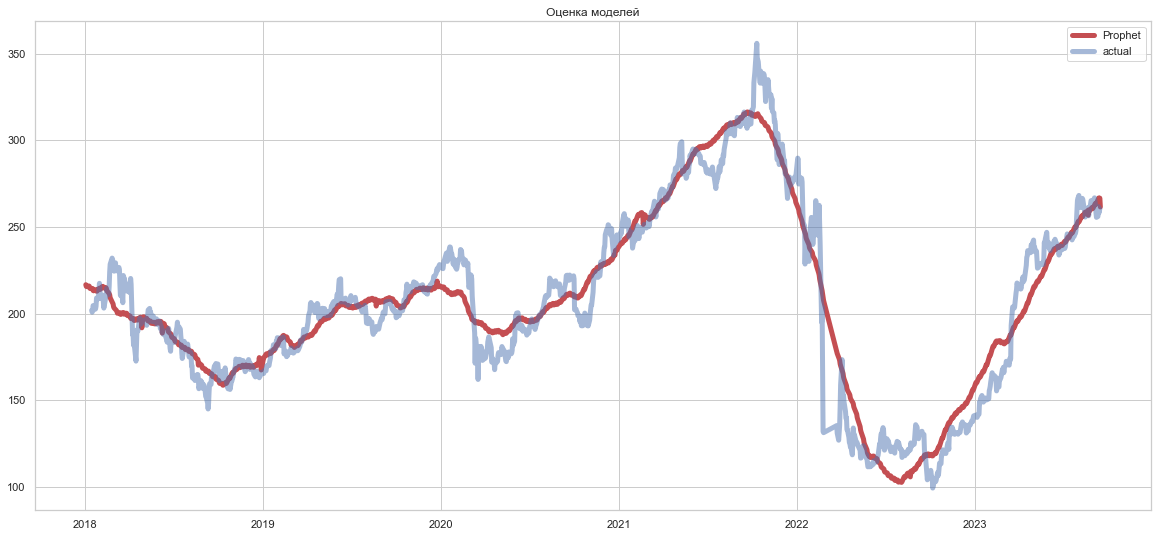

In [199]:
plt.figure(figsize=(20, 9))
plt.plot(forecast['yhat'], "r",linewidth=5, label="Prophet")
plt.plot(dfs1['y'],'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);

# Сравниваем результаты

In [200]:
len(yy)

1411

In [201]:
df1_with_predict = X_test1.tail(1000)
df1_with_predict['y'] = y_test.tail(1000)
df1_with_predict['y_predicted_lr'] = yy[-1000:]
df1_with_predict['y_prophet'] = forecast.yhat[-1000:]
df1_with_predict[['y','y_predicted_lr', 'y_prophet']]

y  y_predicted_lr   y_prophet
ds                                            
2019-09-06     NaN      200.637936  206.783361
2019-09-09     NaN      201.782325  207.960682
2019-09-10     NaN      200.356905  208.301742
2019-09-11     NaN      203.700305  208.513713
2019-09-12     NaN      207.201997  207.734474
...            ...             ...         ...
2023-09-12  261.78      255.396316  266.267453
2023-09-13  257.95      261.257968  266.755440
2023-09-14  259.43      258.266740  266.242294
2023-09-15  260.39      258.526863  266.622014
2023-09-16     NaN      260.217834  261.563653

[1000 rows x 3 columns]

<Axes: xlabel='ds'>

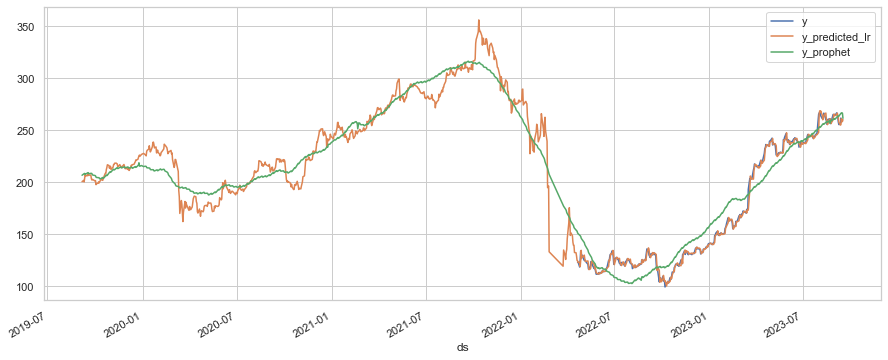

In [202]:
df1_with_predict[[ 'y', 'y_predicted_lr', 'y_prophet']].plot(figsize=(15,6))

# NeuralProphet

In [203]:
from neuralprophet import NeuralProphet

In [206]:
df_np = dfs[["ds", "y"]]
df_np

ds       y
0    2018-01-03  197.30
1    2018-01-04  203.03
2    2018-01-05  203.50
3    2018-01-09  201.30
4    2018-01-10  197.52
...         ...     ...
1419 2023-09-11  256.03
1420 2023-09-12  261.78
1421 2023-09-13  257.95
1422 2023-09-14  259.43
1423 2023-09-15  260.39

[1424 rows x 2 columns]

In [207]:
df_np.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1424 non-null   datetime64[ns]
 1   y       1424 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.4 KB


In [208]:
m_np = NeuralProphet()

In [209]:
m_np.add_country_holidays(country_name='RU')

In [210]:
m_np.fit(df_np, freq="D")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.629% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.629% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

MAE        RMSE      Loss  RegLoss  epoch
0    238.294861  284.358429  0.562874      0.0      0
1    231.257675  276.304871  0.538604      0.0      1
2    223.217056  267.420868  0.511629      0.0      2
3    213.124268  255.827545  0.477369      0.0      3
4    198.207962  239.199738  0.427020      0.0      4
..          ...         ...       ...      ...    ...
169   18.672577   24.488436  0.006557      0.0    169
170   18.771849   24.506199  0.006588      0.0    170
171   18.727659   24.578119  0.006582      0.0    171
172   18.740961   24.462723  0.006581      0.0    172
173   18.658995   24.472439  0.006537      0.0    173

[174 rows x 5 columns]

In [212]:
future_np = m_np.make_future_dataframe(df_np, periods=7)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.629% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.629% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [213]:
forecast_np = m_np.predict(future_np)
forecast_np

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 85.714% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 85.714% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 45it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


ds     y       yhat1       trend  season_yearly  season_weekly  \
0 2023-09-16  None  207.517532  209.543045     -16.301144      14.275626   
1 2023-09-17  None   61.898106  209.747238     -16.818464    -131.030670   
2 2023-09-18  None  216.213501  209.951385     -17.314138      23.576252   
3 2023-09-19  None  215.903671  210.155579     -17.786013      23.534100   
4 2023-09-20  None  215.594391  210.359741     -18.232077      23.466749   
5 2023-09-21  None  215.133179  210.563934     -18.650480      23.219717   
6 2023-09-22  None  214.686768  210.768066     -19.039545      22.958231   

   events_additive  event_День Победы  event_День России  \
0              0.0                0.0                0.0   
1              0.0                0.0                0.0   
2              0.0                0.0                0.0   
3              0.0                0.0                0.0   
4              0.0                0.0                0.0   
5              0.0                0.0                0.0   
6              0.0                0.0                0.0   

   event_День защитника Отечества  event_День народного единства  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   
5                             0.0                            0.0   
6                             0.0                            0.0   

   event_Международный женский день  event_Новогодние каникулы  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3                               0.0                        0.0   
4                               0.0                        0.0   
5                               0.0                        0.0   
6                               0.0                        0.0   

   event_Праздник Весны и Труда  event_Рождество Христово  
0                           0.0                       0.0  
1                           0.0                       0.0  
2                           0.0                       0.0  
3                           0.0                       0.0  
4                           0.0                       0.0  
5                           0.0                       0.0  
6                           0.0                       0.0

In [214]:
fig_forecast = m_np.plot(forecast_np)
fig_components = m_np.plot_components(forecast_np)
fig_model = m_np.plot_parameters()

In [215]:
fig_forecast 

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '8ad97584-a02c-4c69-bddb-87a42b22f987',
              'x': array([datetime.datetime(2023, 9, 16, 0, 0),
                          datetime.datetime(2023, 9, 17, 0, 0),
                          datetime.datetime(2023, 9, 18, 0, 0),
                          datetime.datetime(2023, 9, 19, 0, 0),
                          datetime.datetime(2023, 9, 20, 0, 0),
                          datetime.datetime(2023, 9, 21, 0, 0),
                          datetime.datetime(2023, 9, 22, 0, 0)], dtype=object),
              'y': array([207.51753235,  61.89810562, 216.21350098, 215.90367126, 215.59439087,
                          215.13317871, 214.68676758])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
             

In [216]:
fig_components

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '7188be85-3308-4b05-b3a2-e5c20e748d23',
              'x': array([datetime.datetime(2023, 9, 16, 0, 0),
                          datetime.datetime(2023, 9, 17, 0, 0),
                          datetime.datetime(2023, 9, 18, 0, 0),
                          datetime.datetime(2023, 9, 19, 0, 0),
                          datetime.datetime(2023, 9, 20, 0, 0),
                          datetime.datetime(2023, 9, 21, 0, 0),
                          datetime.datetime(2023, 9, 22, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([209.54304504, 209.74723816, 209.9513855 , 210.15557861, 210.35974121,
                          210.56393433, 210.76806641]),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},


In [217]:
fig_model

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~2D</i>',
              'type': 'scatter',
              'uid': '53e22781-e5d0-4728-a67a-83531a1fdbb1',
              'x': array([datetime.datetime(2018, 1, 3, 0, 0),
                          datetime.datetime(2018, 1, 4, 0, 0),
                          datetime.datetime(2018, 1, 6, 0, 0), ...,
                          datetime.datetime(2023, 9, 10, 0, 0),
                          datetime.datetime(2023, 9, 13, 0, 0),
                          datetime.datetime(2023, 9, 15, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([178.8971462 , 178.81739416, 178.65789008, ..., 208.3180287 ,
                          208.93055021, 209.33889788]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'na

In [221]:
forecastnp = m_np.predict(df_np)
forecastnp

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.629% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.629% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.629% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.629% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 45it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


ds       y       yhat1       trend  season_yearly  season_weekly  \
0    2018-01-03  197.30  214.498993  178.897156       6.467732      23.466749   
1    2018-01-04  203.03  214.575577  178.817398       6.871096      23.219717   
2    2018-01-05  203.50  214.664337  178.737640       7.301090      22.958231   
3    2018-01-09  201.30  211.213654  178.418640       9.260918      23.534100   
4    2018-01-10  197.52  211.607513  178.338882       9.801888      23.466749   
...         ...     ...         ...         ...            ...            ...   
1419 2023-09-11  256.03  218.623550  208.522217     -13.474906      23.576252   
1420 2023-09-12  261.78  218.197067  208.726410     -14.063439      23.534100   
1421 2023-09-13  257.95  217.754272  208.930542     -14.643031      23.466749   
1422 2023-09-14  259.43  217.143524  209.134750     -15.210933      23.219717   
1423 2023-09-15  260.39  216.532623  209.338898     -15.764491      22.958231   

      events_additive  event_День Победы  event_День России  \
0            5.667371                0.0                0.0   
1            5.667371                0.0                0.0   
2            5.667371                0.0                0.0   
3            0.000000                0.0                0.0   
4            0.000000                0.0                0.0   
...               ...                ...                ...   
1419         0.000000                0.0                0.0   
1420         0.000000                0.0                0.0   
1421         0.000000                0.0                0.0   
1422         0.000000                0.0                0.0   
1423         0.000000                0.0                0.0   

      event_День защитника Отечества  event_День народного единства  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
1419                             0.0                            0.0   
1420                             0.0                            0.0   
1421                             0.0                            0.0   
1422                             0.0                            0.0   
1423                             0.0                            0.0   

      event_Международный женский день  event_Новогодние каникулы  \
0                                  0.0                   5.667371   
1                                  0.0                   5.667371   
2                                  0.0                   5.667371   
3                                  0.0                   0.000000   
4                                  0.0                   0.000000   
...                                ...                        ...   
1419                               0.0                   0.000000   
1420                               0.0                   0.000000   
1421                               0.0                   0.000000   
1422                               0.0                   0.000000   
1423                               0.0                   0.000000   

      event_Праздник Весны и Труда  event_Рождество Христово  
0                              0.0                       0.0  
1                              0.0                       0.0  
2                              0.0                       0.0  
3                              0.0                       0.0  
4                              0.0                       0.0  
...                            ...                       ...  
1419                           0.0                       0.0  
1420                           0.0                       0.0  
1421                           0.0

In [222]:
fig_forecast1 = m_np.plot(forecastnp)
fig_components1 = m_np.plot_components(forecastnp)
fig_model1 = m_np.plot_parameters()

In [223]:
fig_forecast1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~2D</i>',
              'type': 'scatter',
              'uid': '26ab168a-b51a-432a-bd68-5f69c49db75b',
              'x': array([datetime.datetime(2018, 1, 3, 0, 0),
                          datetime.datetime(2018, 1, 4, 0, 0),
                          datetime.datetime(2018, 1, 5, 0, 0), ...,
                          datetime.datetime(2023, 9, 12, 0, 0),
                          datetime.datetime(2023, 9, 13, 0, 0),
                          datetime.datetime(2023, 9, 15, 0, 0)], dtype=object),
              'y': array([214.49899292, 214.57557678, 214.66433716, ..., 218.19706726,
                          217.75427246, 216.53262329])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              '

In [224]:
fig_components1

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~2D</i>',
              'showlegend': False,
              'type': 'scatter',
              'uid': '8faa5973-16a5-4fe5-8b45-031c9b6999d9',
              'x': array([datetime.datetime(2018, 1, 3, 0, 0),
                          datetime.datetime(2018, 1, 4, 0, 0),
                          datetime.datetime(2018, 1, 5, 0, 0), ...,
                          datetime.datetime(2023, 9, 12, 0, 0),
                          datetime.datetime(2023, 9, 13, 0, 0),
                          datetime.datetime(2023, 9, 15, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([178.89715576, 178.81739807, 178.73764038, ..., 208.72640991,
                          208.93054199, 209.33889771]),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
  

In [225]:
fig_model1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~2D</i>',
              'type': 'scatter',
              'uid': '54762a69-69f2-43e1-a7fe-918f3805dfd9',
              'x': array([datetime.datetime(2018, 1, 3, 0, 0),
                          datetime.datetime(2018, 1, 4, 0, 0),
                          datetime.datetime(2018, 1, 6, 0, 0), ...,
                          datetime.datetime(2023, 9, 10, 0, 0),
                          datetime.datetime(2023, 9, 13, 0, 0),
                          datetime.datetime(2023, 9, 15, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([178.8971462 , 178.81739416, 178.65789008, ..., 208.3180287 ,
                          208.93055021, 209.33889788]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'na

In [ ]:
# if __name__ == '__main__':
#      print("успешно выполнено")

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import json

In [5]:
with open('train.json', encoding='utf-8') as f:
    raw_train = json.load(f)
with open('test.json', encoding='utf-8') as f:
    raw_test = json.load(f)

In [6]:
def ru_token(string):
    """russian tokenize based on nltk.word_tokenize. only russian letter remaind."""
    return [i for i in word_tokenize(string) if re.match(r'[\u0400-\u04ffа́]+$', i)]

In [7]:
params = {}
params['tokenizer'] = ru_token
params['stop_words'] = stopwords.words('russian')
params['ngram_range'] = (1, 3)
params['min_df'] = 3

In [8]:
tfidf  = TfidfVectorizer(**params)

In [9]:
tfidf.fit([i['text'] for i in raw_train + raw_test])

C:\Users\150ho\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=3, ngram_range=(1, 3),
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...],
                tokenizer=<function ru_token at 0x0000014A89621790>)

In [18]:
train = {}
val = {}
tmp = defaultdict(list)
for e in raw_train:
    tmp[e['sentiment']].append(e['text'])
for l in tmp:
    train[l], val[l] = train_test_split(tmp[l], test_size=0.2, random_state=2018)

In [19]:
def upsampling_align(some_dict, random_state=2018):
    rand = np.random.RandomState(random_state)
    upper = max([len(some_dict[l]) for l in some_dict])
    print('upper bound: {}'.format(upper))
    tmp = {}
    for l in some_dict:
        if len(some_dict[l]) < upper:
            repeat_time = int(upper/len(some_dict[l]))
            remainder = upper % len(some_dict[l])
            _tmp = some_dict[l].copy()
            rand.shuffle(_tmp)
            tmp[l] = some_dict[l] * repeat_time + _tmp[:remainder]
            rand.shuffle(tmp[l])
        else:
            tmp[l] = some_dict[l]
    return tmp

In [20]:
btrain = upsampling_align(train)

upper bound: 3227


In [21]:
m_params = {}
m_params['solver'] = 'lbfgs'
m_params['multi_class'] = 'multinomial'

In [22]:
softmax = LogisticRegression(**m_params)

In [23]:
train_x = [j for i in sorted(btrain.keys()) for j in btrain[i]]
train_y = [i for i in sorted(btrain.keys()) for j in btrain[i]]
softmax.fit(tfidf.transform(train_x), train_y)

C:\Users\150ho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [24]:
test_x = [j for i in sorted(val.keys()) for j in val[i]]
true = [i for i in sorted(val.keys()) for j in val[i]]

In [25]:
pred = softmax.predict(tfidf.transform(test_x))

In [26]:
accuracy_score(true, pred)

0.7162734422262553

In [27]:
lab = LabelEncoder()
c_true = lab.fit_transform(true)
c_pred = lab.transform(pred)
print(classification_report(c_true, c_pred, target_names=lab.classes_, digits=5))

              precision    recall  f1-score   support

    negative    0.64856   0.70732   0.67667       287
     neutral    0.75168   0.69393   0.72165       807
    positive    0.70756   0.75313   0.72964       559

    accuracy                        0.71627      1653
   macro avg    0.70260   0.71813   0.70932      1653
weighted avg    0.71886   0.71627   0.71654      1653



In [28]:
bval = upsampling_align(val)

upper bound: 807


In [29]:
b_test_x = [j for i in sorted(bval.keys()) for j in bval[i]]
b_true = [i for i in sorted(bval.keys()) for j in bval[i]]
b_pred = softmax.predict(tfidf.transform(b_test_x))
lab = LabelEncoder()
c_true = lab.fit_transform(b_true)
c_pred = lab.transform(b_pred)
print(classification_report(c_true, c_pred, target_names=lab.classes_, digits=5))

              precision    recall  f1-score   support

    negative    0.82774   0.70260   0.76005       807
     neutral    0.60936   0.69393   0.64890       807
    positive    0.74541   0.75465   0.75000       807

    accuracy                        0.71706      2421
   macro avg    0.72750   0.71706   0.71965      2421
weighted avg    0.72750   0.71706   0.71965      2421



In [30]:
sub_pred = softmax.predict(tfidf.transform([i['text'] for i in raw_test]))
sub_df = pd.DataFrame()
sub_df['id'] =  [i['id'] for i in raw_test]
sub_df['sentiment'] = sub_pred

In [31]:
sub_df.head()

id sentiment
0   0  positive
1   1  positive
2   2  negative
3   3  positive
4   4  negative

In [32]:
sub_df.to_csv('softmax_reg.csv', index=False)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import nltk
import scikitplot as skplt
import re, string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
STOPWORDS = set(stopwords.words('russian'))
#list of special characters.You can use regular expressions too

# importing the PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
#importing the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import SnowballStemmer
from pymorphy2 import MorphAnalyzer

# start text processing with vectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\150ho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\150ho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\150ho\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [47]:
ps = SnowballStemmer(language="russian")
lemmatizer = MorphAnalyzer()

In [37]:
with open('train.json', encoding='utf-8') as json_file:  
    data_train = json.load(json_file)

In [88]:
raw_t = pd.json_normalize(data_train)
raw_t = raw_t[['text','sentiment']]

In [89]:
raw_t['sentiment'] = raw_t['sentiment'].map(lambda x: 0 if x == 'negative' else 1 if x == 'positive' else 2)

In [90]:
raw_t

text  sentiment
0     Досудебное расследование по факту покупки ЕНПФ...          0
1     Медики рассказали о состоянии пострадавшего му...          0
2     Прошел почти год, как железнодорожным оператор...          0
3     По итогам 12 месяцев 2016 года на территории р...          0
4     Астана. 21 ноября. Kazakhstan Today - Агентств...          0
...                                                 ...        ...
8258  Как мы писали еще весной, для увеличения сбыта...          1
8259  Но молодой министр национальной экономики Биши...          0
8260  \n \nВ ЕНПФ назначен новый председатель правле...          2
8261  В Алматы у отделения банка произошло нападение...          0
8262  НПП РК «Атамекен» предлагает создать Националь...          2

[8263 rows x 2 columns]

In [ ]:
with open('test.json', encoding='utf-8') as json_file:  
    raw_test = json.load(json_file)

In [79]:
raw_te = pd.json_normalize(raw_test)
raw_te

text    id
0     Как сообщает пресс-служба акимата Алматы, для ...     0
1     Казахстанские авиакомпании перевозят 250 тысяч...     1
2     На состоявшемся под председательством Касым-Жо...     2
3     В ОАЭ состоялись переговоры между казахстанско...     3
4     12 вагонов грузового поезда сошли с путей в Во...     4
...                                                 ...   ...
2051  На официальной странице общественного движения...  2079
2052  официальный курс – 330,55 тенге за Доллар США ...  2083
2053  «Базовая ставка, которая сейчас составляет 12%...  2084
2054  На начальном этапе за неоплату парковки на при...  2087
2055  Российский авторынок в октябре снизил темпы па...  2088

[2056 rows x 2 columns]

In [113]:
Xt = raw_te['text']

In [48]:
data = raw_t.rename({'sentiment':'Class','text':'Message'},axis=1)
data

Message  Class
0     Досудебное расследование по факту покупки ЕНПФ...      0
1     Медики рассказали о состоянии пострадавшего му...      0
2     Прошел почти год, как железнодорожным оператор...      0
3     По итогам 12 месяцев 2016 года на территории р...      0
4     Астана. 21 ноября. Kazakhstan Today - Агентств...      0
...                                                 ...    ...
8258  Как мы писали еще весной, для увеличения сбыта...      1
8259  Но молодой министр национальной экономики Биши...      0
8260  \n \nВ ЕНПФ назначен новый председатель правле...      2
8261  В Алматы у отделения банка произошло нападение...      0
8262  НПП РК «Атамекен» предлагает создать Националь...      2

[8263 rows x 2 columns]

In [49]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]+|[\d]+', r'',text).strip()
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    text = regex.sub(' ', text)
#     text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    text = " ".join(ps.stem(lemmatizer.normal_forms(word)[0]) for word in text.split())
    return text
  
data['clean_text'] = data['Message'].apply(clean_text)
data.head()

Message  Class  \
0  Досудебное расследование по факту покупки ЕНПФ...      0   
1  Медики рассказали о состоянии пострадавшего му...      0   
2  Прошел почти год, как железнодорожным оператор...      0   
3  По итогам 12 месяцев 2016 года на территории р...      0   
4  Астана. 21 ноября. Kazakhstan Today - Агентств...      0   

                                          clean_text  
0  досудебн расследован факт покупк енпф пакет об...  
1  медик рассказа состоян пострада мужчин котор с...  
2  пройт год железнодорожн оператор запрет эксплу...  
3  итог месяц год территор республик выпуст едини...  
4  аста ноябр kazakhstan today агентств рк дел го...

In [50]:
X = data['clean_text']
y = data['Class']

In [51]:
#define a function to get rid of stopwords present in the messages
def message_text_process(mess):
    # Check characters to see if there are punctuations 
    no_punctuation=[char for char in mess if char not in string.punctuation]
    # now form the sentence
    no_punctuation=''.join(no_punctuation)
    # Now eliminate any stopwords
    return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english') and stopwords.words('russian')]

# to verify that function is working
data['Message'].head(5).apply(message_text_process)

0    [Досудебное, расследование, по, факту, покупки...
1    [Медики, рассказали, о, состоянии, пострадавше...
2    [Прошел, почти, год, как, железнодорожным, опе...
3    [По, итогам, 12, месяцев, 2016, года, на, терр...
4    [Астана, 21, ноября, Kazakhstan, Today, Агентс...
Name: Message, dtype: object

In [52]:
#function for the model building and prediction
def Model(model, X, y):
#training and testing the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    # model building using CountVectorizer and TfidfTransformer
    pipeline_model = Pipeline([('vect', CountVectorizer(ngram_range = (1,3))),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    


    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)

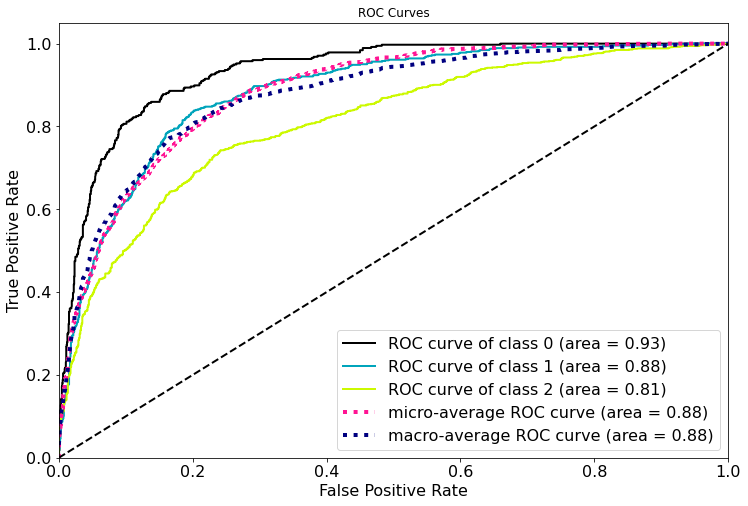

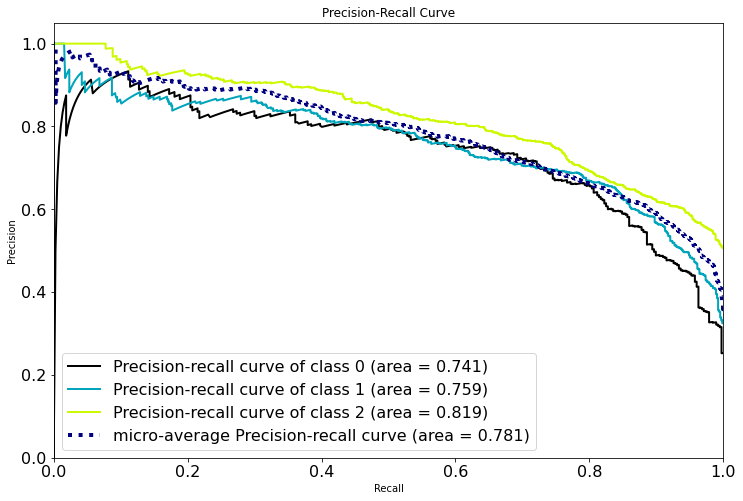

Confusion Matrix:
 [[182  21 174]
 [  4 448 192]
 [ 45 166 834]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.48      0.60       377
           1       0.71      0.70      0.70       644
           2       0.69      0.80      0.74      1045

    accuracy                           0.71      2066
   macro avg       0.73      0.66      0.68      2066
weighted avg       0.72      0.71      0.70      2066

Accuracy: 70.86156824782188
Training Score:
 89.55946425689851
CPU times: total: 5min 47s
Wall time: 2min 50s


In [53]:
%%time
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
Model(model, X, y)

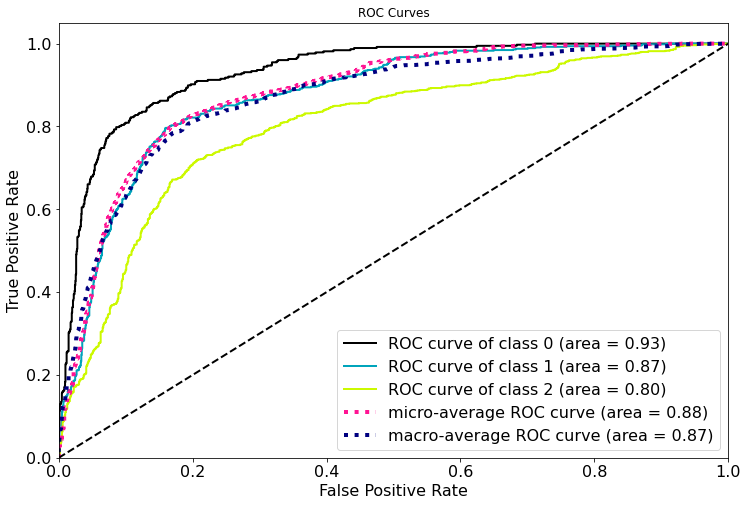

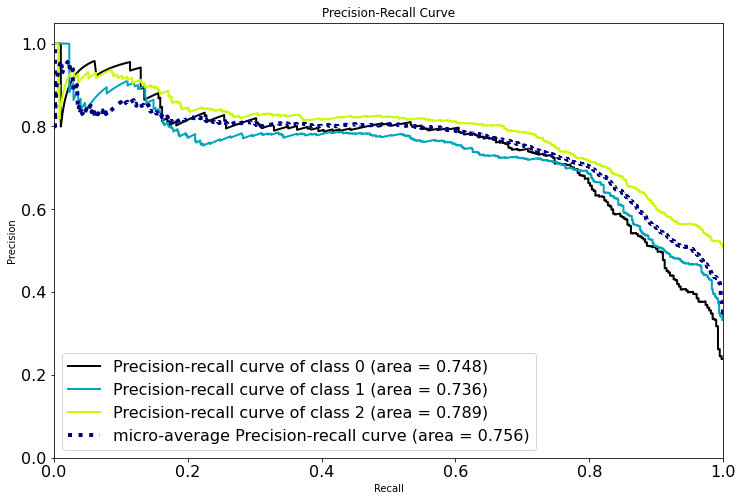

Confusion Matrix:
 [[243  13 121]
 [  8 463 173]
 [ 65 171 809]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.64      0.70       377
           1       0.72      0.72      0.72       644
           2       0.73      0.77      0.75      1045

    accuracy                           0.73      2066
   macro avg       0.74      0.71      0.72      2066
weighted avg       0.73      0.73      0.73      2066

Accuracy: 73.33010648596321
Training Score:
 93.15797966758109
CPU times: total: 19min 1s
Wall time: 19min 2s


In [54]:
%%time
from sklearn.svm import SVC
model = SVC(kernel='linear',probability=True)
Model(model, X, y)

In [55]:
#function for the model building and prediction
def Model1(model, X, y):
#training and testing the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    # model building using CountVectorizer and TfidfTransformer
    pipeline_model = Pipeline([('vect', CountVectorizer(ngram_range = (1,3))),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    


    y_pred = pipeline_model.predict(x_test)
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)

In [56]:
%%time
from sklearn.svm import LinearSVC
model = LinearSVC()
Model1(model, X, y)

Confusion Matrix:
 [[246  16 115]
 [ 10 476 158]
 [ 73 179 793]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.65      0.70       377
           1       0.71      0.74      0.72       644
           2       0.74      0.76      0.75      1045

    accuracy                           0.73      2066
   macro avg       0.73      0.72      0.72      2066
weighted avg       0.73      0.73      0.73      2066

Accuracy: 73.33010648596321
Training Score:
 95.70760045183152
CPU times: total: 43 s
Wall time: 43.1 s


In [59]:
#function for the model building and prediction
def Model_0(model, X, y):
#training and testing the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
    # model building using CountVectorizer and TfidfTransformer
    pipeline_model = Pipeline([('vect', CountVectorizer(ngram_range = (1,3))),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    


    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)

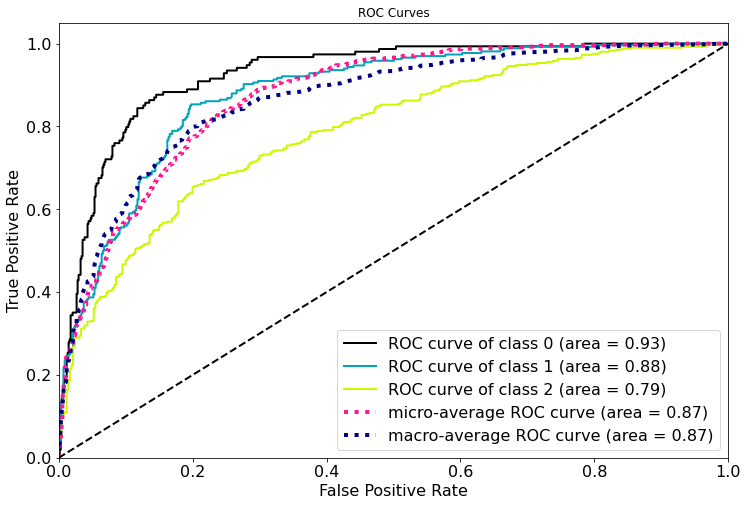

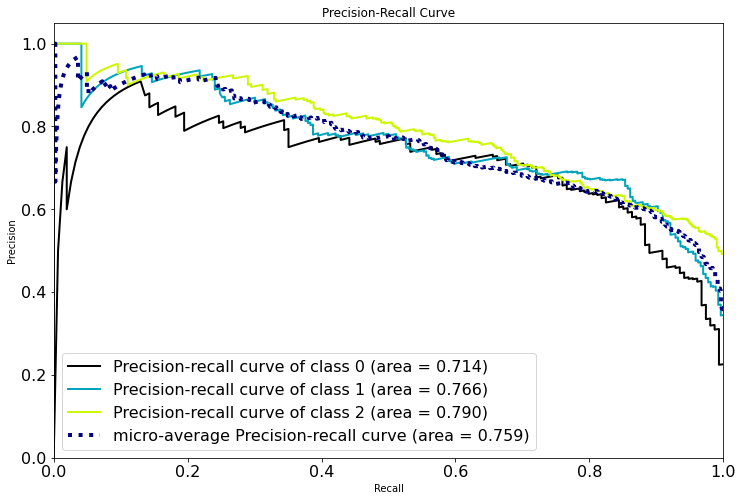

Confusion Matrix:
 [[ 73   7  74]
 [  1 178  87]
 [ 24  65 318]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.74      0.47      0.58       154
           1       0.71      0.67      0.69       266
           2       0.66      0.78      0.72       407

    accuracy                           0.69       827
   macro avg       0.71      0.64      0.66       827
weighted avg       0.69      0.69      0.68       827

Accuracy: 68.80290205562272
Training Score:
 89.08015061861215
CPU times: total: 6min 22s
Wall time: 3min 14s


In [61]:
%%time
model = LogisticRegression()
Model_0(model, X, y)

In [62]:
#function for the model building and prediction
def Model1_0(model, X, y):
#training and testing the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    # model building using CountVectorizer and TfidfTransformer
    pipeline_model = Pipeline([('vect', CountVectorizer(ngram_range = (1,3))),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    


    y_pred = pipeline_model.predict(x_test)
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)

In [63]:
model = LinearSVC()
Model1_0(model, X, y)

Confusion Matrix:
 [[246  16 115]
 [ 10 476 158]
 [ 73 179 793]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.65      0.70       377
           1       0.71      0.74      0.72       644
           2       0.74      0.76      0.75      1045

    accuracy                           0.73      2066
   macro avg       0.73      0.72      0.72      2066
weighted avg       0.73      0.73      0.73      2066

Accuracy: 73.33010648596321
Training Score:
 95.70760045183152


In [98]:
x_train

0       досудебн расследован факт покупк енпф пакет об...
1       медик рассказа состоян пострада мужчин котор с...
2       пройт год железнодорожн оператор запрет эксплу...
3       итог месяц год территор республик выпуст едини...
4       аста ноябр kazakhstan today агентств рк дел го...
                              ...                        
8258    писа весн увеличен сбыт такж избеган переплат ...
8259    молод министр национальн экономик бишимба похо...
8260    енпф назнач нов председател правлен единогласн...
8261    алмат отделен банк произойт нападен стрельб се...
8262    нпп рк атамек предлага созда национальн экспор...
Name: clean_text, Length: 8263, dtype: object

In [64]:
model_LSVC = LinearSVC()
x_train, y_train = X, y
    # model building using CountVectorizer and TfidfTransformer
pipeline_model = Pipeline([('vect', CountVectorizer(ngram_range = (1,3))),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model_LSVC)])
pipeline_model.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()), ('clf', LinearSVC())])

In [114]:
Xt = Xt.apply(clean_text)

In [115]:
Xt = Xt.apply(message_text_process)

In [117]:
XX = Xt.apply(lambda x: ' '.join(x))

In [118]:
XX

0       сообща прессслужб акимат алмат ликвидиц послед...
1       казахстанск авиакомпан перевоз тысяч транзитн ...
2       состоя председательств касымжомарт токаев засе...
3       оаэ состоя переговор казахстанск эмиратск стор...
4       вагон грузов поезд сойт пут восточноказахстанс...
                              ...                        
2051    официальн страниц обществен движен немолчикз f...
2052    официальн курс тенг доллар сша нефт стоимост н...
2053    базов ставк котор составля стат реальн инструм...
2054    начальн этап неоплат парковк привокзальн площа...
2055    российск авторынок октябр сниз темп паден проц...
Name: text, Length: 2056, dtype: object

In [99]:
raw_te['text']

0       Как сообщает пресс-служба акимата Алматы, для ...
1       Казахстанские авиакомпании перевозят 250 тысяч...
2       На состоявшемся под председательством Касым-Жо...
3       В ОАЭ состоялись переговоры между казахстанско...
4       12 вагонов грузового поезда сошли с путей в Во...
                              ...                        
2051    На официальной странице общественного движения...
2052    официальный курс – 330,55 тенге за Доллар США ...
2053    «Базовая ставка, которая сейчас составляет 12%...
2054    На начальном этапе за неоплату парковки на при...
2055    Российский авторынок в октябре снизил темпы па...
Name: text, Length: 2056, dtype: object

In [100]:
y_pred = pipeline_model.predict(raw_te['text'])

In [101]:
raw_te['sentiment'] = y_pred

In [102]:
raw_te['sentiment'] = raw_te['sentiment'].map(lambda x: 'negative' if x == 0 else 'positive' if x == 1 else 'neutral')

In [103]:
raw_te = raw_te[['text', 'sentiment']]

In [104]:
raw_te

text sentiment
0     Как сообщает пресс-служба акимата Алматы, для ...   neutral
1     Казахстанские авиакомпании перевозят 250 тысяч...   neutral
2     На состоявшемся под председательством Касым-Жо...   neutral
3     В ОАЭ состоялись переговоры между казахстанско...  positive
4     12 вагонов грузового поезда сошли с путей в Во...  negative
...                                                 ...       ...
2051  На официальной странице общественного движения...   neutral
2052  официальный курс – 330,55 тенге за Доллар США ...   neutral
2053  «Базовая ставка, которая сейчас составляет 12%...   neutral
2054  На начальном этапе за неоплату парковки на при...   neutral
2055  Российский авторынок в октябре снизил темпы па...  positive

[2056 rows x 2 columns]

In [119]:
y_pred1 = pipeline_model.predict(XX)
raw_te['sentiment1'] = y_pred1
raw_te['sentiment1'] = raw_te['sentiment1'].map(lambda x: 'negative' if x == 0 else 'positive' if x == 1 else 'neutral')
raw_te = raw_te[['text', 'sentiment1']]
raw_te

text sentiment1
0     Как сообщает пресс-служба акимата Алматы, для ...   positive
1     Казахстанские авиакомпании перевозят 250 тысяч...   positive
2     На состоявшемся под председательством Касым-Жо...   negative
3     В ОАЭ состоялись переговоры между казахстанско...   positive
4     12 вагонов грузового поезда сошли с путей в Во...   negative
...                                                 ...        ...
2051  На официальной странице общественного движения...    neutral
2052  официальный курс – 330,55 тенге за Доллар США ...    neutral
2053  «Базовая ставка, которая сейчас составляет 12%...   positive
2054  На начальном этапе за неоплату парковки на при...    neutral
2055  Российский авторынок в октябре снизил темпы па...    neutral

[2056 rows x 2 columns]

In [121]:
import pickle

with open("modela.pkl", "wb") as f:
    pickle.dump(model_LSVC, f)

In [122]:
with open("modela.pkl", "rb") as f:
    modela = pickle.load(f)

In [123]:
modela

LinearSVC()